In [1]:
import pandas as pd #the csv reading library
import matplotlib.pyplot as plt #the ploting library
import glob #to get file names
import numpy as np
from pandas import Series
import seaborn as sns
from matplotlib.pyplot import figure
import cmocean.cm as cmo
import seaborn as sns

from pylab import rcParams
from numpy import diff
from scipy import interpolate
import scipy.stats as stats

from scipy.signal import savgol_filter
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress
from scipy.signal import savgol_filter

import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols

import matplotlib.gridspec as gridspec
from IPython.display import display, Math

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

from scipy.signal import savgol_filter
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols

import matplotlib.gridspec as gridspec
from IPython.display import display, Math
from sklearn.metrics import r2_score

from statistics import mean, median
from pylr2 import regress2

import seawater

from pylr2 import regress2

### PART 2 Bottom Water Maps and colorlation ####

#get WC data sets 
df_doc_wc_surf = df_doc[df_doc['Type'] == 'WC']

codes = df_doc_wc_surf['code'].unique()

df_doc_wc_surf = df_doc_wc_surf[df_doc_wc_surf['code'].isin(codes)]

min_depth_per_code = df_doc_wc_surf.groupby('code')['Depth'].min().reset_index()
df_doc_wc_surf = pd.merge(df_doc_wc_surf, min_depth_per_code, on='code', suffixes=('', '_min'))
df_doc_wc_surf = df_doc_wc_surf[df_doc_wc_surf['Depth'] == df_doc_wc_surf['Depth_min']]
df_doc_wc_surf.drop(columns=['Depth_min'], inplace=True)



#mean_doc = df_doc_wc_plot.groupby('code')['NPOC_uM'].mean().reset_index()
#mean_tn = df_doc_wc_plot.groupby('code')['TN_uM'].mean().reset_index()
#std_doc = df_doc_wc_plot.groupby('code')['NPOC_uM_std'].mesuan().reset_index()
#stc_tn = df_doc_wc_plot.groupby('code')['NPOC_uM_std'].mean().reset_index()

df_doc_wc_surf['Depth_sample'] = df_doc_wc_surf['Depth']
df_doc_wc_surf['Depth'] = 0

# Calculate the mean of "NPOC_uM", "TN_uM", and "Depth" for each group in 'code'
df_doc_wc_surf = df_doc_wc_surf.groupby('code').agg({'NPOC_uM': 'mean', 'TN_uM': 'mean', 'Depth': 'mean', 'NPOC_uM_std': 'sum', 'TN_uM_std': 'sum'}).reset_index()


# Display the result dataframe
df_doc_wc_surf.index = df_doc_wc_surf['code']
df_doc_wc_surf['NPOC_uM_surf'] = df_doc_wc_surf['NPOC_uM']
df_doc_wc_surf['NPOC_uM_surf_std'] = df_doc_wc_surf['NPOC_uM_std']

df_doc_wc_surf

df_doc_wc_plot['NPOC_uM_surf'] = df_doc_wc_surf['NPOC_uM_surf']
df_doc_wc_plot['NPOC_uM_surf_std'] = df_doc_wc_surf['NPOC_uM_surf_std']

df_o2 = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/O2_Summary_Stats.csv', sep=',', index_col=0)

df = df_o2.join(df_doc_wc_plot)

df_doc_wc_plot_2 = df_doc_wc_plot
df_doc_wc_plot_2['NPOC_uM_bottom_water'] = df_doc_wc_plot_2['NPOC_uM']
df_doc_wc_plot_2['TN_uM_bottom_water'] = df_doc_wc_plot_2['TN_uM']
df_doc_wc_plot_2 = df_doc_wc_plot_2.drop(columns=['code', 'NPOC_uM','TN_uM', 'Depth', 'NPOC_uM_std', 'TN_uM_std'])

df.to_csv('../Dissertation_projects/Data/Stats_data_sets/bottom_water_DOC.csv')
df

In [2]:
df_ow = pd.read_csv('../Dissertation_projects/Data/TOC/TOC_GOM.csv', sep=',', index_col=0)
df_ow = df_ow[df_ow['Type'] == 'PW']
df_ow = df_ow[df_ow['Depth'] == 0]
df_ow['code'] = df_ow['Location'] + '_' + df_ow['Campaign']

df_ow = df_ow.sort_values(by=['NPOC_uM'])

df_ow.index = df_ow['code']

df_ow = df_ow.drop('St.9_GOM2021', axis=0)
df_ow = df_ow.drop('St.5B_GOM2021', axis=0)
df_ow = df_ow.drop('St.4_GOM2021', axis=0)
df_ow = df_ow.drop('St.14_GOM2021', axis=0)


df_ow['NPOC_ow'] = df_ow['NPOC_uM']
df_ow['NPOC_ow_std'] = df_ow['NPOC_uM_std']


df_ow_conc = df_ow['NPOC_ow']
df_ow_std = df_ow['NPOC_ow_std']

df_ow


,Treatment,Campaign,Date,Location,NPOC Conc (mg/L),TN Conc (mg/L),Depth,Notes,Type,Time,Dil Factor,NPOC_uM,TN_uM,dil_fac,NPOC_uM_std,TN_uM_std,code,NPOC_ow,NPOC_ow_std
code,,,,,,,,,,,,,,,,,,,
St.12_GOM21FA,P2F,GOM21FA,11/9/2021,St.12,0.264569,0.620950635,0.0,Estimated concentrations - bad standard curves...,PW,NaN,15.000000,22.047418,44.353617,15.000000,0.440925,0.909670,St.12_GOM21FA,22.047418,0.440925
St.11_GOM21FA,P2F,GOM21FA,11/11/2021,St.11,1.261300,0.591807803,0.0,Estimated concentrations - bad standard curves...,PW,NaN,15.000000,105.108329,42.271986,15.000000,2.184516,0.884194,St.11_GOM21FA,105.108329,2.184516
St.15_GOM21FA,PWP2F,GOM21FA,11/2/2021,St.15,1.613683,0.29859391,0.0,Estimated concentrations - bad standard curves...,PW,NaN,15.000000,134.473614,21.328136,15.000000,2.794829,0.446116,St.15_GOM21FA,134.473614,2.794829
St.7_GOM22SP,P2F,GOM22SP,4/11/2022,St.7,2.759645,0.196584839,0.0,Bad curve - cal from alt curve,PW,NaN,15.000000,229.970432,14.041774,15.000000,4.631174,0.293682,St.7_GOM22SP,229.970432,4.631174
St.13_GOM22SP,P2F,GOM22SP,4/19/2022,St.13,2.895258,0.344180799,0.0,Bad Curve/ Used last standerd curve,PW,NaN,15.000000,241.271506,24.584343,15.000000,4.825135,0.491865,St.13_GOM22SP,241.271506,4.825135
St.14_GOM21FA,PWP2F,GOM21FA,10/31/2021,St.14,2.955000,0.414375,0.0,NaN,PW,NaN,15.000000,246.250000,29.598214,15.000000,5.199149,0.680935,St.14_GOM21FA,246.250000,5.199149
St.15_GOM22SP,P2F,GOM22SP,4/16/2022,St.15,3.678750,0.673275,0.0,NaN,PW,NaN,15.000000,262.767857,48.091071,15.000000,5.361050,1.133960,St.15_GOM22SP,262.767857,5.361050
St.2_GOM22SP,P2F,GOM22SP,4/17/2022,St.2,3.255538,0.145153821,0.0,Bad Curve/ Used last standerd curve,PW,NaN,15.000000,271.294794,10.368130,15.000000,5.425564,0.207438,St.2_GOM22SP,271.294794,5.425564
St.MK_GOM22SU,P2F,GOM22SU,7/23/2022,St.MK,3.327000,0.3294,0.0,NaN,PW,NaN,15.000000,277.250000,23.528571,15.000000,5.503549,0.481678,St.MK_GOM22SU,277.250000,5.503549


df_surf = pd.read_csv('../Dissertation_projects/Data/TOC/TOC_GOM.csv', sep=',', index_col=0)
df_surf = df_surf[df_surf['Type'] == 'WC']
df_surf = df_surf[df_surf['Depth'] == 0]
df_surf['code'] = df_surf['Location'] + '_' + df_surf['Campaign']

df_surf = df_surf.sort_values(by=['NPOC_uM'])

df_surf.index = df_surf['code']


df_surf['NPOC_surf'] = df_surf['NPOC_uM']
df_surf['NPOC_surf_std'] = df_surf['NPOC_uM_std']


df_sur_conc = df_surf['NPOC_surf']
df_sur_std = df_surf['NPOC_surf_std']

df_surf

In [3]:
flux_doc_pw = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/Flux_doc_pw.csv', sep=',', index_col=0)
flux_doc_pw_join = flux_doc_pw['pw_flux_doc']
flux_doc_pw_join
#data_wc['pw_flux_doc'] = flux_doc_pw_join

code
St.11_GOM2021    0.467165
St.11_GOM21FA    0.669243
St.11_GOM22SU    0.963536
St.12_GOM21FA    1.163726
St.12_GOM22SU    0.952342
St.13_GOM21FA    0.114437
St.13_GOM22SP    0.254759
St.13_GOM22SU    0.129126
St.14_GOM2021    0.114705
St.14_GOM21FA    0.546466
St.14_GOM22SP    0.425348
St.14_GOM22SU    0.046916
St.15_GOM2021    1.096442
St.15_GOM21FA    0.860536
St.15_GOM22SP    0.682081
St.15_GOM22SU    0.549324
St.16_GOM2021    1.057739
St.16_GOM21FA    0.339126
St.16_GOM22SP    0.275817
St.16_GOM22SU    0.964561
St.2_GOM2021     0.545149
St.2_GOM21FA     0.600260
St.2_GOM22SP     0.380454
St.2_GOM22SU     1.299518
St.4_GOM21FA     0.196937
St.4_GOM22SP     0.058522
St.4_GOM22SU     0.132255
St.5B_GOM21FA    0.086706
St.5B_GOM22SP    0.358571
St.5B_GOM22SU    0.438142
St.7_GOM2021     0.912947
St.7_GOM21FA     0.233750
St.7_GOM22SU     0.453696
St.7_GOM22SP     0.593131
St.9_GOM21FA     0.374725
St.9_GOM22SP     0.651871
St.9_GOM22SU     0.481890
St.MK_GOM2021    0.246924
St.MK_G

In [4]:
df = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/bottom_water_DOC.csv', sep=',', index_col=0)

df['NPOC_ow'] = df_ow_conc
df['NPOC_ow_std'] = df_ow_std
df['pw_flux_doc'] = flux_doc_pw_join
df['ow_bot_doc'] = df['NPOC_ow'] - df['NPOC_uM'] 

mix = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/mixed_depth.csv', sep=',', index_col=0)
mm = mix['mix_depth']
df['mix_depth'] = mm
df.to_csv('../Dissertation_projects/Carbon_cycling_project/data.csv')

In [5]:
df

,camp,station,date,Max_pressure,Pressure_dbar_surface,O2_mgL_surface,latitude_surface,longitude_surface,Pressure_dbar_bottom,O2_mgL_bottom,...,Depth,NPOC_uM_std,TN_uM_std,NPOC_uM_surf,NPOC_uM_surf_std,NPOC_ow,NPOC_ow_std,pw_flux_doc,ow_bot_doc,mix_depth
code,,,,,,,,,,,,,,,,,,,,,
St.11_GOM2021,GOM2021,St.11,2021-07-25,946.986,2.076,7.3366,28.21678,-89.54664,946.986,7.8471,...,946.0,1.704837,0.723733,104.270833,1.667196,319.937500,6.398417,0.467165,213.312500,42.848
St.13_GOM2021,GOM2021,St.13,2021-07-21,321.519,2.283,6.2980,28.53696,-89.49614,321.519,5.5889,...,322.0,0.731472,2.870188,96.166667,1.266257,NaN,NaN,NaN,NaN,17.360
St.14_GOM2021,GOM2021,St.14,2021-07-19,91.278,1.829,6.3473,28.72514,-89.60390,91.278,4.9078,...,89.9,4.121912,0.955985,96.979167,5.691763,NaN,NaN,0.114705,NaN,30.402
St.15_GOM2021,GOM2021,St.15,2021-07-23,287.295,2.191,9.0433,28.94254,-88.83508,287.295,5.4067,...,285.0,0.830528,3.025587,147.333333,1.939984,NaN,NaN,1.096442,NaN,7.084
St.16_GOM2021,GOM2021,St.16,2021-07-24,61.804,1.277,7.4623,28.88042,-89.54684,61.804,5.2200,...,61.5,1.619305,1.982193,252.500000,3.324747,389.125000,7.675317,1.057739,266.145833,7.707
St.2_GOM2021,GOM2021,St.2,2021-07-22,63.413,2.074,6.8821,28.89964,-89.59322,63.413,4.7733,...,62.2,1.067897,1.228251,198.770833,2.617278,341.162500,6.766339,0.545149,260.060417,9.897
St.4_GOM2021,GOM2021,St.4,2021-07-17,17.437,1.145,8.2318,28.79886,-90.71040,17.437,2.9017,...,16.7,5.033328,1.299044,111.750000,6.558671,NaN,NaN,NaN,NaN,12.574
St.5B_GOM2021,GOM2021,St.5B,2021-07-16,12.856,1.505,7.6929,28.81030,-91.34152,12.856,7.1658,...,12.5,6.671161,0.015446,131.250000,7.703137,NaN,NaN,NaN,NaN,9.146
St.7_GOM2021,GOM2021,St.7,2021-07-26,39.529,1.736,9.3420,28.91830,-89.87558,39.529,3.9643,...,38.5,1.863062,0.413444,211.625000,3.383692,529.437500,10.588200,0.912947,412.916667,10.778


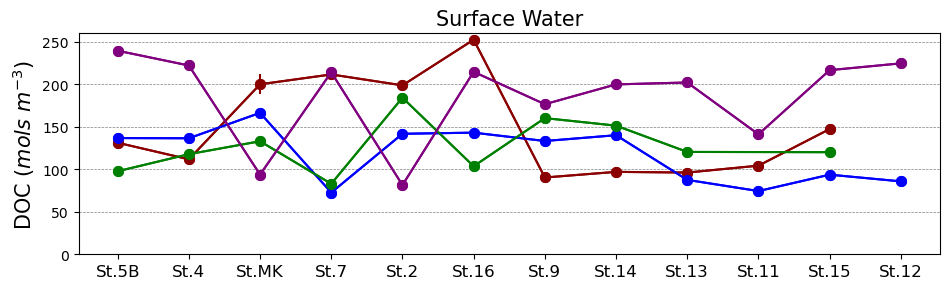

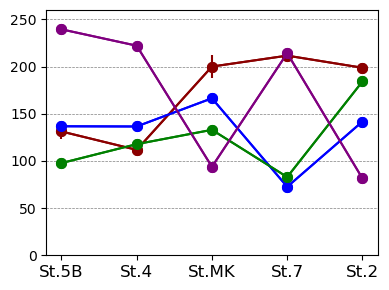

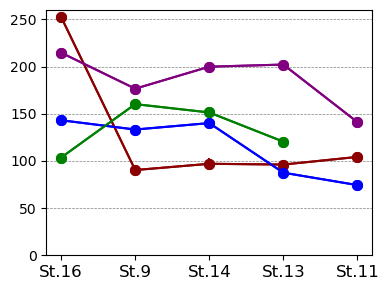

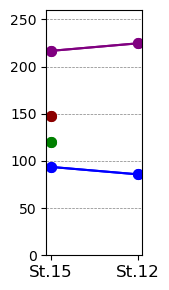

In [7]:
color_map = {
    'GOM2021': 'darkred',
    'GOM21FA': 'blue',
    'GOM22SP': 'green',
    'GOM22SU': 'purple'
}

label_map = {
    'GOM2021': 'Summer 2021',
    'GOM21FA': 'Fall 2021',
    'GOM22SP': 'Spring 2022',
    'GOM22SU': 'Summer 2022'
}

categories = ['St.5B', 'St.4', 'St.MK', 'St.7', 'St.2', 'St.16', 'St.9', 'St.14', 'St.13', 'St.11', 'St.15', 'St.12']
subcategories = ['GOM2021','GOM21FA', 'GOM22SP', 'GOM22SU']

y_min_max_val = 260

def line_plot_stock(data_f, flux_col, ylabels, title): 
    df = data_f.dropna(subset=[flux_col])
    df = df[df[flux_col] > 0 ]

    barWidth = 0  # Adjusted bar width for better spacing
    fig, ax = plt.subplots(figsize=(8/10*len(categories), 3))

    # Adjusted r for spacing between groups
    r = np.arange(len(categories))  # x locations for the groups
    positions = [r + i * barWidth for i in range(len(subcategories))]

    for pos, subcat in zip(positions, subcategories):
        values = []
        errors = []
        x_ticks = []
        for idx, cat in enumerate(categories):
            value = df[(df['station'] == cat) & (df['camp'] == subcat)][flux_col].values
            error = df[(df['station'] == cat) & (df['camp'] == subcat)][error_col].values
            if len(value) > 0:
                values.append(value[0])
                errors.append(error[0])
                x_ticks.append(idx)
            else:
                continue  # Skip if there is no value
        
        # Plot only if there are values to plot
        if values:
            ax.plot(np.array(x_ticks) + barWidth * (subcategories.index(subcat) - len(subcategories)/2), values,
                    color=color_map[subcat], label=label_map[subcat], markersize=7, marker='o')
            ax.errorbar(np.array(x_ticks) + barWidth * (subcategories.index(subcat) - len(subcategories)/2), values, yerr= errors, xerr=None,
                    color=color_map[subcat], label=label_map[subcat], markersize=7, marker='o')

    ax.set_ylim(0, y_min_max_val)
    ax.set_ylabel(ylabels, size=15)
    ax.set_title(title, size=15)
    ax.set_xticks(r)  # Use the positions where data was actually plotted
    ax.set_xticklabels([cat for cat in categories], size=12)
    ax.grid(True, axis='y', color='gray', linestyle='--', linewidth=0.5)  # Customizes color, style, and width
    ax.legend().remove()

    fig.set_facecolor('w')
    plt.tight_layout()

    plt.savefig(f'../Dissertation_projects/Figures/DOC_paper_figs/{save_name}.png')

    plt.show()

# Define the parameters

ylabes = r'DOC $(mols$ $m^{-3})$'
tlabes = 'Surface Water'
data_f = df
error_col = "NPOC_uM_surf_std"
flux_col = "NPOC_uM_surf"
save_name = 'NPOC_uM_surf'

line_plot_stock(data_f, flux_col, ylabes, tlabes)

categories = ['St.5B', 'St.4', 'St.MK', 'St.7', 'St.2']
subcategories = ['GOM2021','GOM21FA', 'GOM22SP', 'GOM22SU']

ylabes = r''
tlabes = ''
data_f = df
error_col = "NPOC_uM_surf_std"
flux_col = "NPOC_uM_surf"
save_name = 'NPOC_uM_surf_1'

line_plot_stock(data_f, flux_col, ylabes, tlabes)

categories = [ 'St.16', 'St.9', 'St.14', 'St.13', 'St.11']
subcategories = ['GOM2021','GOM21FA', 'GOM22SP', 'GOM22SU']

# Define the parameters
ylabes = r'' 
tlabes = ''
data_f = df
error_col = "NPOC_uM_surf_std"
flux_col = "NPOC_uM_surf"
save_name = 'NPOC_uM_surf_2'

line_plot_stock(data_f, flux_col, ylabes, tlabes)

def line_plot_stock(data_f, flux_col, ylabels, title): 
    df = data_f.dropna(subset=[flux_col])
    df = df[df[flux_col] > 0 ]

    barWidth = 0  # Adjusted bar width for better spacing
    fig, ax = plt.subplots(figsize=(len(categories)*8/9, 3))

    # Adjusted r for spacing between groups
    r = np.arange(len(categories))  # x locations for the groups
    positions = [r + i * barWidth for i in range(len(subcategories))]

    for pos, subcat in zip(positions, subcategories):
        values = []
        errors = []
        x_ticks = []
        for idx, cat in enumerate(categories):
            value = df[(df['station'] == cat) & (df['camp'] == subcat)][flux_col].values
            error = df[(df['station'] == cat) & (df['camp'] == subcat)][error_col].values
            if len(value) > 0:
                values.append(value[0])
                errors.append(error[0])
                x_ticks.append(idx)
            else:
                continue  # Skip if there is no value
        
        # Plot only if there are values to plot
        if values:
            ax.plot(np.array(x_ticks) + barWidth * (subcategories.index(subcat) - len(subcategories)/2), values,
                    color=color_map[subcat], label=label_map[subcat], markersize=7, marker='o')
            ax.errorbar(np.array(x_ticks) + barWidth * (subcategories.index(subcat) - len(subcategories)/2), values, yerr= errors, xerr=None,
                    color=color_map[subcat], label=label_map[subcat], markersize=7, marker='o')

    ax.set_ylim(0, y_min_max_val)
    ax.set_ylabel(ylabels, size=15)
    ax.set_title(title, size=15)
    ax.set_xticks(r)  # Use the positions where data was actually plotted
    ax.set_xticklabels([cat for cat in categories], size=12)
    ax.grid(True, axis='y', color='gray', linestyle='--', linewidth=0.5)  # Customizes color, style, and width
    ax.legend().remove()

    fig.set_facecolor('w')
    plt.tight_layout()

    plt.savefig(f'../Dissertation_projects/Figures/DOC_paper_figs/{save_name}.png')

    plt.show()

# Define the parameters

categories = [ 'St.15', 'St.12']
subcategories = ['GOM2021','GOM21FA', 'GOM22SP', 'GOM22SU']

# Define the parameters
ylabes = '' 
tlabes = ''
data_f = df
error_col = "NPOC_uM_surf_std"
flux_col = "NPOC_uM_surf"
save_name = 'NPOC_uM_surf_3'

line_plot_stock(data_f, flux_col, ylabes, tlabes)

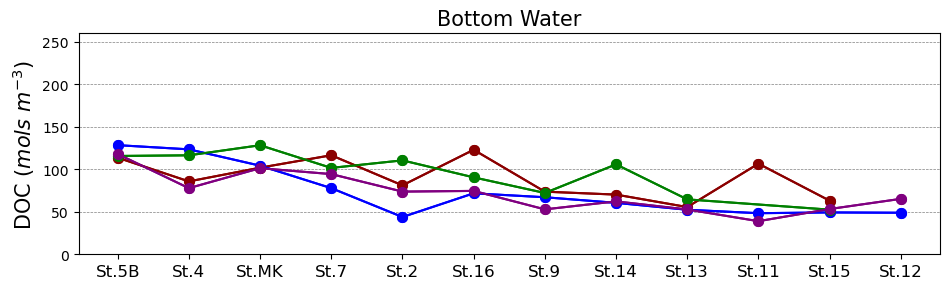

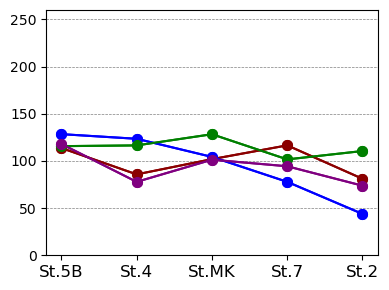

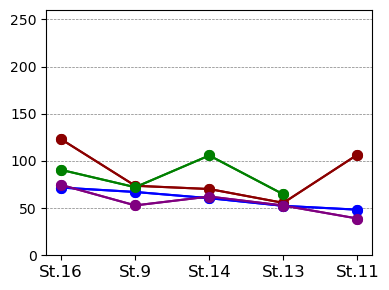

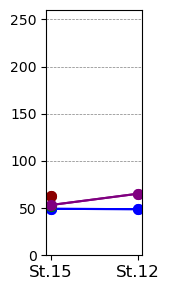

In [8]:
color_map = {
    'GOM2021': 'darkred',
    'GOM21FA': 'blue',
    'GOM22SP': 'green',
    'GOM22SU': 'purple'
}

label_map = {
    'GOM2021': 'Summer 2021',
    'GOM21FA': 'Fall 2021',
    'GOM22SP': 'Spring 2022',
    'GOM22SU': 'Summer 2022'
}

categories = ['St.5B', 'St.4', 'St.MK', 'St.7', 'St.2', 'St.16', 'St.9', 'St.14', 'St.13', 'St.11', 'St.15', 'St.12']
subcategories = ['GOM2021','GOM21FA', 'GOM22SP', 'GOM22SU']

y_min_max_val = 260

def line_plot_stock(data_f, flux_col, ylabels, title): 
    df = data_f.dropna(subset=[flux_col])
    df = df[df[flux_col] > 0 ]

    barWidth = 0  # Adjusted bar width for better spacing
    fig, ax = plt.subplots(figsize=(8/10*len(categories), 3))

    # Adjusted r for spacing between groups
    r = np.arange(len(categories))  # x locations for the groups
    positions = [r + i * barWidth for i in range(len(subcategories))]

    for pos, subcat in zip(positions, subcategories):
        values = []
        errors = []
        x_ticks = []
        for idx, cat in enumerate(categories):
            value = df[(df['station'] == cat) & (df['camp'] == subcat)][flux_col].values
            error = df[(df['station'] == cat) & (df['camp'] == subcat)][error_col].values
            if len(value) > 0:
                values.append(value[0])
                errors.append(error[0])
                x_ticks.append(idx)
            else:
                continue  # Skip if there is no value
        
        # Plot only if there are values to plot
        if values:
            ax.plot(np.array(x_ticks) + barWidth * (subcategories.index(subcat) - len(subcategories)/2), values,
                    color=color_map[subcat], label=label_map[subcat], markersize=7, marker='o')
            ax.errorbar(np.array(x_ticks) + barWidth * (subcategories.index(subcat) - len(subcategories)/2), values, yerr= errors, xerr=None,
                    color=color_map[subcat], label=label_map[subcat], markersize=7, marker='o')

    ax.set_ylim(0, y_min_max_val)
    ax.set_ylabel(ylabels, size=15)
    ax.set_title(title, size=15)
    ax.set_xticks(r)  # Use the positions where data was actually plotted
    ax.set_xticklabels([cat for cat in categories], size=12)
    ax.grid(True, axis='y', color='gray', linestyle='--', linewidth=0.5)  # Customizes color, style, and width
    ax.legend().remove()

    fig.set_facecolor('w')
    plt.tight_layout()

    plt.savefig(f'../Dissertation_projects/Figures/DOC_paper_figs/{save_name}.png')

    plt.show()

# Define the parameters

ylabes = r'DOC $(mols$ $m^{-3})$'
tlabes = r'Bottom Water'
data_f = df
error_col = "NPOC_uM_std"
flux_col = "NPOC_uM"
save_name = 'NPOC_uM'

line_plot_stock(data_f, flux_col, ylabes, tlabes)

categories = ['St.5B', 'St.4', 'St.MK', 'St.7', 'St.2']
subcategories = ['GOM2021','GOM21FA', 'GOM22SP', 'GOM22SU']

ylabes = r''
tlabes = ''
data_f = df
error_col = "NPOC_uM_std"
flux_col = "NPOC_uM"
save_name = 'NPOC_uM_1'

line_plot_stock(data_f, flux_col, ylabes, tlabes)

categories = [ 'St.16', 'St.9', 'St.14', 'St.13', 'St.11']
subcategories = ['GOM2021','GOM21FA', 'GOM22SP', 'GOM22SU']

# Define the parameters
ylabes = r'' 
tlabes = ''
data_f = df
error_col = "NPOC_uM_std"
flux_col = "NPOC_uM"
save_name = 'NPOC_uM_2'

line_plot_stock(data_f, flux_col, ylabes, tlabes)

def line_plot_stock(data_f, flux_col, ylabels, title): 
    df = data_f.dropna(subset=[flux_col])
    df = df[df[flux_col] > 0 ]

    barWidth = 0  # Adjusted bar width for better spacing
    fig, ax = plt.subplots(figsize=(len(categories)*8/9, 3))

    # Adjusted r for spacing between groups
    r = np.arange(len(categories))  # x locations for the groups
    positions = [r + i * barWidth for i in range(len(subcategories))]

    for pos, subcat in zip(positions, subcategories):
        values = []
        errors = []
        x_ticks = []
        for idx, cat in enumerate(categories):
            value = df[(df['station'] == cat) & (df['camp'] == subcat)][flux_col].values
            error = df[(df['station'] == cat) & (df['camp'] == subcat)][error_col].values
            if len(value) > 0:
                values.append(value[0])
                errors.append(error[0])
                x_ticks.append(idx)
            else:
                continue  # Skip if there is no value
        
        # Plot only if there are values to plot
        if values:
            ax.plot(np.array(x_ticks) + barWidth * (subcategories.index(subcat) - len(subcategories)/2), values,
                    color=color_map[subcat], label=label_map[subcat], markersize=7, marker='o')
            ax.errorbar(np.array(x_ticks) + barWidth * (subcategories.index(subcat) - len(subcategories)/2), values, yerr= errors, xerr=None,
                    color=color_map[subcat], label=label_map[subcat], markersize=7, marker='o')

    ax.set_ylim(0, y_min_max_val)
    ax.set_ylabel(ylabels, size=15)
    ax.set_title(title, size=15)
    ax.set_xticks(r)  # Use the positions where data was actually plotted
    ax.set_xticklabels([cat for cat in categories], size=12)
    ax.grid(True, axis='y', color='gray', linestyle='--', linewidth=0.5)  # Customizes color, style, and width
    ax.legend().remove()

    fig.set_facecolor('w')
    plt.tight_layout()

    plt.savefig(f'../Dissertation_projects/Figures/DOC_paper_figs/{save_name}.png')

    plt.show()

# Define the parameters

categories = [ 'St.15', 'St.12']
subcategories = ['GOM2021','GOM21FA', 'GOM22SP', 'GOM22SU']

# Define the parameters
ylabes = r'' 
tlabes = ''
data_f = df
error_col = "NPOC_uM_std"
flux_col = "NPOC_uM"
save_name = 'NPOC_uM_3'

line_plot_stock(data_f, flux_col, ylabes, tlabes)

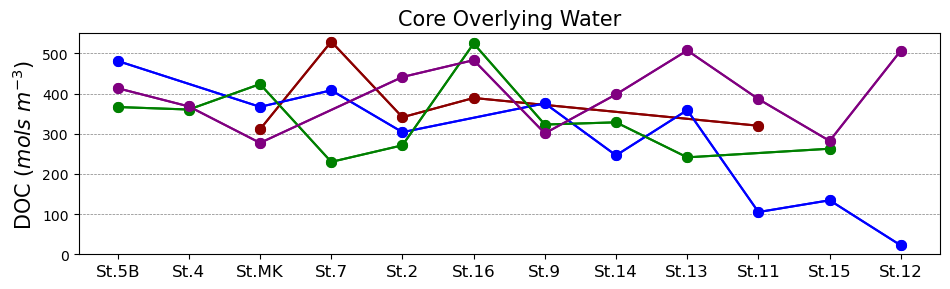

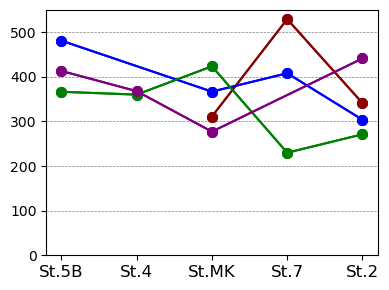

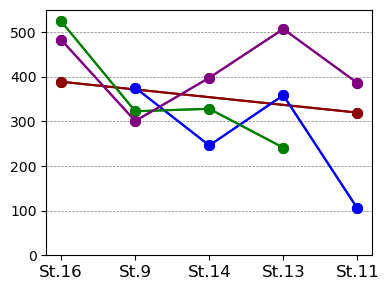

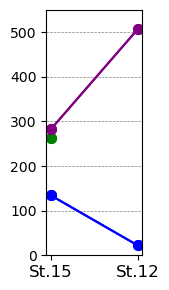

In [9]:
color_map = {
    'GOM2021': 'darkred',
    'GOM21FA': 'blue',
    'GOM22SP': 'green',
    'GOM22SU': 'purple'
}

label_map = {
    'GOM2021': 'Summer 2021',
    'GOM21FA': 'Fall 2021',
    'GOM22SP': 'Spring 2022',
    'GOM22SU': 'Summer 2022'
}

categories = ['St.5B', 'St.4', 'St.MK', 'St.7', 'St.2', 'St.16', 'St.9', 'St.14', 'St.13', 'St.11', 'St.15', 'St.12']
subcategories = ['GOM2021','GOM21FA', 'GOM22SP', 'GOM22SU']

y_min_max_val = 550

def line_plot_stock(data_f, flux_col, ylabels, title): 
    df = data_f.dropna(subset=[flux_col])
    df = df[df[flux_col] > 0 ]

    barWidth = 0  # Adjusted bar width for better spacing
    fig, ax = plt.subplots(figsize=(8/10*len(categories), 3))

    # Adjusted r for spacing between groups
    r = np.arange(len(categories))  # x locations for the groups
    positions = [r + i * barWidth for i in range(len(subcategories))]

    for pos, subcat in zip(positions, subcategories):
        values = []
        errors = []
        x_ticks = []
        for idx, cat in enumerate(categories):
            value = df[(df['station'] == cat) & (df['camp'] == subcat)][flux_col].values
            error = df[(df['station'] == cat) & (df['camp'] == subcat)][error_col].values
            if len(value) > 0:
                values.append(value[0])
                errors.append(error[0])
                x_ticks.append(idx)
            else:
                continue  # Skip if there is no value
        
        # Plot only if there are values to plot
        if values:
            ax.plot(np.array(x_ticks) + barWidth * (subcategories.index(subcat) - len(subcategories)/2), values,
                    color=color_map[subcat], label=label_map[subcat], markersize=7, marker='o')
            ax.errorbar(np.array(x_ticks) + barWidth * (subcategories.index(subcat) - len(subcategories)/2), values, yerr= errors, xerr=None,
                    color=color_map[subcat], label=label_map[subcat], markersize=7, marker='o')

    ax.set_ylim(0, y_min_max_val)
    ax.set_ylabel(ylabels, size=15)
    ax.set_title(title, size=15)
    ax.set_xticks(r)  # Use the positions where data was actually plotted
    ax.set_xticklabels([cat for cat in categories], size=12)
    ax.grid(True, axis='y', color='gray', linestyle='--', linewidth=0.5)  # Customizes color, style, and width
    ax.legend().remove()

    fig.set_facecolor('w')
    plt.tight_layout()

    plt.savefig(f'../Dissertation_projects/Figures/DOC_paper_figs/{save_name}.png')

    plt.show()

# Define the parameters

ylabes = r'DOC $(mols$ $m^{-3})$'
tlabes = r'Core Overlying Water'
data_f = df
error_col = "NPOC_ow_std"
flux_col = "NPOC_ow"
save_name = 'NPOC_ow'

line_plot_stock(data_f, flux_col, ylabes, tlabes)

categories = ['St.5B', 'St.4', 'St.MK', 'St.7', 'St.2']
subcategories = ['GOM2021','GOM21FA', 'GOM22SP', 'GOM22SU']

ylabes = r''
tlabes = ''
data_f = df
error_col = "NPOC_ow_std"
flux_col = "NPOC_ow"
save_name = 'NPOC_ow_1'

line_plot_stock(data_f, flux_col, ylabes, tlabes)

categories = [ 'St.16', 'St.9', 'St.14', 'St.13', 'St.11']
subcategories = ['GOM2021','GOM21FA', 'GOM22SP', 'GOM22SU']

# Define the parameters
ylabes = r'' 
tlabes = ''
data_f = df
error_col = "NPOC_ow_std"
flux_col = "NPOC_ow"
save_name = 'NPOC_ow_2'

line_plot_stock(data_f, flux_col, ylabes, tlabes)

def line_plot_stock(data_f, flux_col, ylabels, title): 
    df = data_f.dropna(subset=[flux_col])
    df = df[df[flux_col] > 0 ]

    barWidth = 0  # Adjusted bar width for better spacing
    fig, ax = plt.subplots(figsize=(len(categories)*8/9, 3))

    # Adjusted r for spacing between groups
    r = np.arange(len(categories))  # x locations for the groups
    positions = [r + i * barWidth for i in range(len(subcategories))]

    for pos, subcat in zip(positions, subcategories):
        values = []
        errors = []
        x_ticks = []
        for idx, cat in enumerate(categories):
            value = df[(df['station'] == cat) & (df['camp'] == subcat)][flux_col].values
            error = df[(df['station'] == cat) & (df['camp'] == subcat)][error_col].values
            if len(value) > 0:
                values.append(value[0])
                errors.append(error[0])
                x_ticks.append(idx)
            else:
                continue  # Skip if there is no value
        
        # Plot only if there are values to plot
        if values:
            ax.plot(np.array(x_ticks) + barWidth * (subcategories.index(subcat) - len(subcategories)/2), values,
                    color=color_map[subcat], label=label_map[subcat], markersize=7, marker='o')
            ax.errorbar(np.array(x_ticks) + barWidth * (subcategories.index(subcat) - len(subcategories)/2), values, yerr= errors, xerr=None,
                    color=color_map[subcat], label=label_map[subcat], markersize=7, marker='o')

    ax.set_ylim(0, y_min_max_val)
    ax.set_ylabel(ylabels, size=15)
    ax.set_title(title, size=15)
    ax.set_xticks(r)  # Use the positions where data was actually plotted
    ax.set_xticklabels([cat for cat in categories], size=12)
    ax.grid(True, axis='y', color='gray', linestyle='--', linewidth=0.5)  # Customizes color, style, and width
    ax.legend().remove()

    fig.set_facecolor('w')
    plt.tight_layout()

    plt.savefig(f'../Dissertation_projects/Figures/DOC_paper_figs/{save_name}.png')

    plt.show()

# Define the parameters

categories = [ 'St.15', 'St.12']
subcategories = ['GOM2021','GOM21FA', 'GOM22SP', 'GOM22SU']

# Define the parameters
ylabes = r'' 
tlabes = ''
data_f = df
error_col = "NPOC_ow_std"
flux_col = "NPOC_ow"
save_name = 'NPOC_ow_3'

line_plot_stock(data_f, flux_col, ylabes, tlabes)

In [ ]:
stop

In [ ]:
lat_top=30
lat_bot=28
lon_left=-91.5
lon_rigth=-88.75
extent=[lon_left, lon_rigth, lat_bot, lat_top]

# set resolution of the features in map: '10m', '50m', or '110m'.  
# If you do this the first time it will take a while downloading the coastline 
# and other features. In the future it will be faster
res = '10m'

def plot_mapbase(extent, ax=None, res='10m', projection=ccrs.PlateCarree()):
    if ax is None:
        fig = plt.figure(figsize=(10,5)) # set fig size
        ax = fig.add_subplot(111, projection=projection)
        
    ax.set_extent(extent)
    ax.coastlines(res)
    ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                name='land',
                                                facecolor='lightgrey', 
                                                scale=res)) 
    ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                name='rivers_lake_centerlines',
                                                edgecolor='blue',
                                                facecolor='none',
                                                scale=res))
    gl = ax.gridlines(xlocs=np.arange(lon_left, lon_rigth+1),
                      ylocs=np.arange(lat_bot, lat_top+1),
                      draw_labels=True, 
                      linewidth=0.5, color='k', linestyle=':')
    gl.top_labels = gl.right_labels = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    return ax

def map_O2(data_f, topic, cb_name):
    camps = ['GOM2021', 'GOM21FA', 'GOM22SP', 'GOM22SU']
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 8), subplot_kw={'projection': ccrs.PlateCarree()})
    axes = axes.ravel()  # Flatten the 2x2 grid to access each subplot with a single index
    for i, camp in enumerate(camps):
        df_subset = data_f[data_f['camp'] == camp].dropna(subset=[topic])    
        plot_mapbase(extent, ax=axes[i])
        mappable = axes[i].scatter(df_subset['longitude_bottom'], df_subset['latitude_bottom'],
                                   c=df_subset[topic],
                                   edgecolor='k',
                                   cmap=cmo.oxy,
                                   s=200,
                                   vmin=0,  # Set global min and max for colormap
                                   vmax=300,
                                   transform=ccrs.PlateCarree())
    
        label_map = {
            'GOM2021': 'Summer 2021',
            'GOM21FA': 'Fall 2021',
            'GOM22SP': 'Spring 2022',
            'GOM22SU': 'Summer 2022'
        }
    
        axes[i].set_title(label_map[camp], size = 20)
    
    cbar_ax = fig.add_axes([0.92, 0.3, 0.02, 0.4])
    cb = fig.colorbar(mappable, cax=cbar_ax)
    cb.set_label(cb_name, size=20, color='black')
    cb.ax.tick_params(labelcolor='black') 
    cb.ax.tick_params(labelsize=10)
    fig.set_facecolor('w')
    plt.show()
    



In [ ]:


def map_doc(data_f, topic, cb_name):
    camps = ['GOM2021', 'GOM21FA', 'GOM22SP', 'GOM22SU']
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 8), subplot_kw={'projection': ccrs.PlateCarree()})
    axes = axes.ravel()  # Flatten the 2x2 grid to access each subplot with a single index
    for i, camp in enumerate(camps):
        df_subset = data_f[data_f['camp'] == camp].dropna(subset=[topic])    
        plot_mapbase(extent, ax=axes[i])
        mappable = axes[i].scatter(df_subset['longitude_bottom'], df_subset['latitude_bottom'],
                                   c=df_subset[topic],
                                   edgecolor='k',
                                   cmap=cmo.turbid,
                                   s=200,
                                   vmin=0,  # Set global min and max for colormap
                                   vmax=150,
                                   transform=ccrs.PlateCarree())
    
        label_map = {
            'GOM2021': 'Summer 2021',
            'GOM21FA': 'Fall 2021',
            'GOM22SP': 'Spring 2022',
            'GOM22SU': 'Summer 2022'
        }
    
        axes[i].set_title(label_map[camp], size = 20)
    
    cbar_ax = fig.add_axes([0.92, 0.3, 0.02, 0.4])
    cb = fig.colorbar(mappable, cax=cbar_ax)
    cb.set_label(cb_name, size=20, color='black')
    cb.ax.tick_params(labelcolor='black') 
    cb.ax.tick_params(labelsize=10)
    fig.set_facecolor('w')
    plt.show()
    

def map_doc(data_f, topic, cb_name):
    camps = ['GOM2021', 'GOM21FA', 'GOM22SP', 'GOM22SU']
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 8), subplot_kw={'projection': ccrs.PlateCarree()})
    axes = axes.ravel()  # Flatten the 2x2 grid to access each subplot with a single index
    for i, camp in enumerate(camps):
        df_subset = data_f[data_f['camp'] == camp].dropna(subset=[topic])    
        plot_mapbase(extent, ax=axes[i])
        mappable = axes[i].scatter(df_subset['longitude_bottom'], df_subset['latitude_bottom'],
                                   c=df_subset[topic],
                                   edgecolor='k',
                                   cmap=cmo.turbid,
                                   s=200,
                                   vmin=0,  # Set global min and max for colormap
                                   vmax=250,
                                   transform=ccrs.PlateCarree())
    
        label_map = {
            'GOM2021': 'Summer 2021',
            'GOM21FA': 'Fall 2021',
            'GOM22SP': 'Spring 2022',
            'GOM22SU': 'Summer 2022'
        }
    
        axes[i].set_title(label_map[camp], size = 20)
    
    cbar_ax = fig.add_axes([0.92, 0.3, 0.02, 0.4])
    cb = fig.colorbar(mappable, cax=cbar_ax)
    cb.set_label(cb_name, size=20, color='black')
    cb.ax.tick_params(labelcolor='black') 
    cb.ax.tick_params(labelsize=10)
    fig.set_facecolor('w')
    plt.show()

def map_doc_ow(data_f, topic, cb_name):
    camps = ['GOM2021', 'GOM21FA', 'GOM22SP', 'GOM22SU']
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 8), subplot_kw={'projection': ccrs.PlateCarree()})
    axes = axes.ravel()  # Flatten the 2x2 grid to access each subplot with a single index
    for i, camp in enumerate(camps):
        df_subset = data_f[data_f['camp'] == camp].dropna(subset=[topic])    
        plot_mapbase(extent, ax=axes[i])
        mappable = axes[i].scatter(df_subset['longitude_bottom'], df_subset['latitude_bottom'],
                                   c=df_subset[topic],
                                   edgecolor='k',
                                   cmap=cmo.turbid,
                                   s=200,
                                   vmin=0,  # Set global min and max for colormap
                                   vmax=500,
                                   transform=ccrs.PlateCarree())
    
        label_map = {
            'GOM2021': 'Summer 2021',
            'GOM21FA': 'Fall 2021',
            'GOM22SP': 'Spring 2022',
            'GOM22SU': 'Summer 2022'
        }
    
        axes[i].set_title(label_map[camp], size = 20)
    
    cbar_ax = fig.add_axes([0.92, 0.3, 0.02, 0.4])
    cb = fig.colorbar(mappable, cax=cbar_ax)
    cb.set_label(cb_name, size=20, color='black')
    cb.ax.tick_params(labelcolor='black') 
    cb.ax.tick_params(labelsize=10)
    fig.set_facecolor('w')
    plt.show()


In [ ]:
def map_temp(data_f, topic, cb_name):
    camps = ['GOM2021', 'GOM21FA', 'GOM22SP', 'GOM22SU']
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 8), subplot_kw={'projection': ccrs.PlateCarree()})
    axes = axes.ravel()  # Flatten the 2x2 grid to access each subplot with a single index
    for i, camp in enumerate(camps):
        df_subset = data_f[data_f['camp'] == camp].dropna(subset=[topic])    
        plot_mapbase(extent, ax=axes[i])
        mappable = axes[i].scatter(df_subset['longitude_bottom'], df_subset['latitude_bottom'],
                                   c=df_subset[topic],
                                   edgecolor='k',
                                   cmap=cmo.thermal,
                                   s=200,
                                   vmin=0,  # Set global min and max for colormap
                                   vmax=31,
                                   transform=ccrs.PlateCarree())
    
        label_map = {
            'GOM2021': 'Summer 2021',
            'GOM21FA': 'Fall 2021',
            'GOM22SP': 'Spring 2022',
            'GOM22SU': 'Summer 2022'
        }
    
        axes[i].set_title(label_map[camp], size = 20)
    
    cbar_ax = fig.add_axes([0.92, 0.3, 0.02, 0.4])
    cb = fig.colorbar(mappable, cax=cbar_ax)
    cb.set_label(cb_name, size=20, color='black')
    cb.ax.tick_params(labelcolor='black') 
    cb.ax.tick_params(labelsize=10)
    fig.set_facecolor('w')
    plt.show()
    

In [ ]:
def map_sal(data_f, topic, cb_name):
    camps = ['GOM2021', 'GOM21FA', 'GOM22SP', 'GOM22SU']
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 8), subplot_kw={'projection': ccrs.PlateCarree()})
    axes = axes.ravel()  # Flatten the 2x2 grid to access each subplot with a single index
    for i, camp in enumerate(camps):
        df_subset = data_f[data_f['camp'] == camp].dropna(subset=[topic])    
        plot_mapbase(extent, ax=axes[i])
        mappable = axes[i].scatter(df_subset['longitude_bottom'], df_subset['latitude_bottom'],
                                   c=df_subset[topic],
                                   edgecolor='k',
                                   cmap=cmo.haline,
                                   s=200,
                                   vmin=data_f[topic].min(),  # Set global min and max for colormap
                                   vmax=data_f[topic].max(),
                                   transform=ccrs.PlateCarree())
    
        label_map = {
            'GOM2021': 'Summer 2021',
            'GOM21FA': 'Fall 2021',
            'GOM22SP': 'Spring 2022',
            'GOM22SU': 'Summer 2022'
        }
    
        axes[i].set_title(label_map[camp], size = 20)
    
    cbar_ax = fig.add_axes([0.92, 0.3, 0.02, 0.4])
    cb = fig.colorbar(mappable, cax=cbar_ax)
    cb.set_label(cb_name, size=20, color='black')
    cb.ax.tick_params(labelcolor='black') 
    cb.ax.tick_params(labelsize=10)
    fig.set_facecolor('w')
    plt.show()
    

In [ ]:
data_f = df
topic = 'O2_uM_bottom'
cb_name = r'Bottom Water O$_2$ $\mu$M'
map_O2(data_f, topic, cb_name)


data_f = df
topic = 'sal_bottom'
cb_name = 'Bottom Water \n Salinity PSU'
map_sal(data_f, topic, cb_name)


data_f = df
topic = 'temp_bottom'
cb_name = 'Bottom Water \n Temprature °C'
map_temp(data_f, topic, cb_name)

data_f = df
topic = 'NPOC_ow'
cb_name = r'Overlying Water DOC $\mu$M'
map_doc_ow(data_f, topic, cb_name)

data_f = df
topic = 'NPOC_uM'
cb_name = r'Bottom Water DOC $\mu$M'
map_doc(data_f, topic, cb_name)

    
data_f = df
topic = 'NPOC_uM_surf'
cb_name = r'Surface Water DOC $\mu$M'
map_doc(data_f, topic, cb_name)

In [ ]:
df['DOC:TDN'] = df['NPOC_uM'] / df['TN_uM'] 
df['NPOC_uM_std'] = df['NPOC_uM_std'].apply(lambda x: x / np.sqrt(2) if x > 4 else x)
df['TN_uM_std'] = df['TN_uM_std'].apply(lambda x: x / np.sqrt(2) if x > 5 else x)

df['DOC:TDN_STD'] = df['NPOC_uM_std'] + df['TN_uM_std'] 

df['DOC_mmolm3'] = df['NPOC_uM'] *.01 * 10e-3
df['DOC_mmolm3_STD'] = df['NPOC_uM_std'] *.01 * 10e-3
df['TN_uM']

In [ ]:
categories = ['St.5B', 'St.4', 'St.MK', 'St.7', 'St.2', 'St.16', 'St.9', 'St.14', 'St.13', 'St.11', 'St.15', 'St.12']
subcategories = ['GOM2021','GOM21FA', 'GOM22SP', 'GOM22SU']


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def line_plot_stock(data_f, flux_col, ylabels, title): 
    df = data_f.dropna(subset=[flux_col])
    df = df[df[flux_col] > 0 ]

    color_map = {
        'GOM2021': 'darkred',
        'GOM21FA': 'blue',
        'GOM22SP': 'green',
        'GOM22SU': 'purple'
    }

    label_map = {
        'GOM2021': 'Summer 2021',
        'GOM21FA': 'Fall 2021',
        'GOM22SP': 'Spring 2022',
        'GOM22SU': 'Summer 2022'
    }

    barWidth = 0  # Adjusted bar width for better spacing
    fig, ax = plt.subplots(figsize=(8, 3))

    # Adjusted r for spacing between groups
    r = np.arange(len(categories))  # x locations for the groups
    positions = [r + i * barWidth for i in range(len(subcategories))]

    for pos, subcat in zip(positions, subcategories):
        values = []
        errors = []
        x_ticks = []
        for idx, cat in enumerate(categories):
            #df = df[df['']]
            value = df[(df['station'] == cat) & (df['camp'] == subcat)][flux_col].values
            error = df[(df['station'] == cat) & (df['camp'] == subcat)][error_col].values
            if len(value) > 0:
                values.append(value[0])
                errors.append(error[0])
                x_ticks.append(idx)
            else:
                continue  # Skip if there is no value
        
        # Plot only if there are values to plot
        if values:
            ax.plot(np.array(x_ticks) + barWidth * (subcategories.index(subcat) - len(subcategories)/2), values,
                    color=color_map[subcat], label=label_map[subcat], markersize=7, marker='o')
            ax.errorbar(np.array(x_ticks) + barWidth * (subcategories.index(subcat) - len(subcategories)/2), values, yerr=errors, xerr=None,
                    color=color_map[subcat], label=label_map[subcat], markersize=2, marker='o')
            print(max(errors))

    ax.set_ylim(0, y_min_max_val)
    ax.set_ylabel(ylabels, size=15)
    ax.set_title(title, size=15)
    ax.set_xticks(r)  # Use the positions where data was actually plotted
    ax.set_xticklabels([cat for cat in categories], size=12)
    ax.grid(True, axis='y', color='gray', linestyle='--', linewidth=0.5)  # Customizes color, style, and width
    ax.legend().remove()

    fig.set_facecolor('w')
    plt.tight_layout()

    plt.savefig(f'../Dissertation_projects/Figures/Stock_line_plot_figs/{save_name}.png')

    plt.show()

# Define the parameters


y_min_max_val = 25

ylabes = r'DOC:TDN' 
tlabes = 'Bottom Water'
data_f = df
flux_col = "DOC:TDN"
error_col = "DOC:TDN_STD"
save_name = 'bw_doc_tdn_ind_line_plot'

line_plot_stock(data_f, flux_col, ylabes, tlabes)

y_min_max_val = .025

ylabes = r'DOC $(mols$ $m^{-3})$' 
tlabes = 'Bottom Water'

data_f = df
flux_col = "DOC_mmolm3"
error_col = "DOC_mmolm3_STD"
save_name = 'bw_doc_ind_line_plot'

line_plot_stock(data_f, flux_col, ylabes, tlabes)


In [ ]:
categories = ['St.5B', 'St.4', 'St.MK', 'St.7', 'St.2', 'St.16', 'St.9', 'St.14', 'St.13', 'St.11', 'St.15', 'St.12']
subcategories = ['GOM2021','GOM21FA', 'GOM22SP', 'GOM22SU']


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def line_plot_stock(data_f, flux_col, ylabels, title): 
    df = data_f.dropna(subset=[flux_col])
    df = df[df[flux_col] > 0 ]

    color_map = {
        'GOM2021': 'darkred',
        'GOM21FA': 'blue',
        'GOM22SP': 'green',
        'GOM22SU': 'purple'
    }

    label_map = {
        'GOM2021': 'Summer 2021',
        'GOM21FA': 'Fall 2021',
        'GOM22SP': 'Spring 2022',
        'GOM22SU': 'Summer 2022'
    }

    barWidth = 0  # Adjusted bar width for better spacing
    fig, ax = plt.subplots(figsize=(8, 3))

    # Adjusted r for spacing between groups
    r = np.arange(len(categories))  # x locations for the groups
    positions = [r + i * barWidth for i in range(len(subcategories))]

    for pos, subcat in zip(positions, subcategories):
        values = []
        errors = []
        x_ticks = []
        for idx, cat in enumerate(categories):
            df = df[df[flux_col] <= 100]
            value = df[(df['station'] == cat) & (df['camp'] == subcat)][flux_col].values
            error = df[(df['station'] == cat) & (df['camp'] == subcat)][error_col].values
            if len(value) > 0:
                values.append(value[0])
                errors.append(error[0])
                x_ticks.append(idx)
            else:
                continue  # Skip if there is no value
        
        # Plot only if there are values to plot
        if values:
            ax.plot(np.array(x_ticks) + barWidth * (subcategories.index(subcat) - len(subcategories)/2), values,
                    color=color_map[subcat], label=label_map[subcat], markersize=7, marker='o')
            ax.errorbar(np.array(x_ticks) + barWidth * (subcategories.index(subcat) - len(subcategories)/2), values, yerr=errors, xerr=None,
                    color=color_map[subcat], label=label_map[subcat], markersize=2, marker='o')
            print(max(errors))

    ax.set_ylim(0, y_min_max_val)
    ax.set_ylabel(ylabels, size=15)
    ax.set_title(title, size=15)
    ax.set_xticks(r)  # Use the positions where data was actually plotted
    ax.set_xticklabels([cat for cat in categories], size=12)
    ax.grid(True, axis='y', color='gray', linestyle='--', linewidth=0.5)  # Customizes color, style, and width
    ax.legend().remove()

    fig.set_facecolor('w')
    plt.tight_layout()

    plt.savefig(f'../Dissertation_projects/Figures/Stock_line_plot_figs/{save_name}.png')

    plt.show()

# Define the parameters


y_min_max_val = 20

ylabes = r'DOC:TDN' 
tlabes = 'Bottom Water'
data_f = df
flux_col = "DOC:TDN"
error_col = "DOC:TDN_STD"
save_name = 'bw_doc_tdn_ind_line_plot'

line_plot_stock(data_f, flux_col, ylabes, tlabes)



In [ ]:
categories = ['St.5B', 'St.4', 'St.MK', 'St.7', 'St.2', 'St.16', 'St.9', 'St.14', 'St.13', 'St.11', 'St.15', 'St.12']
subcategories = ['GOM2021','GOM21FA', 'GOM22SP', 'GOM22SU']


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def line_plot_stock(data_f, flux_col, ylabels, title): 
    df = data_f.dropna(subset=[flux_col])
    df = df[df[flux_col] > 0 ]

    color_map = {
        'GOM2021': 'darkred',
        'GOM21FA': 'blue',
        'GOM22SP': 'green',
        'GOM22SU': 'purple'
    }

    label_map = {
        'GOM2021': 'Summer 2021',
        'GOM21FA': 'Fall 2021',
        'GOM22SP': 'Spring 2022',
        'GOM22SU': 'Summer 2022'
    }

    barWidth = 0  # Adjusted bar width for better spacing
    fig, ax = plt.subplots(figsize=(8/10*len(categories), 3))

    # Adjusted r for spacing between groups
    r = np.arange(len(categories))  # x locations for the groups
    positions = [r + i * barWidth for i in range(len(subcategories))]

    for pos, subcat in zip(positions, subcategories):
        values = []
        errors = []
        x_ticks = []
        for idx, cat in enumerate(categories):
            value = df[(df['station'] == cat) & (df['camp'] == subcat)][flux_col].values
            error = df[(df['station'] == cat) & (df['camp'] == subcat)][error_col].values
            if len(value) > 0:
                values.append(value[0])
                errors.append(error[0])
                x_ticks.append(idx)
            else:
                continue  # Skip if there is no value
        
        # Plot only if there are values to plot
        if values:
            ax.plot(np.array(x_ticks) + barWidth * (subcategories.index(subcat) - len(subcategories)/2), values,
                    color=color_map[subcat], label=label_map[subcat], markersize=7, marker='o')
            ax.errorbar(np.array(x_ticks) + barWidth * (subcategories.index(subcat) - len(subcategories)/2), values, yerr= errors, xerr=None,
                    color=color_map[subcat], label=label_map[subcat], markersize=7, marker='o')

    ax.set_ylim(0, y_min_max_val)
    ax.set_ylabel(ylabels, size=15)
    ax.set_title(title, size=15)
    ax.set_xticks(r)  # Use the positions where data was actually plotted
    ax.set_xticklabels([cat for cat in categories], size=12)
    ax.grid(True, axis='y', color='gray', linestyle='--', linewidth=0.5)  # Customizes color, style, and width
    ax.legend().remove()

    fig.set_facecolor('w')
    plt.tight_layout()

    plt.savefig(f'../Dissertation_projects/Figures/DOC_paper_figs/{save_name}.png')

    plt.show()

y_min_max_val = 25

ylabes = r'DOC:TDN' 
tlabes = 'Bottom Water'
data_f = df
flux_col = "DOC:TDN"
error_col = "DOC:TDN_STD"
save_name = 'bw_doc_tdn_ind_line_plot'

line_plot_stock(data_f, flux_col, ylabes, tlabes)

y_min_max_val = .025

ylabes = r'DOC $(mols$ $m^{-3})$' 
tlabes = 'Bottom Water'

data_f = df
flux_col = "DOC_mmolm3"
error_col = "DOC_mmolm3_STD"
save_name = 'bw_doc_ind_line_plot'

line_plot_stock(data_f, flux_col, ylabes, tlabes)

categories = ['St.5B', 'St.4', 'St.MK', 'St.7', 'St.2']
subcategories = ['GOM2021','GOM21FA', 'GOM22SP', 'GOM22SU']

y_min_max_val = 25

ylabes = '' 
tlabes = ''
data_f = df
flux_col = "DOC:TDN"
error_col = "DOC:TDN_STD"
save_name = 'bw_doc_tdn_ind_line_plot_1'

line_plot_stock(data_f, flux_col, ylabes, tlabes)

y_min_max_val = .025

ylabes = '' 
tlabes = ''
data_f = df
flux_col = "DOC_mmolm3"
error_col = "DOC_mmolm3_STD"
save_name = 'bw_doc_ind_line_plot_1'

line_plot_stock(data_f, flux_col, ylabes, tlabes)


categories = [ 'St.16', 'St.9', 'St.14', 'St.13', 'St.11']
subcategories = ['GOM2021','GOM21FA', 'GOM22SP', 'GOM22SU']

y_min_max_val = 25

ylabes = '' 
tlabes = ''
data_f = df
flux_col = "DOC:TDN"
error_col = "DOC:TDN_STD"
save_name = 'bw_doc_tdn_ind_line_plot_2'

line_plot_stock(data_f, flux_col, ylabes, tlabes)

y_min_max_val = .025

ylabes = '' 
tlabes = ''
data_f = df
flux_col = "DOC_mmolm3"
error_col = "DOC_mmolm3_STD"
save_name = 'bw_doc_ind_line_plot_2'

line_plot_stock(data_f, flux_col, ylabes, tlabes)

line_plot_stock(data_f, flux_col, ylabes, tlabes)

def line_plot_stock(data_f, flux_col, ylabels, title): 
    df = data_f.dropna(subset=[flux_col])
    df = df[df[flux_col] > 0 ]

    color_map = {
        'GOM2021': 'darkred',
        'GOM21FA': 'blue',
        'GOM22SP': 'green',
        'GOM22SU': 'purple'
    }

    label_map = {
        'GOM2021': 'Summer 2021',
        'GOM21FA': 'Fall 2021',
        'GOM22SP': 'Spring 2022',
        'GOM22SU': 'Summer 2022'
    }

    barWidth = 0  # Adjusted bar width for better spacing
    fig, ax = plt.subplots(figsize=(len(categories)*8/9, 3))

    # Adjusted r for spacing between groups
    r = np.arange(len(categories))  # x locations for the groups
    positions = [r + i * barWidth for i in range(len(subcategories))]

    for pos, subcat in zip(positions, subcategories):
        values = []
        errors = []
        x_ticks = []
        for idx, cat in enumerate(categories):
            value = df[(df['station'] == cat) & (df['camp'] == subcat)][flux_col].values
            error = df[(df['station'] == cat) & (df['camp'] == subcat)][error_col].values
            if len(value) > 0:
                values.append(value[0])
                errors.append(error[0])
                x_ticks.append(idx)
            else:
                continue  # Skip if there is no value
        
        # Plot only if there are values to plot
        if values:
            ax.plot(np.array(x_ticks) + barWidth * (subcategories.index(subcat) - len(subcategories)/2), values,
                    color=color_map[subcat], label=label_map[subcat], markersize=7, marker='o')
            ax.errorbar(np.array(x_ticks) + barWidth * (subcategories.index(subcat) - len(subcategories)/2), values, yerr= errors, xerr=None,
                    color=color_map[subcat], label=label_map[subcat], markersize=7, marker='o')

    ax.set_ylim(0, y_min_max_val)
    ax.set_ylabel(ylabels, size=15)
    ax.set_title(title, size=15)
    ax.set_xticks(r)  # Use the positions where data was actually plotted
    ax.set_xticklabels([cat for cat in categories], size=12)
    ax.grid(True, axis='y', color='gray', linestyle='--', linewidth=0.5)  # Customizes color, style, and width
    ax.legend().remove()

    fig.set_facecolor('w')
    plt.tight_layout()

    plt.savefig(f'../Dissertation_projects/Figures/DOC_paper_figs/{save_name}.png')

    plt.show()

# Define the parameters

categories = [ 'St.15', 'St.12']
subcategories = ['GOM2021','GOM21FA', 'GOM22SP', 'GOM22SU']

y_min_max_val = 25

ylabes = '' 
tlabes = ''
data_f = df
flux_col = "DOC:TDN"
error_col = "DOC:TDN_STD"
save_name = 'bw_doc_tdn_ind_line_plot_3'

line_plot_stock(data_f, flux_col, ylabes, tlabes)

y_min_max_val = .025

ylabes = '' 
tlabes = ''
data_f = df
flux_col = "DOC_mmolm3"
error_col = "DOC_mmolm3_STD"
save_name = 'bw_doc_ind_line_plot_3'

line_plot_stock(data_f, flux_col, ylabes, tlabes)

In [ ]:
categories = ['St.5B', 'St.4', 'St.MK', 'St.7', 'St.2', 'St.16', 'St.9', 'St.14', 'St.13', 'St.11', 'St.15', 'St.12']
subcategories = ['GOM2021','GOM21FA', 'GOM22SP', 'GOM22SU']


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def line_plot_stock(data_f, flux_col, ylabels, title): 
    df = data_f.dropna(subset=[flux_col])
    df = df[df[flux_col] > 0 ]
    df = df[df[flux_col] < 100]

    color_map = {
        'GOM2021': 'darkred',
        'GOM21FA': 'blue',
        'GOM22SP': 'green',
        'GOM22SU': 'purple'
    }

    label_map = {
        'GOM2021': 'Summer 2021',
        'GOM21FA': 'Fall 2021',
        'GOM22SP': 'Spring 2022',
        'GOM22SU': 'Summer 2022'
    }

    barWidth = 0  # Adjusted bar width for better spacing
    fig, ax = plt.subplots(figsize=(8/10*len(categories), 3))

    # Adjusted r for spacing between groups
    r = np.arange(len(categories))  # x locations for the groups
    positions = [r + i * barWidth for i in range(len(subcategories))]

    for pos, subcat in zip(positions, subcategories):
        values = []
        errors = []
        x_ticks = []
        for idx, cat in enumerate(categories):
            value = df[(df['station'] == cat) & (df['camp'] == subcat)][flux_col].values
            error = df[(df['station'] == cat) & (df['camp'] == subcat)][error_col].values
            if len(value) > 0:
                values.append(value[0])
                errors.append(error[0])
                x_ticks.append(idx)
            else:
                continue  # Skip if there is no value
        
        # Plot only if there are values to plot
        if values:
            ax.plot(np.array(x_ticks) + barWidth * (subcategories.index(subcat) - len(subcategories)/2), values,
                    color=color_map[subcat], label=label_map[subcat], markersize=7, marker='o')
            ax.errorbar(np.array(x_ticks) + barWidth * (subcategories.index(subcat) - len(subcategories)/2), values, yerr= errors, xerr=None,
                    color=color_map[subcat], label=label_map[subcat], markersize=7, marker='o')

    ax.set_ylim(0, y_min_max_val)
    ax.set_ylabel(ylabels, size=15)
    ax.set_title(title, size=15)
    ax.set_xticks(r)  # Use the positions where data was actually plotted
    ax.set_xticklabels([cat for cat in categories], size=12)
    ax.grid(True, axis='y', color='gray', linestyle='--', linewidth=0.5)  # Customizes color, style, and width
    ax.legend().remove()

    fig.set_facecolor('w')
    plt.tight_layout()

    plt.savefig(f'../Dissertation_projects/Figures/DOC_paper_figs/{save_name}.png')

    plt.show()

y_min_max_val = 25

ylabes = r'DOC:TDN' 
tlabes = 'Bottom Water'
data_f = df
flux_col = "DOC:TDN"
error_col = "DOC:TDN_STD"
save_name = 'bw_doc_tdn_ind_line_plot'

line_plot_stock(data_f, flux_col, ylabes, tlabes)

categories = ['St.5B', 'St.4', 'St.MK', 'St.7', 'St.2']
subcategories = ['GOM2021','GOM21FA', 'GOM22SP', 'GOM22SU']

y_min_max_val = 25

ylabes = '' 
tlabes = ''
data_f = df
flux_col = "DOC:TDN"
error_col = "DOC:TDN_STD"
save_name = 'bw_doc_tdn_ind_line_plot_1'

line_plot_stock(data_f, flux_col, ylabes, tlabes)


categories = [ 'St.16', 'St.9', 'St.14', 'St.13', 'St.11']
subcategories = ['GOM2021','GOM21FA', 'GOM22SP', 'GOM22SU']

y_min_max_val = 25

ylabes = '' 
tlabes = ''
data_f = df
flux_col = "DOC:TDN"
error_col = "DOC:TDN_STD"
save_name = 'bw_doc_tdn_ind_line_plot_2'

line_plot_stock(data_f, flux_col, ylabes, tlabes)


def line_plot_stock(data_f, flux_col, ylabels, title): 
    df = data_f.dropna(subset=[flux_col])
    df = df[df[flux_col] > 0 ]

    color_map = {
        'GOM2021': 'darkred',
        'GOM21FA': 'blue',
        'GOM22SP': 'green',
        'GOM22SU': 'purple'
    }

    label_map = {
        'GOM2021': 'Summer 2021',
        'GOM21FA': 'Fall 2021',
        'GOM22SP': 'Spring 2022',
        'GOM22SU': 'Summer 2022'
    }

    barWidth = 0  # Adjusted bar width for better spacing
    fig, ax = plt.subplots(figsize=(len(categories)*8/9, 3))

    # Adjusted r for spacing between groups
    r = np.arange(len(categories))  # x locations for the groups
    positions = [r + i * barWidth for i in range(len(subcategories))]

    for pos, subcat in zip(positions, subcategories):
        values = []
        errors = []
        x_ticks = []
        for idx, cat in enumerate(categories):
            value = df[(df['station'] == cat) & (df['camp'] == subcat)][flux_col].values
            error = df[(df['station'] == cat) & (df['camp'] == subcat)][error_col].values
            if len(value) > 0:
                values.append(value[0])
                errors.append(error[0])
                x_ticks.append(idx)
            else:
                continue  # Skip if there is no value
        
        # Plot only if there are values to plot
        if values:
            ax.plot(np.array(x_ticks) + barWidth * (subcategories.index(subcat) - len(subcategories)/2), values,
                    color=color_map[subcat], label=label_map[subcat], markersize=7, marker='o')
            ax.errorbar(np.array(x_ticks) + barWidth * (subcategories.index(subcat) - len(subcategories)/2), values, yerr= errors, xerr=None,
                    color=color_map[subcat], label=label_map[subcat], markersize=7, marker='o')

    ax.set_ylim(0, y_min_max_val)
    ax.set_ylabel(ylabels, size=15)
    ax.set_title(title, size=15)
    ax.set_xticks(r)  # Use the positions where data was actually plotted
    ax.set_xticklabels([cat for cat in categories], size=12)
    ax.grid(True, axis='y', color='gray', linestyle='--', linewidth=0.5)  # Customizes color, style, and width
    ax.legend().remove()

    fig.set_facecolor('w')
    plt.tight_layout()

    plt.savefig(f'../Dissertation_projects/Figures/DOC_paper_figs/{save_name}.png')

    plt.show()

# Define the parameters

categories = [ 'St.15', 'St.12']
subcategories = ['GOM2021','GOM21FA', 'GOM22SP', 'GOM22SU']

y_min_max_val = 25

ylabes = '' 
tlabes = ''
data_f = df
flux_col = "DOC:TDN"
error_col = "DOC:TDN_STD"
save_name = 'bw_doc_tdn_ind_line_plot_3'

line_plot_stock(data_f, flux_col, ylabes, tlabes)

In [ ]:
categories = ['St.5B', 'St.4', 'St.MK', 'St.7', 'St.2', 'St.16', 'St.9', 'St.14', 'St.13', 'St.11', 'St.15', 'St.12']
subcategories = ['GOM2021','GOM21FA', 'GOM22SP', 'GOM22SU']


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def line_plot_stock(data_f, flux_col, ylabels, title): 
    df = data_f.dropna(subset=[flux_col])
    df = df[df[flux_col] > 0 ]

    color_map = {
        'GOM2021': 'darkred',
        'GOM21FA': 'blue',
        'GOM22SP': 'green',
        'GOM22SU': 'purple'
    }

    label_map = {
        'GOM2021': 'Summer 2021',
        'GOM21FA': 'Fall 2021',
        'GOM22SP': 'Spring 2022',
        'GOM22SU': 'Summer 2022'
    }

    barWidth = 0  # Adjusted bar width for better spacing
    fig, ax = plt.subplots(figsize=(8/10*len(categories), 3))

    # Adjusted r for spacing between groups
    r = np.arange(len(categories))  # x locations for the groups
    positions = [r + i * barWidth for i in range(len(subcategories))]

    for pos, subcat in zip(positions, subcategories):
        values = []
        errors = []
        x_ticks = []
        for idx, cat in enumerate(categories):
            value = df[(df['station'] == cat) & (df['camp'] == subcat)][flux_col].values
            error = df[(df['station'] == cat) & (df['camp'] == subcat)][error_col].values
            if len(value) > 0:
                values.append(value[0])
                errors.append(error[0])
                x_ticks.append(idx)
            else:
                continue  # Skip if there is no value
        
        # Plot only if there are values to plot
        if values:
            ax.plot(np.array(x_ticks) + barWidth * (subcategories.index(subcat) - len(subcategories)/2), values,
                    color=color_map[subcat], label=label_map[subcat], markersize=7, marker='o')
            ax.errorbar(np.array(x_ticks) + barWidth * (subcategories.index(subcat) - len(subcategories)/2), values, yerr= errors, xerr=None,
                    color=color_map[subcat], label=label_map[subcat], markersize=7, marker='o')

    ax.set_ylim(0, y_min_max_val)
    ax.set_ylabel(ylabels, size=15)
    ax.set_title(title, size=15)
    ax.set_xticks(r)  # Use the positions where data was actually plotted
    ax.set_xticklabels([cat for cat in categories], size=12)
    ax.grid(True, axis='y', color='gray', linestyle='--', linewidth=0.5)  # Customizes color, style, and width
    ax.legend().remove()

    fig.set_facecolor('w')
    plt.tight_layout()

    plt.savefig(f'../Dissertation_projects/Figures/DOC_paper_figs/{save_name}.png')

    plt.show()

y_min_max_val = .025

ylabes = r'DOC $(mols$ $m^{-3})$' 
tlabes = 'Bottom Water'

data_f = df
flux_col = "DOC_mmolm3"
error_col = "DOC_mmolm3_STD"
save_name = 'bw_doc_ind_line_plot'

line_plot_stock(data_f, flux_col, ylabes, tlabes)

categories = ['St.5B', 'St.4', 'St.MK', 'St.7', 'St.2']
subcategories = ['GOM2021','GOM21FA', 'GOM22SP', 'GOM22SU']

y_min_max_val = .025

ylabes = '' 
tlabes = ''
data_f = df
flux_col = "DOC_mmolm3"
error_col = "DOC_mmolm3_STD"
save_name = 'bw_doc_ind_line_plot_1'

line_plot_stock(data_f, flux_col, ylabes, tlabes)


categories = [ 'St.16', 'St.9', 'St.14', 'St.13', 'St.11']
subcategories = ['GOM2021','GOM21FA', 'GOM22SP', 'GOM22SU']

y_min_max_val = .025

ylabes = '' 
tlabes = ''
data_f = df
flux_col = "DOC_mmolm3"
error_col = "DOC_mmolm3_STD"
save_name = 'bw_doc_ind_line_plot_2'

line_plot_stock(data_f, flux_col, ylabes, tlabes)

def line_plot_stock(data_f, flux_col, ylabels, title): 
    df = data_f.dropna(subset=[flux_col])
    df = df[df[flux_col] > 0 ]

    color_map = {
        'GOM2021': 'darkred',
        'GOM21FA': 'blue',
        'GOM22SP': 'green',
        'GOM22SU': 'purple'
    }

    label_map = {
        'GOM2021': 'Summer 2021',
        'GOM21FA': 'Fall 2021',
        'GOM22SP': 'Spring 2022',
        'GOM22SU': 'Summer 2022'
    }

    barWidth = 0  # Adjusted bar width for better spacing
    fig, ax = plt.subplots(figsize=(len(categories)*8/9, 3))

    # Adjusted r for spacing between groups
    r = np.arange(len(categories))  # x locations for the groups
    positions = [r + i * barWidth for i in range(len(subcategories))]

    for pos, subcat in zip(positions, subcategories):
        values = []
        errors = []
        x_ticks = []
        for idx, cat in enumerate(categories):
            value = df[(df['station'] == cat) & (df['camp'] == subcat)][flux_col].values
            error = df[(df['station'] == cat) & (df['camp'] == subcat)][error_col].values
            if len(value) > 0:
                values.append(value[0])
                errors.append(error[0])
                x_ticks.append(idx)
            else:
                continue  # Skip if there is no value
        
        # Plot only if there are values to plot
        if values:
            ax.plot(np.array(x_ticks) + barWidth * (subcategories.index(subcat) - len(subcategories)/2), values,
                    color=color_map[subcat], label=label_map[subcat], markersize=7, marker='o')
            ax.errorbar(np.array(x_ticks) + barWidth * (subcategories.index(subcat) - len(subcategories)/2), values, yerr= errors, xerr=None,
                    color=color_map[subcat], label=label_map[subcat], markersize=7, marker='o')

    ax.set_ylim(0, y_min_max_val)
    ax.set_ylabel(ylabels, size=15)
    ax.set_title(title, size=15)
    ax.set_xticks(r)  # Use the positions where data was actually plotted
    ax.set_xticklabels([cat for cat in categories], size=12)
    ax.grid(True, axis='y', color='gray', linestyle='--', linewidth=0.5)  # Customizes color, style, and width
    ax.legend().remove()

    fig.set_facecolor('w')
    plt.tight_layout()

    plt.savefig(f'../Dissertation_projects/Figures/DOC_paper_figs/{save_name}.png')

    plt.show()

# Define the parameters

categories = [ 'St.15', 'St.12']
subcategories = ['GOM2021','GOM21FA', 'GOM22SP', 'GOM22SU']

y_min_max_val = .025

ylabes = '' 
tlabes = ''
data_f = df
flux_col = "DOC_mmolm3"
error_col = "DOC_mmolm3_STD"
save_name = 'bw_doc_ind_line_plot_3'

line_plot_stock(data_f, flux_col, ylabes, tlabes)

In [ ]:
df.to_csv('../Dissertation_projects/Data/Stats_data_sets/BW_OW_SW_data_sets.csv')
df.columns

In [ ]:
def xyplotcolor(data_f):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
    model = LinearRegression()
    sub = data_f.dropna(subset=[x_var, y_var])
    data = sub[[x_var, y_var, z_var]]
    colors = data[z_var].astype(float)

    vmin = data[z_var].min()
    vmax = data[z_var].max()

    X = data[[x_var]]
    y = data[y_var]
    model.fit(X, y)
    score = model.score(X, y)

    sns.scatterplot(x=x_var, y=y_var, c=colors, cmap=z_var_color, s=100, data=data, ax=axes, legend=False , vmin=vmin, vmax=vmax)
    sns.lineplot(x=X[x_var], y=model.predict(X), ax=axes, color='black')

    axes.set_xlabel(x_var.replace(x_var, x_var_lab), size=15)
    axes.set_ylabel(y_var.replace(y_var, y_var_lab), size=15)

    axes.set_title(titel + f'R\u00B2: {score:.2f}', size = 15)

    # Add a color bar for the depth on the right side of the figure
    fig.subplots_adjust(right=0.85)
    cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
    cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=z_var_color, norm=plt.Normalize(vmin=vmin, vmax=vmax)), cax=cbar_ax)
    cbar.ax.set_ylabel(z_var_lab, size=15)

    # Show the plot
    plt.savefig(f'../Dissertation_projects/Figures/CTD_profiles/{save_name}.png')
    plt.show()

x_var = 'NPOC_ow'
y_var = 'NPOC_uM'

x_var_lab = 'Overlying water DOC (µM)'
y_var_lab = 'Bottom water DOC (µM)'

z_var = 'O2_uM_bottom'
z_var_lab = r'Bottom Water O$_2$ $\mu$M'
z_var_color = cmo.oxy

titel = ""
save_name = 'OW_vs_BW_O2_doc_conc'
xyplotcolor(df)


In [ ]:

df['ow_bot_doc'] = df['NPOC_ow'] - df['NPOC_uM'] 

x_var = 'pw_flux_doc'
y_var = 'ow_bot_doc'

y_var_lab = 'Overlying water DOC (µM) Grater then Bottom water DOC (µM)'
x_var_lab = 'Flux Of DOC'

z_var = 'O2_uM_bottom'
z_var_lab = r'Bottom Water O$_2$ $\mu$M'
z_var_color = cmo.oxy

titel = ""
save_name = 'OW_vs_BW_doc_conc'
xyplotcolor(df)

### PART 3 Allaiis  ####

# Initialize lists to store the data
data_to_save = []

stations = df_doc_wc['Location'].unique()
trips = df_doc_wc['Campaign'].unique()

# Loop through trips and stations
for trip in trips:
    for station in stations:
        subset_df = df_doc_wc[(df_doc_wc['Campaign'] == trip) & (df_doc_wc['Location'] == station)]
        subset_df = subset_df.sort_values(by=['Depth'])
        subset_df_avg = subset_df.groupby('Depth')['NPOC_uM'].mean().reset_index()
        subset_df_avg_sorted = subset_df_avg.sort_values(by='Depth', ascending=False)
        highest_two_depths_df = subset_df_avg_sorted.head(2)

        # Save highest_two_depths_df to the list
        highest_two_depths_list.append(highest_two_depths_df)

        subset_ds = ds[(ds['camp'] == trip) & (ds['station'] == station)]
        subset_ds = subset_ds.sort_values(by=['Pressure [dbar]'])

        # Check if 'Depth' column exists in subset_ds
        if 'Depth' in highest_two_depths_df.columns:
            # Get the two depth values from highest_two_depths_df
            depth_values = highest_two_depths_df['Depth'].values
            closest_pressure_values = []
            for depth in depth_values:
                closest_pressure_values.append(subset_ds.loc[np.abs(subset_ds['Pressure [dbar]'] - depth).idxmin(), 'Pressure [dbar]'])

            filtered_subset_ds = subset_ds[subset_ds['Pressure [dbar]'].isin(closest_pressure_values)]

            if len(filtered_subset_ds) >= 2:
                # Calculate the difference in NPOC_uM between the two highest depths
                npoc_diff = highest_two_depths_df.iloc[0]['NPOC_uM'] - highest_two_depths_df.iloc[1]['NPOC_uM']

                # Calculate the difference in 'sbeox0Mg/L' between the two closest pressure values
                sbeox_diff = filtered_subset_ds.iloc[0]['sbeox0Mg/L'] - filtered_subset_ds.iloc[1]['sbeox0Mg/L']

                # Store the data to save
                data_to_save.append({
                    'Campaign': trip,
                    'Location': station,
                    'NPOC_uM_Diff': npoc_diff,
                    'sbeox0Mg/L_Diff': sbeox_diff
                })
            else:
                print(f"Not enough data points for trip {trip} and station {station}")

# Create a DataFrame from the data to save
data_to_save_df = pd.DataFrame(data_to_save)

# Save the DataFrame to a CSV file
data_to_save_df


import pandas as pd
import numpy as np

# Initialize an empty list to store the filtered data and highest_two_depths_df
data_to_save = []


stations = df_doc_wc['Location'].unique()
trips = df_doc_wc['Campaign'].unique()

# Loop through trips and stations
for i, trip in enumerate(trips):
    for j, station in enumerate(stations):
        subset_df = df_doc_wc[(df_doc_wc['Campaign'] == trip) & (df_doc_wc['Location'] == station)]
        if len(subset_df) >= 2: 
            subset_df = subset_df.sort_values(by=['Depth'])
            subset_df_avg = subset_df.groupby('Depth')['NPOC_uM'].mean().reset_index()
            subset_df_avg_sorted = subset_df_avg.sort_values(by='Depth', ascending=False)
            highest_two_depths_df = subset_df_avg_sorted.head(2)
        
            NPOC_values = highest_two_depths_df['NPOC_uM'].values
            depth_values = highest_two_depths_df['Depth'].values
            
            NPOC_1 = NPOC_values[0]
            NPOC_2 = NPOC_values[1]
        
            NPOC_dep_1 = depth_values[0]
            NPOC_dep_2 = depth_values[1]
        
            npoc_diff = NPOC_1 - NPOC_2

            subset_ds = ds[(ds['camp'] == trip) & (ds['station'] == station)]
            subset_ds = subset_ds.sort_values(by=['Pressure [dbar]'])
        
            closest_pressure_values_1 = subset_ds.loc[np.abs(subset_ds['Pressure [dbar]'] - depth_values[0]).idxmin(), 'Pressure [dbar]']
            closest_pressure_values_2 = subset_ds.loc[np.abs(subset_ds['Pressure [dbar]'] - depth_values[1]).idxmin(), 'Pressure [dbar]']

            closest_pressure_values_1 = closest_pressure_values_1.mean()
            closest_pressure_values_2 = closest_pressure_values_2.mean()
        
            closest_ox_values_1 = subset_ds.loc[np.abs(subset_ds['Pressure [dbar]'] - depth_values[0]).idxmin(), 'ox_uM']
            closest_ox_values_2 = subset_ds.loc[np.abs(subset_ds['Pressure [dbar]'] - depth_values[1]).idxmin(), 'ox_uM']

            closest_ox_values_1 = closest_ox_values_1.mean()
            closest_ox_values_2 = closest_ox_values_2.mean()
        
            sbeox_diff = closest_ox_values_1.mean() - closest_ox_values_2.mean()
        
            data_to_save.append({'Campaign': trip,
                                 'Location': station,
                                 'NPOC_uM_Diff': npoc_diff,
                                 'ox_uM_Diff': sbeox_diff,
                                 'NPOC_uM_upper': NPOC_2,
                                 'NPOC_uM_lower': NPOC_1,
                                 'Depth_doc_upper': NPOC_dep_2,
                                 'Depth_doc_lower': NPOC_dep_1, 
                                 'ox_uM_upper': closest_ox_values_2, 
                                 'ox_uM_lower': closest_ox_values_1, 
                                 'Depth_ctd_upper': closest_pressure_values_2,
                                 'Depth_ctd_lower': closest_pressure_values_1
                                })
        else: 
            print(f'fail to run {trip} {station}')
# Create a DataFrame from the data to save
data_to_save_df = pd.DataFrame(data_to_save)
        

data_to_save_df['Depth_doc_diff'] = data_to_save_df['Depth_doc_lower'] - data_to_save_df['Depth_doc_upper']
data_to_save_df['Depth_ctd_diff'] = data_to_save_df['Depth_ctd_lower'] - data_to_save_df['Depth_ctd_upper']

data_to_save_df['O2_change_per_meter'] = data_to_save_df['ox_uM_Diff'] / data_to_save_df['Depth_ctd_diff']
data_to_save_df['DOC_change_per_meter'] = data_to_save_df['NPOC_uM_Diff'] / data_to_save_df['Depth_doc_diff']
data_to_save_df['Depth_ctd_lower_log'] = np.log(data_to_save_df['Depth_ctd_lower'] )


data_bottom_water = data_to_save_df
data_bottom_water['code'] = data_bottom_water['Location'] + '_' + data_bottom_water['Campaign']

data_bottom_water.to_csv('../Dissertation_projects/Data/Stats_data_sets/data_bottom_water.csv')


In [ ]:
data_bottom_water = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/data_bottom_water.csv')
data_bottom_water

In [ ]:
def cor_plot_stn_sum_2(data_frame, title):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
    
    # Set up the color bar limits
    vmin = data_frame['Depth_ctd_lower_log'].min()
    vmax = data_frame['Depth_ctd_lower_log'].max()

    # Loop through the subplots
    for i, x_var in enumerate(['ox_uM_upper', 'ox_uM_lower']):
        for j, y_var in enumerate(['NPOC_uM_upper', 'NPOC_uM_lower']):
            # Prepare the data for the subplot
            data = data_frame[[x_var, y_var, 'Depth_ctd_lower_log']]
            data.dropna(inplace=True)
            X = data[[x_var]]
            y = data[y_var]
            colors = data['Depth_ctd_lower_log'].astype(float)

            # Fit a linear regression model to the data
            model = LinearRegression()
            model.fit(X, y)
            score = model.score(X, y)

            # Plot the data and regression line
            ax = axes[j, i]
            sns.scatterplot(x=x_var, y=y_var, data=data, ax=ax, c=colors, cmap=cmo.haline, vmin=vmin, vmax=vmax, legend=False)
            sns.lineplot(x=X[x_var], y=model.predict(X), ax=ax, color='black')

            # Set the axis labels and title
            if j == 1:
                ax.set_xlabel(x_var.replace('ox_uM_lower', 'bbl O$_2$ (\u03BCM)').replace('ox_uM_upper', 'above bbl O$_2$ (\u03BCM)').replace('FeT_uM', 'Fe Total (\u03BCM)').replace('NPOC_uM', 'DOC (\u03BCM)').replace('TN_uM', 'dissolved N (\u03BCM)'), size=15)
            else: 
                ax.set_xlabel("")
            if i == 0:
                ax.set_ylabel(y_var.replace('NPOC_uM_lower', 'bbl DOC (\u03BCM)').replace('NPOC_uM_upper', r'above bbl DOC (\u03BCM)'), size = 15)
            else: 
                ax.set_ylabel("")
            ax.set_title(f'R\u00B2: {score:.2f}', size = 15)
            #ax.set_ylim([data[y_var].max(), data[y_var].max()])
            #ax.set_xlim([data[x_var].min(), data[x_var].max()])

    # Add a color bar for the depth on the right side of the figure
    fig.subplots_adjust(right=0.85)
    cbar_ax = fig.add_axes([.9, 0.15, 0.03, 0.7])
    cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=cmo.haline, norm=plt.Normalize(vmin=vmin, vmax=vmax)), cax=cbar_ax)
    cbar.ax.set_ylabel('Site log Depth M', size = 15)
        
    # Adjust the layout of the subplots
    fig.suptitle(title, size = 15)
    fig.set_facecolor('w')
    #plt.tight_layout()
    plt.show()

cor_plot_stn_sum_2(data_bottom_water, f' Northern Gulf of Mexico \n Deep water Water col: O2 and DOC')



# Part 4 water column figues 

import pandas as pd
import numpy as np

# Initialize an empty list to store the filtered data and highest_two_depths_df
data_save = []


stations = df_doc_wc['Location'].unique()
trips = df_doc_wc['Campaign'].unique()

# Loop through trips and stations
for i, trip in enumerate(trips):
    for j, station in enumerate(stations):
        subset_df = df_doc_wc[(df_doc_wc['Campaign'] == trip) & (df_doc_wc['Location'] == station)]
        if len(subset_df) >= 2: 
            subset_df = subset_df.sort_values(by=['Depth'])
            subset_df_avg = subset_df.groupby('Depth')['NPOC_uM'].mean().reset_index()
            subset_df_avg_sorted = subset_df_avg.sort_values(by='Depth', ascending=False)
            depths_df = subset_df_avg_sorted
        
            NPOC_values = depths_df['NPOC_uM'].values
            depth_values = depths_df['Depth'].values
            
            subset_ds = ds[(ds['camp'] == trip) & (ds['station'] == station)]
            subset_ds = subset_ds.sort_values(by=['Pressure [dbar]'])
            

            subset_ds = ds[(ds['camp'] == trip) & (ds['station'] == station)]
            subset_ds = subset_ds.sort_values(by=['Pressure [dbar]'])
        
            val_save = []
            for val in depth_values: 
                closest_pressure_value = subset_ds.loc[np.abs(subset_ds['Pressure [dbar]'] - val).idxmin(), 'Pressure [dbar]']
                closest_ox_value = subset_ds.loc[np.abs(subset_ds['Pressure [dbar]'] - val).idxmin(), 'ox_uM']
                closest_temp_value = subset_ds.loc[np.abs(subset_ds['Pressure [dbar]'] - val).idxmin(), 't068C']
                closest_sal_value = subset_ds.loc[np.abs(subset_ds['Pressure [dbar]'] - val).idxmin(), 'sal00']
                
                val_save.append({'Press': closest_pressure_value.mean(),
                                 'ox': closest_ox_value.mean(),
                                 'temp': closest_temp_value.mean(),
                                 'sal': closest_sal_value.mean()})
                
            val_save_df = pd.DataFrame(val_save)
            val_save_df['NPOC_uM'] = NPOC_values
            val_save_df['Depth'] = depth_values
            val_save_df['Campaign'] = trip
            val_save_df['Location'] = station
            
            data_save.append(val_save_df)
        else: 
            print(f'fail to run {trip} {station}')
            
# Create a DataFrame from the data to save
data_save = pd.concat(data_save, ignore_index=True)
        
data_save

data_wc = data_save

data_wc['Ts'] = (298.15 - data_wc['temp']) / (273.15 + data_wc['temp'])
data_wc['Ts'] = np.log(data_wc['Ts'] ) 


data_wc['density_kg_m3'] = seawater.dens(data_wc['sal'], data_wc['temp'], data_wc['Press'])  # density at specified pressure (in kg/m^3)
data_wc['density_kg_l'] = data_wc['density_kg_m3'] / 1000

data_wc['ox_umol_kg'] = data_wc['ox'] / data_wc['density_kg_l']

con1 = 5.80871
con2 = 3.20291
con3 = 4.17887 
con4 = 5.10006 
con5 = 9.86643e-2
con6 = 3.80369 

cof1 = -7.01577e-3
cof2 = -7.70028e-3
cof3 = -1.13864e-2
cof4 = -9.51519e-3
cof5 = -2.75915e-7

#as per book 
data_wc['ox_sat'] = con1+data_wc['Ts']*con2+(data_wc['Ts']**2)*con3+(data_wc['Ts']**3)*con4+(data_wc['Ts']**4)*con5+(data_wc['Ts']**5)*con6
data_wc['ox_sat'] = data_wc['ox_sat'] + data_wc['sal']*(cof1 + cof2*data_wc['Ts'] + cof3*data_wc['Ts']**2 + cof4*data_wc['Ts']**3 + cof5*data_wc['sal']**2)
data_wc['ox_sat'] = np.exp(data_wc['ox_sat'])

data_wc['aou'] = data_wc['ox_sat'] - data_wc['ox_umol_kg'] 

data_wc['group'] = "water_col"

# Define a function to assign group
def assign_group(df):
    max_depth_index = df['Depth'].idxmax()
    df.loc[df['Depth'] <= 5, 'group'] = 'Surface'
    df.loc[max_depth_index, 'group'] = 'BBL'
    return df

data_wc['aou-ceq'] = data_wc['aou'] * 0.72

data_wc['code'] = data_wc['Location'] + '_' + data_wc['Campaign']

data_wc.index = data_wc['code'] 

# Read Iron stocks data
fe_stocks = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/Iron_stocks.csv', sep=',', index_col=0)
fe_stocks_join = fe_stocks['fet_mol_per_m3_0_to_5cm']
data_wc['fet_mol_per_m3_0_to_5cm'] = fe_stocks_join
fe_stocks_join = fe_stocks['fe2_mol_per_m3_0_to_5cm']
data_wc['fe2_mol_per_m3_0_to_5cm'] = fe_stocks_join
fe_stocks_join = fe_stocks['fe3_mol_per_m3_0_to_5cm']
data_wc['fe3_mol_per_m3_0_to_5cm'] = fe_stocks_join
fe_stocks_join = fe_stocks['fet_mol_per_m3_0_to_25cm']
data_wc['fet_mol_per_m3_0_to_25cm'] = fe_stocks_join
fe_stocks_join = fe_stocks['fe2_mol_per_m3_0_to_25cm']
data_wc['fe2_mol_per_m3_0_to_25cm'] = fe_stocks_join
fe_stocks_join = fe_stocks['fe3_mol_per_m3_0_to_25cm']
data_wc['fe3_mol_per_m3_0_to_25cm'] = fe_stocks_join

# Read DOC stocks data
doc_stocks = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/DOC_stocks.csv', sep=',', index_col=0)
doc_stocks_join = doc_stocks['doc_mol_per_m3_0_to_25cm']
data_wc['doc_mol_per_m3_0_to_25cm'] = doc_stocks_join
doc_stocks_join = doc_stocks['doc_mol_per_m3_0_to_5cm']
data_wc['doc_mol_per_m3_0_to_5cm'] = doc_stocks_join

# Read NCS stocks data
ncs_stocks = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/NCS_stocks.csv', sep=',', index_col=0)
ncs_stocks['OC_mol_per_m3_0_to_5cm'] = ncs_stocks['OCg_5cm_deep/M2'] * 12
ncs_stocks_join = ncs_stocks['OC_mol_per_m3_0_to_5cm']
data_wc['OC_mol_per_m3_0_to_5cm'] = ncs_stocks_join

flux_doc_pw = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/Flux_doc_pw.csv', sep=',', index_col=0)
flux_doc_pw_join = flux_doc_pw['pw_flux_doc']
data_wc['pw_flux_doc'] = flux_doc_pw_join


n = 0.29
data_wc['Cox'] = (data_wc['pw_flux_doc'] / 0.36) 
data_wc['Cox'] = data_wc['Cox'].apply(lambda x: x ** (1/n))

data_wc['percent_doc_resp'] = (data_wc['NPOC_uM'] / data_wc['aou']*0.72) * 100

data_wc['ratio_flux_2_stock'] = data_wc['pw_flux_doc'] / data_wc['doc_mol_per_m3_0_to_5cm']
data_wc['ratio_pw_flux_doc_2_cox'] = data_wc['pw_flux_doc'] / data_wc['Cox']

data_wc['ratio_doc_2_fet'] = data_wc['doc_mol_per_m3_0_to_5cm'] / data_wc['fet_mol_per_m3_0_to_25cm']
data_wc['ratio_oc_2_fet'] = data_wc['OC_mol_per_m3_0_to_5cm'] / data_wc['fet_mol_per_m3_0_to_5cm']



data_wc.to_csv('../Dissertation_projects/Data/Stats_data_sets/data_wc.csv')


data_wc = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/data_wc.csv')

flux_doc_pw = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/Flux_doc_bc.csv', sep=',', index_col=0)
flux_doc_pw_join = flux_doc_pw['bc_flux_doc']
data_wc.index = data_wc['code']
data_wc['bc_flux_doc'] = flux_doc_pw_join

data_wc.to_csv('../Dissertation_projects/Data/Stats_data_sets/data_wc.csv')
data_wc

In [ ]:
data_wc = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/data_wc.csv')

data_wc.loc[data_wc['pw_flux_doc'] > 25, 'pw_flux_doc'] = np.nan
data_wc['ratio_flux_2_stock'] = data_wc['pw_flux_doc'] / data_wc['doc_mol_per_m3_0_to_5cm']

n = 0.29
data_wc['Cox'] = data_wc['pw_flux_doc'] / 0.36
data_wc['Cox'] = data_wc['Cox'] ** (1/n)

data_wc['ratio_pw_flux_doc_2_cox'] = data_wc['pw_flux_doc'] / data_wc['Cox']

data_wc['ratio_doc_2_fet'] = data_wc['doc_mol_per_m3_0_to_5cm'] / data_wc['fet_mol_per_m3_0_to_25cm']
data_wc['ratio_oc_2_fet'] = data_wc['OC_mol_per_m3_0_to_5cm'] / data_wc['fet_mol_per_m3_0_to_5cm']


data_wc['group'] == "water_col"
data_wc['group']


# Define a function to assign group
def assign_group(df):
    max_depth_index = df['Depth'].idxmax()
    df.loc[df['Depth'] <= 5, 'group'] = 'Surface'
    df.loc[max_depth_index, 'group'] = 'BBL'
    return df

# Apply the function within groups
data_wc = data_wc.groupby(['Campaign', 'Location']).apply(assign_group).reset_index(drop=True)


data_wc['group'].unique()

data_wc_all = data_wc


df_note = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/Station_summary.csv',sep=',', index_col=0)
df_note['Date'] = pd.to_datetime(df_note['date'])
note_join = df_note['rgn']


data_wc_all['code'] = data_wc_all['Location'] + '_' + data_wc_all['Campaign']
data_wc_all.index = data_wc_all['code']
data_wc_all['rgn'] = note_join

data_wc_bbl = data_wc_all[data_wc_all['group'] == "BBL"]
data_wc_surf = data_wc_all[data_wc_all['group'] == "Surface"]
data_wc = data_wc_all[data_wc_all['group'] == "water_col"]

data_wc_hsal = data_wc[data_wc['sal'] >= 33]
data_wc_lsal = data_wc[data_wc['sal'] <= 33]

data_bbl_hsal = data_wc_bbl[data_wc_bbl['sal'] >= 33]
data_bbl_lsal = data_wc_bbl[data_wc_bbl['sal'] <= 33]

data_wc_all.columns

In [ ]:
data_wc_all['pw_flux_doc']

In [ ]:
def xyplotcolor(df):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
    model = LinearRegression()
    sub = df.dropna(subset=[x_var, y_var])
    data = sub[[x_var, y_var, z_var]]
    colors = data[z_var].astype(float)

    vmin = data_wc_all[z_var].min()
    vmax = data_wc_all[z_var].max()

    X = data[[x_var]]
    y = data[y_var]
    model.fit(X, y)
    score = model.score(X, y)

    sns.scatterplot(x=x_var, y=y_var, c=colors, cmap=z_var_color, s=100, data=data, ax=axes, legend=False , vmin=vmin, vmax=vmax)
    sns.lineplot(x=X[x_var], y=model.predict(X), ax=axes, color='black')

    axes.set_xlabel(x_var.replace(x_var, x_var_lab), size=15)
    axes.set_ylabel(y_var.replace(y_var, y_var_lab), size=15)

    axes.set_title(titel + f'R\u00B2: {score:.2f}', size = 15)

    # Add a color bar for the depth on the right side of the figure
    fig.subplots_adjust(right=0.85)
    cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
    cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=z_var_color, norm=plt.Normalize(vmin=vmin, vmax=vmax)), cax=cbar_ax)
    cbar.ax.set_ylabel(z_var_lab, size=15)

    # Show the plot
    plt.savefig(f'../Dissertation_projects/Figures/CTD_profiles/{save_name}.png')
    plt.show()
    

In [ ]:
print(data_wc_bbl['NPOC_uM'].min())
print(data_wc_bbl['NPOC_uM'].max())




    
x_var = 'aou'
y_var = 'NPOC_uM'

x_var_lab = 'AOU'
y_var_lab = 'DOC (µM)'

z_var = 'temp'
z_var_lab = 'Temp °C'
z_var_color = cmo.thermal

titel = ""
save_name = 'aou_temp_all'
xyplotcolor(data_wc_all)
titel = "Water Column "
save_name = 'aou_temp_wc'
xyplotcolor(data_wc)
titel = "Surface Water "
save_name = 'aou_temp_surf'
xyplotcolor(data_wc_surf)
titel = "Benthic Boundery Layer "
save_name = 'aou_temp_bbl'
xyplotcolor(data_wc_bbl)


x_var = 'aou'
y_var = 'NPOC_uM'

x_var_lab = 'AOU'
y_var_lab = 'DOC (µM)'

z_var = 'sal'
z_var_lab = 'Salinity PSU'
z_var_color = cmo.haline

titel = ""
save_name = 'aou_sal_all'
xyplotcolor(data_wc_all)
titel = "Water Column "
save_name = 'aou_sal_wc'
xyplotcolor(data_wc)
titel = "Surface Water "
save_name = 'aou_sal_surf'
xyplotcolor(data_wc_surf)
titel = "Benthic Boundery Layer "
save_name = 'aou_sal_bbl'
xyplotcolor(data_wc_bbl)

x_var = 'ox'
y_var = 'NPOC_uM'

x_var_lab = 'O$_2$ (µM)'
y_var_lab = 'DOC (µM)'


z_var = 'temp'
z_var_lab = 'Temp °C' 
z_var_color = cmo.thermal

titel = ""
save_name = 'ox_temp_all'
xyplotcolor(data_wc_all)
titel = "Water Column "
save_name = 'ox_temp_wc'
xyplotcolor(data_wc)
titel = "Surface Water "
save_name = 'ox_temp_surf'
xyplotcolor(data_wc_surf)
titel = "Benthic Boundery Layer "
save_name = 'ox_temp_bbl'
xyplotcolor(data_wc_bbl)

x_var = 'ox'
y_var = 'NPOC_uM'

x_var_lab = 'O$_2$ (µM)'
y_var_lab = 'DOC (µM)'

z_var = 'sal'
z_var_lab = 'Salinity PSU'
z_var_color = cmo.haline

titel = ""
save_name = 'ox_sal_all'
xyplotcolor(data_wc_all)
titel = "Water Column "
save_name = 'ox_sal_wc'
xyplotcolor(data_wc)
titel = "Surface Water "
save_name = 'ox_sal_surf'
xyplotcolor(data_wc_surf)
titel = "Benthic Boundery Layer "
save_name = 'ox_sal_bbl'
xyplotcolor(data_wc_bbl)

In [ ]:
# Group by 'station' and 'camp' and calculate the mean of 'NPOC_uM'
mean_npoc = data_wc_bbl.groupby(['rgn', 'Campaign'])['NPOC_uM'].mean().reset_index()
print(mean_npoc)
mean_npoc = data_wc_bbl.groupby(['Campaign'])['NPOC_uM'].mean().reset_index()
print(mean_npoc)
mean_npoc = data_wc_bbl.groupby(['rgn'])['NPOC_uM'].mean().reset_index()
print(mean_npoc)

In [ ]:
# Group by 'station' and 'camp' and calculate the mean of 'NPOC_uM'
mean_npoc = data_wc_surf.groupby(['rgn', 'Campaign'])['NPOC_uM'].mean().reset_index()
print(mean_npoc)
mean_npoc = data_wc_surf.groupby(['Campaign'])['NPOC_uM'].mean().reset_index()
print(mean_npoc)
mean_npoc = data_wc_surf.groupby(['rgn'])['NPOC_uM'].mean().reset_index()
print(mean_npoc)

In [ ]:
import numpy as np

def tls_regression(x, y):
    # Add a column of ones to x to represent the intercept
    X = np.column_stack((np.ones(len(x)), x))

    # Compute the SVD of X
    U, s, Vt = np.linalg.svd(X, full_matrices=False)

    # Compute the pseudo-inverse of X
    X_inv = np.dot(Vt.T / s, U.T)

    # Compute the TLS regression coefficients
    beta_tls = np.dot(X_inv, y)

    return beta_tls

# Assuming you have your data x_var and y_var
x_var = data_wc_hsal['aou-ceq']
y_var = data_wc_hsal['NPOC_uM']

# Perform TLS regression
beta_tls = tls_regression(x_var, y_var)

# Print coefficients
intercept_tls, slope_tls = beta_tls
print("Intercept (TLS):", intercept_tls)
print("Slope (TLS):", slope_tls)

from pylr2 import regress2
results = regress2(x_var, y_var, _method_type_2="reduced major axis")

results


In [ ]:
x_var = 'ox'
y_var = 'NPOC_uM'

x_var_lab = 'O$_2$ (µM)'
y_var_lab = 'DOC (µM)'

z_var = 'sal'
z_var_lab = 'Salinity PSU'
z_var_color = cmo.haline


titel = "High Sal Water Column "
save_name = 'ox_highsal_wc'
xyplotcolor(data_wc_hsal)

titel = "Low Sal Water Column "
save_name = 'ox_lowsal_wc'
xyplotcolor(data_wc_lsal)

titel = "High Sal Benthic Boundery Layer "
save_name = 'ox_highsal_bbl'
xyplotcolor(data_bbl_hsal)

titel = "Low Sal Benthic Boundery Layer "
save_name = 'ox_lowsal_bbl'
xyplotcolor(data_bbl_lsal)

In [ ]:
def xyplotcolor_2data(df, df2):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
    model = LinearRegression()
    sub = df.dropna(subset=[x_var, y_var])
    data = sub[[x_var, y_var, z_var]]
    colors = data[z_var].astype(float)

    vmin = data_wc_all[z_var].min()
    vmax = data_wc_all[z_var].max()

    X = data[[x_var]]
    y = data[y_var]
    model.fit(X, y)
    score = model.score(X, y)
    
    sub2 = df2.dropna(subset=[x_var, y_var])
    data2 = sub2[[x_var, y_var, z_var]]
    colors2 = data2[z_var].astype(float)
    X2 = data2[[x_var]]
    y2 = data2[y_var]
    
    sns.scatterplot(x=x_var, y=y_var, c=colors, cmap=z_var_color,marker ="s", s=100, alpha = .9, data=data, ax=axes, legend=False, vmin=vmin, vmax=vmax)
    sns.lineplot(x=X[x_var], y=model.predict(X), ax=axes, color='black')

    
    sns.scatterplot(x=x_var, y=y_var, c=colors2, cmap=z_var_color, s=100, data=data2, edgecolor = 'black', ax=axes, legend=False, vmin=vmin, vmax=vmax)

    axes.set_xlabel(x_var.replace(x_var, x_var_lab), size=15)
    axes.set_ylabel(y_var.replace(y_var, y_var_lab), size=15)
    axes.set_ylim(data_wc_all[y_var].min()*.8, data_wc_all[y_var].max()*.7)

    #axes.set_title(titel + f'R\u00B2: {r*r:.2f}', size = 15)

    # Add a color bar for the depth on the right side of the figure
    fig.subplots_adjust(right=0.85)
    cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
    cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=z_var_color, norm=plt.Normalize(vmin=vmin, vmax=vmax)), cax=cbar_ax)
    cbar.ax.set_ylabel(z_var_lab, size=15)

    # Show the plot
    plt.savefig(f'../Dissertation_projects/Figures/CTD_profiles/{save_name}.png')
    plt.show()


    
x_var = 'ox'
y_var = 'NPOC_uM'

x_var_lab = 'O$_2$ (µM)'
y_var_lab = 'DOC (µM)'

z_var = 'sal'
z_var_lab = 'Salinity PSU'
z_var_color = cmo.haline


titel = "BBL and Water Col "
save_name = 'ox_sal_wc_and_bbl'
xyplotcolor_2data(data_wc, data_wc_bbl)


titel = "High Salinity (PSU > 35) "
save_name = 'ox_sal_wc_and_bbl'
xyplotcolor_2data(data_wc_hsal, data_bbl_hsal)


titel = "Low Salinity (PSU < 35) "
save_name = 'ox_sal_wc_and_bbl'
xyplotcolor_2data(data_wc_lsal, data_bbl_lsal)


In [ ]:

    
x_var = 'aou'
y_var = 'NPOC_uM'

x_var_lab = 'AOU'
y_var_lab = 'DOC (µM)'

z_var = 'sal'
z_var_lab = 'Salinity'
z_var_color = cmo.haline


titel = "BBL and Water Col "
save_name = 'aou_sal_wc_and_bbl'
xyplotcolor_2data(data_wc, data_wc_bbl)


titel = "BBL and Water Col High Sal "
save_name = 'aou_sal_wc_and_bbl_high'
xyplotcolor_2data(data_wc_hsal, data_bbl_hsal)


titel = "BBL and Water Col Low Sal "
save_name = 'aou_sal_wc_and_bbl_low'
xyplotcolor_2data(data_wc_lsal, data_bbl_lsal)


x_var = 'aou'
y_var = 'NPOC_uM'

x_var_lab = 'AOU'
y_var_lab = 'DOC (µM)'

z_var = 'sal'
z_var_lab = 'Salinity'
z_var_color = cmo.haline

titel = "High PSU Benthic Boundery Layer "
save_name = 'aou_hsal_bbl'
xyplotcolor(data_bbl_hsal)
titel = "Low PSU Benthic Boundery Layer "
save_name = 'aou_lsal_bbl'
xyplotcolor(data_bbl_lsal)

In [ ]:
def xyplotcolor_line_ab_aou(df, df2):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
    model = LinearRegression()
    sub = df.dropna(subset=[x_var, y_var])
    sub2 = df2.dropna(subset=[x_var, y_var])
    data = sub[[x_var, y_var, z_var]]
    data2 = sub2[[x_var, y_var, z_var]]
    colors = data[z_var].astype(float)
    colors2 = data2[z_var].astype(float)

    vmin = data_wc_all[z_var].max()*-1
    vmax = data_wc_all[z_var].max()

    sns.scatterplot(x=x_var, y=y_var, c=colors, cmap=z_var_color, marker ="s", s=80, alpha = .9, data=data, ax=axes, legend=False , vmin=vmin, vmax=vmax)
    sns.scatterplot(x=x_var, y=y_var, c=colors2, cmap=z_var_color, s=100, data=data2, edgecolor = 'black', ax=axes, legend=False , vmin=vmin, vmax=vmax)

    axes.set_xlabel(x_var.replace(x_var, x_var_lab), size=15)
    axes.set_ylabel(y_var.replace(y_var, y_var_lab), size=15)

    axes.set_title(titel, size = 15)

    # Add a color bar for the depth on the right side of the figure
    fig.subplots_adjust(right=0.85)
    cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
    cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=z_var_color, norm=plt.Normalize(vmin=vmin, vmax=vmax)), cax=cbar_ax)
    cbar.ax.set_ylabel(z_var_lab, size=15)

    axes.axline(( data[x_var].min(), data[y_var].min()), (data[x_var].max(), data[y_var].max()), linewidth=1, color='black')
    
    # Show the plot
    plt.savefig(f'../Dissertation_projects/Figures/CTD_profiles/{save_name}.png')
    plt.show()


y_var = 'NPOC_uM'
x_var = 'temp' 

x_var_lab = 'Temp (°C)' 
y_var_lab = 'DOC (µM)' 

z_var = 'aou'
z_var_lab = 'AOU'
z_var_color = cmo.balance

titel = ""
save_name = 'doc_temp_aou_psugrater35'
xyplotcolor_line_ab_aou(data_wc_hsal, data_bbl_hsal)

In [ ]:
data_wc_surf['density_kg_l']

In [ ]:
def xyplotcolor_cat_color(df, df2, df3):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5, 6))
    model = LinearRegression()
    sub = df.dropna(subset=[x_var, y_var])
    sub2 = df2.dropna(subset=[x_var, y_var])
    sub3 = df3.dropna(subset=[x_var, y_var])
    data = sub[[x_var, y_var, z_var]]
    data2 = sub2[[x_var, y_var, z_var]]
    data3 = sub3[[x_var, y_var, z_var]]
    colors = data[z_var].astype(float)
    colors2 = data2[z_var].astype(float)
    colors3 = data3[z_var].astype(float)

    vmin = data_wc_all[z_var].min()
    vmax = data_wc_all[z_var].max()

    X = data[[x_var]]
    y = data[y_var]
    model.fit(X, y)
    score = model.score(X, y)

    salinity = np.linspace(15, 37, 100)  # Practical salinity units (PSU)
    temperature = np.linspace(0, 35, 100)  # Temperature in degrees Celsius
    S, T = np.meshgrid(salinity, temperature)
    pressure = 1000 + 10 * S - 5 * T  # Pressure in decibars
    contours = axes.contour(S, T, pressure, levels=np.arange(900, 1400, 100), colors='gray', linestyles='--', zorder=1)
    plt.clabel(contours, inline=True)  # Add labels to contours

    
    sns.scatterplot(x=x_var, y=y_var, c=colors, cmap=z_var_color, s=80, alpha = .9, data=data, edgecolor = 'white', marker ="s", ax=axes, legend=False , vmin=vmin, vmax=vmax, zorder=2)

    sns.scatterplot(x=x_var, y=y_var, c=colors2, cmap=z_var_color, s=80, alpha = .9, data=data2, edgecolor = 'white', marker ="s", ax=axes, legend=False , vmin=vmin, vmax=vmax, zorder=3)

    sns.scatterplot(x=x_var, y=y_var, c=colors3, cmap=z_var_color, s=80, data=data3, edgecolor = 'black', ax=axes, legend=False , vmin=vmin, vmax=vmax, zorder=4)

    axes.set_xlabel(x_var.replace(x_var, x_var_lab), size=15)
    axes.set_ylabel(y_var.replace(y_var, y_var_lab), size=15)

    axes.set_title(titel, size = 15)

    # Add a color bar for the depth on the right side of the figure
    fig.subplots_adjust(right=0.85)
    cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
    cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=z_var_color, norm=plt.Normalize(vmin=vmin, vmax=vmax)), cax=cbar_ax)
    cbar.ax.set_ylabel(z_var_lab, size=15)

    # Show the plot
    plt.savefig(f'../Dissertation_projects/Figures/CTD_profiles/{save_name}.png')
    plt.savefig(f'../Dissertation_projects/Figures/DOC_paper_figs/{save_name}.png')
    plt.show()
    
x_var = 'sal'
y_var = 'temp' 

x_var_lab = 'Salinity'
y_var_lab = 'Temp (°C)' 

z_var = 'NPOC_uM'
z_var_lab = 'DOC (µM)'
z_var_color = cmo.matter

titel = " "
save_name = 'sal_temp_doc_wc'
xyplotcolor_cat_color(data_wc, data_wc_surf, data_wc_bbl)

#xyplotcolor_cat_color(data_wc[data_wc[]], data_wc_surf, data_wc_bbl)


In [ ]:
def xyplotcolor_cat_color(df, df2, df3):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5, 6))
    model = LinearRegression()
    sub = df.dropna(subset=[x_var, y_var])
    sub2 = df2.dropna(subset=[x_var, y_var])
    sub3 = df3.dropna(subset=[x_var, y_var])
    data = sub[[x_var, y_var, z_var]]
    data2 = sub2[[x_var, y_var, z_var]]
    data3 = sub3[[x_var, y_var, z_var]]
    colors = data[z_var].astype(float)
    colors2 = data2[z_var].astype(float)
    colors3 = data3[z_var].astype(float)

    vmin = data_wc_all[z_var].min()
    vmax = data_wc_all[z_var].max()

    X = data[[x_var]]
    y = data[y_var]
    model.fit(X, y)
    score = model.score(X, y)

    salinity = np.linspace(15, 37, 100)  # Practical salinity units (PSU)
    temperature = np.linspace(0, 35, 100)  # Temperature in degrees Celsius
    S, T = np.meshgrid(salinity, temperature)
    pressure = 1000 + 10 * S - 5 * T  # Pressure in decibars
    contours = axes.contour(S, T, pressure, levels=np.arange(900, 1400, 100), colors='black', linestyles='--', zorder=1)
    plt.clabel(contours, inline=True)  # Add labels to contours

    axes.set_xlabel(x_var.replace(x_var, x_var_lab), size=15)
    axes.set_ylabel(y_var.replace(y_var, y_var_lab), size=15)

    axes.set_title(titel, size = 15)

    # Add a color bar for the depth on the right side of the figure
    fig.subplots_adjust(right=0.85)
    cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
    cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=z_var_color, norm=plt.Normalize(vmin=vmin, vmax=vmax)), cax=cbar_ax)
    cbar.ax.set_ylabel(z_var_lab, size=15)

    # Show the plot
    plt.savefig(f'../Dissertation_projects/Figures/CTD_profiles/{save_name}.png')
    plt.savefig(f'../Dissertation_projects/Figures/DOC_paper_figs/{save_name}.png')
    plt.show()
    
x_var = 'sal'
y_var = 'temp' 

x_var_lab = 'Salinity'
y_var_lab = 'Temp (°C)' 

z_var = 'NPOC_uM'
z_var_lab = 'DOC (µM)'
z_var_color = cmo.matter

titel = " "
save_name = 'sal_temp_doc_wc'
xyplotcolor_cat_color(data_wc, data_wc_surf, data_wc_bbl)

In [ ]:
color_map = {
    'GOM2021': 'darkred',
    'GOM21FA': 'blue',
    'GOM22SP': 'green',
    'GOM22SU': 'purple'
}

marker_map = {
    'Slope': 'p',
    'Shelf': 'o',
    'River Delta': 's',
    'Hypoxic Shelf': 'd'
}

label_map = {
    'GOM2021': 'Summer 2021',
    'GOM21FA': 'Fall 2021',
    'GOM22SP': 'Spring 2022',
    'GOM22SU': 'Summer 2022'
}

outline_color_map = {
    'BBL': 'black',
    'water_col': 'yellow',
    'Surface': 'white',
}


def xyplotcolor_cat_color(df, df2, df3):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
    model = LinearRegression()
    
    sub = df.dropna(subset=[x_var, y_var])
    data = sub[[x_var, y_var, z_var, 'rgn','group']]
    subcat = data['Campaign'].tolist()
    subrgn = data['rgn'].tolist()

    X = data[[x_var]]
    y = data[y_var]
    model.fit(X, y)
    score = model.score(X, y)
    
    for campaign in data[z_var].unique():
        for region in data['rgn'].unique():
            subset = data[(data[z_var] == campaign) & (data['rgn'] == region)]
            sns.scatterplot(
                x=subset[x_var], 
                y=subset[y_var], 
                marker=marker_map.get(region, 'o'), 
                color=color_map.get(campaign, 'grey'), 
                edgecolor='grey', 
                label=f"{label_map.get(campaign, campaign)} ({region})",
                s=100, linewidth=1.5, alpha = 0.7, 
                ax=axes, 
                legend=False
            )

    sub = df2.dropna(subset=[x_var, y_var])
    data = sub[[x_var, y_var, z_var, 'rgn','group']]
    subcat = data['Campaign'].tolist()
    subrgn = data['rgn'].tolist()

    X = data[[x_var]]
    y = data[y_var]
    model.fit(X, y)
    score = model.score(X, y)
    
    for campaign in data[z_var].unique():
        for region in data['rgn'].unique():
            subset = data[(data[z_var] == campaign) & (data['rgn'] == region)]
            sns.scatterplot(
                x=subset[x_var], 
                y=subset[y_var], 
                marker=marker_map.get(region, 'o'), 
                color=color_map.get(campaign, 'white'), 
                edgecolor='black', 
                label=f"{label_map.get(campaign, campaign)} ({region})",
                s=100, linewidth=1.5, alpha = 0.7, 
                ax=axes, 
                legend=False
            )

    sub = df3.dropna(subset=[x_var, y_var])
    data = sub[[x_var, y_var, z_var, 'rgn','group']]
    subcat = data['Campaign'].tolist()
    subrgn = data['rgn'].tolist()

    X = data[[x_var]]
    y = data[y_var]
    model.fit(X, y)
    score = model.score(X, y)
    
    for campaign in data[z_var].unique():
        for region in data['rgn'].unique():
            subset = data[(data[z_var] == campaign) & (data['rgn'] == region)]
            sns.scatterplot(
                x=subset[x_var], 
                y=subset[y_var], 
                marker=marker_map.get(region, 'o'), 
                color=color_map.get(campaign, 'black'), 
                edgecolor='white', 
                label=f"{label_map.get(campaign, campaign)} ({region})",
                s=100, linewidth=2, alpha = .9, 
                ax=axes, 
                legend=False
            )
    
    axes.set_xlabel(x_var_lab, size=20)
    axes.set_ylabel(y_var_lab, size=20)

    axes.axline(( data_wc_all[x_var].min(), data_wc_all[y_var].max()), (data_wc_all[x_var].max(), data_wc_all[y_var].min()), linewidth=1, color='black')

    axes.set_title(titel, size=15)

    axes.set_xlim(15,data_wc_all[x_var].max()*1.01)
    axes.set_ylim(0,data_wc_all[y_var].max()*1.01)
    
    plt.savefig(f'../Dissertation_projects/Figures/CTD_profiles/{save_name}.png')
    plt.savefig(f'../Dissertation_projects/Figures/DOC_paper_figs//{save_name}.png')
    plt.show()

    
y_var = 'NPOC_uM'
x_var = 'sal' 

x_var_lab = 'Salinity'
y_var_lab = 'DOC (µM)' 

z_var = 'Campaign'
#z_var_lab = 'Campaign'
#z_var_color = cmo.thermal

#titel = "Water Column "
#save_name = 'sal_temp_doc_wc'
#xyplotcolor_cat_color(data_wc)

titel = ""
save_name = 'Conservative_mixing_model_sal_wc_bbl_surf'
xyplotcolor_cat_color(data_wc, data_wc_surf, data_wc_bbl)

In [ ]:
marker_map = {
    'Slope': 'p',
    'Shelf': 'o',
    'River Delta': 's',
    'Hypoxic Shelf': 'd'
}
                

def xyplotcolor_line_ab(df, df2, df3):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))
    model = LinearRegression()

    vmin = data_wc_all[z_var].max()*-1
    vmax = data_wc_all[z_var].max()

    sub = df.dropna(subset=[x_var, y_var])
    data = sub[[x_var, y_var, z_var, 'rgn']]
    subrgn = data['rgn'].tolist()
    colors = data[z_var].astype(float)

    for region in data['rgn'].unique():
        subset = data[data['rgn'] == region]
        colors = subset[z_var].astype(float)
        sns.scatterplot(x=x_var, y=y_var, 
                        c=colors, cmap=z_var_color,
                        s=100, data=subset, 
                        edgecolor='grey', 
                        alpha = .9,
                        ax=axes, legend=False,
                        vmin=vmin, vmax=vmax, 
                        marker=marker_map.get(region, 'o'))

    sub = df2.dropna(subset=[x_var, y_var])
    data = sub[[x_var, y_var, z_var, 'rgn']]
    subrgn = data['rgn'].tolist()
    colors = data[z_var].astype(float)

    for region in data['rgn'].unique():
        subset = data[data['rgn'] == region]
        colors = subset[z_var].astype(float)
        sns.scatterplot(x=x_var, y=y_var, 
                        c=colors, cmap=z_var_color,
                        s=100, data=subset, 
                        edgecolor='black', 
                        alpha = .9,
                        ax=axes, legend=False,
                        vmin=vmin, vmax=vmax, 
                        marker=marker_map.get(region, 'o'))

    sub = df3.dropna(subset=[x_var, y_var])
    data = sub[[x_var, y_var, z_var, 'rgn']]
    subrgn = data['rgn'].tolist()
    colors = data[z_var].astype(float)

    for region in data['rgn'].unique():
        subset = data[data['rgn'] == region]
        colors = subset[z_var].astype(float)
        sns.scatterplot(x=x_var, y=y_var, 
                        c=colors, cmap=z_var_color,
                        s=100, data=subset, 
                        edgecolor='white', 
                        ax=axes, legend=False,
                        vmin=vmin, vmax=vmax, 
                        marker=marker_map.get(region, 'o'), 
                        linewidth=2 )


    axes.set_xlabel(x_var.replace(x_var, x_var_lab), size=15)
    axes.set_ylabel(y_var.replace(y_var, y_var_lab), size=15)

    axes.set_title(titel, size = 15)

    # Add a color bar for the depth on the right side of the figure
    colors = data[z_var].astype(float)
    fig.subplots_adjust(right=0.85)
    cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
    cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=z_var_color, norm=plt.Normalize(vmin=vmin, vmax=vmax)), cax=cbar_ax)
    cbar.ax.set_ylabel(z_var_lab, size=15)

    axes.axline(( data_wc_all[x_var].min(), data_wc_all[y_var].max()), (data_wc_all[x_var].max(), data_wc_all[y_var].min()), linewidth=1, color='black')
    axes.axline((0, season_DOC*1000/12), (data[x_var].max(), data[y_var].min()), linewidth=1, color='black', linestyle = '--')
    
    axes.set_xlim(15,data_wc_all[x_var].max()*1.01)
    axes.set_ylim(0,data_wc_all[y_var].max()*1.01)
    
    # Show the plot
    plt.savefig(f'../Dissertation_projects/Figures/CTD_profiles/{save_name}.png')
    plt.savefig(f'../Dissertation_projects/Figures/DOC_paper_figs//{save_name}.png')
    plt.show()

y_var = 'NPOC_uM'
x_var = 'sal' 

x_var_lab = ''
y_var_lab = '' 

z_var = 'aou'
z_var_lab = 'AOU'
z_var_color = cmo.balance


save_name = 'doc_sal_aou_water_col_bbl_su21'
titel = "Summer 2021"
season_DOC = 8.97
xyplotcolor_line_ab(data_wc[data_wc['Campaign'].isin(['GOM2021'])], 
                    data_wc_surf[data_wc_surf['Campaign'].isin(['GOM2021'])], 
                    data_wc_bbl[data_wc_bbl['Campaign'].isin(['GOM2021'])])

save_name = 'doc_sal_aou_water_col_bbl_f21'
titel = "Fall 2021"
season_DOC = 10.3
xyplotcolor_line_ab(data_wc[data_wc['Campaign'].isin(['GOM21FA'])], 
                    data_wc_surf[data_wc_surf['Campaign'].isin(['GOM21FA'])], 
                    data_wc_bbl[data_wc_bbl['Campaign'].isin(['GOM21FA'])])

save_name = 'doc_sal_aou_water_col_bbl_sp22'
titel = "Spring 2022"
season_DOC = 25.3
xyplotcolor_line_ab(data_wc[data_wc['Campaign'].isin(['GOM22SP'])], 
                    data_wc_surf[data_wc_surf['Campaign'].isin(['GOM22SP'])], 
                    data_wc_bbl[data_wc_bbl['Campaign'].isin(['GOM22SP'])])

save_name = 'doc_sal_aou_water_col_bbl_s22'
titel = "Summer 2022"
season_DOC = 8.97
xyplotcolor_line_ab(data_wc[data_wc['Campaign'].isin(['GOM22SU'])], 
                    data_wc_surf[data_wc_surf['Campaign'].isin(['GOM22SU'])], 
                    data_wc_bbl[data_wc_bbl['Campaign'].isin(['GOM22SU'])])


In [ ]:
marker_map = {
    'Slope': 'p',
    'Shelf': 'o',
    'River Delta': 's',
    'Hypoxic Shelf': 'd'
}
                

def xyplotcolor_line_ab(df, df2, df3):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))
    model = LinearRegression()

    vmin = 0
    vmax = data_wc_all[z_var].max()

    sub = df.dropna(subset=[x_var, y_var])
    data = sub[[x_var, y_var, z_var, 'rgn']]
    subrgn = data['rgn'].tolist()
    colors = data[z_var].astype(float)

    for region in data['rgn'].unique():
        subset = data[data['rgn'] == region]
        colors = subset[z_var].astype(float)
        sns.scatterplot(x=x_var, y=y_var, 
                        c=colors, cmap=z_var_color,
                        s=100, data=subset, 
                        edgecolor='grey', 
                        alpha = .9,
                        ax=axes, legend=False,
                        vmin=vmin, vmax=vmax, 
                        marker=marker_map.get(region, 'o'))

    sub = df2.dropna(subset=[x_var, y_var])
    data = sub[[x_var, y_var, z_var, 'rgn']]
    subrgn = data['rgn'].tolist()
    colors = data[z_var].astype(float)

    for region in data['rgn'].unique():
        subset = data[data['rgn'] == region]
        colors = subset[z_var].astype(float)
        sns.scatterplot(x=x_var, y=y_var, 
                        c=colors, cmap=z_var_color,
                        s=100, data=subset, 
                        edgecolor='black', 
                        alpha = .9,
                        ax=axes, legend=False,
                        vmin=vmin, vmax=vmax, 
                        marker=marker_map.get(region, 'o'))

    sub = df3.dropna(subset=[x_var, y_var])
    data = sub[[x_var, y_var, z_var, 'rgn']]
    subrgn = data['rgn'].tolist()
    colors = data[z_var].astype(float)

    for region in data['rgn'].unique():
        subset = data[data['rgn'] == region]
        colors = subset[z_var].astype(float)
        sns.scatterplot(x=x_var, y=y_var, 
                        c=colors, cmap=z_var_color,
                        s=100, data=subset, 
                        edgecolor='white', 
                        ax=axes, legend=False,
                        vmin=vmin, vmax=vmax, 
                        marker=marker_map.get(region, 'o'), 
                        linewidth=2)


    axes.set_xlabel(x_var.replace(x_var, x_var_lab), size=15)
    axes.set_ylabel(y_var.replace(y_var, y_var_lab), size=15)

    axes.set_title(titel, size = 15)

    # Add a color bar for the depth on the right side of the figure
    colors = data[z_var].astype(float)
    fig.subplots_adjust(right=0.85)
    cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
    cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=z_var_color, norm=plt.Normalize(vmin=vmin, vmax=vmax)), cax=cbar_ax)
    cbar.ax.set_ylabel(z_var_lab, size=15)

    axes.axline(( data_wc_all[x_var].min(), data_wc_all[y_var].max()), (data_wc_all[x_var].max(), data_wc_all[y_var].min()), linewidth=1, color='black')
    axes.axline((0, season_DOC*1000/12), (data[x_var].max(), data[y_var].min()), linewidth=1, color='black', linestyle = '--')
    
    axes.set_xlim(15,data_wc_all[x_var].max()*1.01)
    axes.set_ylim(0,data_wc_all[y_var].max()*1.01)
    
    # Show the plot
    plt.savefig(f'../Dissertation_projects/Figures/CTD_profiles/{save_name}.png')
    plt.savefig(f'../Dissertation_projects/Figures/DOC_paper_figs//{save_name}.png')
    plt.show()

y_var = 'NPOC_uM'
x_var = 'sal' 

x_var_lab = ''
y_var_lab = '' 

z_var = 'temp'
z_var_lab = 'Temp (°C)' 
z_var_color = cmo.thermal

save_name = 'doc_sal_temp_water_col_bbl_su21'
titel = "Summer 2021"
season_DOC = 8.97
xyplotcolor_line_ab(data_wc[data_wc['Campaign'].isin(['GOM2021'])], 
                    data_wc_surf[data_wc_surf['Campaign'].isin(['GOM2021'])], 
                    data_wc_bbl[data_wc_bbl['Campaign'].isin(['GOM2021'])])

save_name = 'doc_sal_temp_water_col_bbl_f21'
titel = "Fall 2021"
season_DOC = 10.3
xyplotcolor_line_ab(data_wc[data_wc['Campaign'].isin(['GOM21FA'])], 
                    data_wc_surf[data_wc_surf['Campaign'].isin(['GOM21FA'])], 
                    data_wc_bbl[data_wc_bbl['Campaign'].isin(['GOM21FA'])])

save_name = 'doc_sal_temp_water_col_bbl_sp22'
titel = "Spring 2022"
season_DOC = 25.3
xyplotcolor_line_ab(data_wc[data_wc['Campaign'].isin(['GOM22SP'])], 
                    data_wc_surf[data_wc_surf['Campaign'].isin(['GOM22SP'])], 
                    data_wc_bbl[data_wc_bbl['Campaign'].isin(['GOM22SP'])])

save_name = 'doc_sal_temp_water_col_bbl_s22'
titel = "Summer 2022"
season_DOC = 8.97
xyplotcolor_line_ab(data_wc[data_wc['Campaign'].isin(['GOM22SU'])], 
                    data_wc_surf[data_wc_surf['Campaign'].isin(['GOM22SU'])], 
                    data_wc_bbl[data_wc_bbl['Campaign'].isin(['GOM22SU'])])


In [ ]:
def xyplotcolor_Ceq(df):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
    model = LinearRegression()
    sub = df.dropna(subset=[x_var, y_var])
    data = sub[[x_var, y_var, z_var]]
    colors = data[z_var].astype(float)

    vmin = data_wc_all[z_var].min()
    vmax = data_wc_all[z_var].max()

    X = data[[x_var]]
    y = data[y_var]
    model.fit(X, y)
    score = model.score(X, y)
    intercept = model.intercept_
    slope = model.coef_

    sns.scatterplot(x=x_var, y=y_var, c=colors, cmap=z_var_color, s=100, data=data, ax=axes, legend=False , vmin=vmin, vmax=vmax)
    sns.lineplot(x=X[x_var], y=model.predict(X), ax=axes, color='black')

    axes.set_xlabel(x_var.replace(x_var, x_var_lab), size=15)
    axes.set_ylabel(y_var.replace(y_var, y_var_lab), size=15)

    axes.set_title(titel + f'R\u00B2: {score:.2f}' + '\n'+ f' slope {slope}', size = 15)

    # Add a color bar for the depth on the right side of the figure
    fig.subplots_adjust(right=0.85)
    cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
    cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=z_var_color, norm=plt.Normalize(vmin=vmin, vmax=vmax)), cax=cbar_ax)
    cbar.ax.set_ylabel(z_var_lab, size=15)

    # Show the plot
    plt.savefig(f'../Dissertation_projects/Figures/CTD_profiles/{save_name}.png')
    plt.show()
    
    
x_var = 'aou-ceq'
y_var = 'NPOC_uM'

x_var_lab = 'AOU Ceq'
y_var_lab = 'DOC (µM)'

z_var = 'sal'
z_var_lab = 'Salinity PSU'
z_var_color = cmo.haline

titel = ""
save_name = 'aou_temp_all'
xyplotcolor_Ceq(data_wc_all)
titel = "Water Column "
save_name = 'aou_temp_wc'
xyplotcolor_Ceq(data_wc)
titel = "Surface Water "
save_name = 'aou_temp_surf'
xyplotcolor_Ceq(data_wc_surf)
titel = "Benthic Boundery Layer "
save_name = 'aou_temp_bbl'
xyplotcolor_Ceq(data_wc_bbl)

In [ ]:
x_var = 'aou-ceq'
y_var = 'NPOC_uM'

x_var_lab = 'AOU Ceq'
y_var_lab = 'DOC (µM)'

z_var = 'sal'
z_var_lab = 'Salinity PSU'
z_var_color = cmo.haline

titel = "Water Column high sal "
save_name = 'aou_temp_all'
xyplotcolor_Ceq(data_wc_hsal)

titel = "Bottom water high sal "
save_name = 'aou_temp_wc'
xyplotcolor_Ceq(data_bbl_hsal)




In [ ]:
z_var = 'Depth'
y_var = 'temp'

z_var_lab = 'Depth M'
y_var_lab = 'Temp °C' 

x_var = 'sal'
x_var_lab = 'Salinity PSU'
z_var_color = cmo.deep

titel = ""
save_name = 'depth_sal_all'
xyplotcolor(data_wc_all)


In [ ]:
x_var = 'temp'
y_var = 'NPOC_uM'

x_var_lab = 'Temp °C'
y_var_lab = 'DOC (µM)'

z_var = 'sal'
z_var_lab = 'Salinity PSU'
z_var_color = cmo.haline

titel = ""
save_name = 'temp_sal_all'
xyplotcolor(data_wc_all)
titel = "Water Column "
save_name = 'temp_sal_wc'
xyplotcolor(data_wc)
titel = "Surface Water "
save_name = 'temp_sal_surf'
xyplotcolor(data_wc_surf)
titel = "Benthic Boundery Layer "
save_name = 'temp_sal_bbl'
xyplotcolor(data_wc_bbl)

In [ ]:
x_var = 'sal' 
y_var = 'NPOC_uM'

x_var_lab = 'Salinity PSU'
y_var_lab = 'DOC (µM)'

z_var = 'temp'
z_var_lab = 'Temp °C' 
z_var_color = cmo.thermal

titel = ""
save_name = 'sal_temp_all'
xyplotcolor(data_wc_all)
titel = "Water Column "
save_name = 'sal_temp_wc'
xyplotcolor(data_wc)
titel = "Surface Water "
save_name = 'sal_temp_surf'
xyplotcolor(data_wc_surf)
titel = "Benthic Boundery Layer "
save_name = 'sal_temp_bbl'
xyplotcolor(data_wc_bbl)

In [ ]:
x_var = 'Depth'
y_var = 'NPOC_uM'

x_var_lab = 'Depth M'
y_var_lab = 'DOC (µM)'

z_var = 'sal'
z_var_lab = 'Salinity PSU'
z_var_color = cmo.haline

titel = ""
save_name = 'depth_sal_all'
xyplotcolor(data_wc_all)
titel = "Water Column "
save_name = 'depth_sal_wc'
xyplotcolor(data_wc)
titel = "Surface Water "
save_name = 'depth_sal_surf'
xyplotcolor(data_wc_surf)
titel = "Benthic Boundery Layer "
save_name = 'depth_sal_bbl'
xyplotcolor(data_wc_bbl)

x_var = 'Depth'
y_var = 'NPOC_uM'

x_var_lab = 'Depth M'
y_var_lab = 'DOC (µM)'

z_var = 'temp'
z_var_lab = 'Temp °C' 
z_var_color = cmo.thermal

titel = ""
save_name = 'depth_temp_all'
xyplotcolor(data_wc_all)
titel = "Water Column "
save_name = 'depth_temp_wc'
xyplotcolor(data_wc)
titel = "Surface Water "
save_name = 'depth_temp_surf'
xyplotcolor(data_wc_surf)
titel = "Benthic Boundery Layer "
save_name = 'depth_temp_bbl'
xyplotcolor(data_wc_bbl)

data_wc.columns

In [ ]:
def xyplotcolor_oxy(df):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
    model = LinearRegression()
    sub = df.dropna(subset=[x_var, y_var])
    data = sub[[x_var, y_var, z_var]]
    colors = data[z_var].astype(float)

    vmin = 0
    vmax = 300

    X = data[[x_var]]
    y = data[y_var]
    model.fit(X, y)
    score = model.score(X, y)

    sns.scatterplot(x=x_var, y=y_var, c=colors, cmap=z_var_color, s=100, data=data, ax=axes, legend=False , vmin=vmin, vmax=vmax)
    sns.lineplot(x=X[x_var], y=model.predict(X), ax=axes, color='black')

    axes.set_xlabel(x_var.replace(x_var, x_var_lab), size=15)
    axes.set_ylabel(y_var.replace(y_var, y_var_lab), size=15)

    axes.set_title(titel + f'R\u00B2: {score:.2f}', size = 15)

    # Add a color bar for the depth on the right side of the figure
    fig.subplots_adjust(right=0.85)
    cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
    cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=z_var_color, norm=plt.Normalize(vmin=vmin, vmax=vmax)), cax=cbar_ax)
    cbar.ax.set_ylabel(z_var_lab, size=15)

    # Show the plot
    plt.savefig(f'../Dissertation_projects/Figures/CTD_profiles/{save_name}.png')
    plt.show()


x_var = 'Depth'
y_var = 'NPOC_uM'

x_var_lab = 'Depth M'
y_var_lab = 'DOC (µM)'

z_var = 'ox'
z_var_lab = 'O$_2$ (µM)'
z_var_color = cmo.oxy

titel = ""
save_name = 'depth_ox_all'
xyplotcolor_oxy(data_wc_all)
titel = "Water Column "
save_name = 'depth_ox_wc'
xyplotcolor_oxy(data_wc)
titel = "Surface Water "
save_name = 'depth_ox_surf'
xyplotcolor_oxy(data_wc_surf)
titel = "Benthic Boundery Layer"
save_name = 'depth_ox_bbl'
xyplotcolor_oxy(data_wc_bbl)

In [ ]:

x_var = 'aou'
y_var = 'NPOC_uM'

x_var_lab = 'AOU'
y_var_lab = 'DOC (µM)'

z_var = 'ox'
z_var_lab = 'O$_2$ (µM)'
z_var_color = cmo.oxy

titel = "High PSU Benthic Boundery Layer "
save_name = 'aou_ox_hsal_bbl'
xyplotcolor_oxy(data_bbl_hsal)
titel = "Low PSU Benthic Boundery Layer "
save_name = 'aou_ox_lsal_bbl'
xyplotcolor_oxy(data_bbl_lsal)

In [ ]:
x_var = 'temp'
y_var = 'NPOC_uM'

x_var_lab = 'Temp °C'
y_var_lab = 'DOC (µM)'

z_var = 'sal'
z_var_lab = 'Salinity PSU'
z_var_color = cmo.haline

data_wc_low_o2 = data_wc_all[data_wc_all['ox'] <= 60]
data_wc_high_o2 = data_wc_all[data_wc_all['ox'] >= 260]
data_wc_typical_o2 = data_wc_all[data_wc_all['ox'] <= 260]
data_wc_typical_o2 = data_wc_typical_o2[data_wc_typical_o2['ox'] >= 60]

titel = "High O$_2$ (µM) "
save_name = 'temp_sal_o2_high'
xyplotcolor(data_wc_high_o2)
titel = "Low O$_2$ (µM) "
save_name = 'temp_sal_o2_low'
xyplotcolor(data_wc_low_o2)
titel = "Typical O$_2$ (µM) "
save_name = 'temp_sal_o2_typical'
xyplotcolor(data_wc_typical_o2)

In [ ]:
x_var = 'sal'
y_var = 'temp' 

x_var_lab = 'Salinity PSU'
y_var_lab = 'Temp °C' 

z_var = 'sal'
z_var_lab = 'Salinity PSU'
z_var_color = cmo.haline

z_var = 'ox'
z_var_lab = 'O$_2$ (µM)'
z_var_color = cmo.oxy

titel = "Benthic Boundery Layer "
save_name = 'sal_temp_ox_bbl'
xyplotcolor_oxy(data_wc_bbl)

x_var = 'sal'
y_var = 'temp' 

x_var_lab = 'Salinity PSU'
y_var_lab = 'Temp °C' 

z_var = 'NPOC_uM'
z_var_lab = 'DOC (µM)'
z_var_color = cmo.matter

titel = "Benthic Boundery Layer "
save_name = 'sal_temp_doc_bbl'
xyplotcolor(data_wc_bbl)


x_var = 'ox'
y_var = 'temp' 

x_var_lab = 'O$_2$ (µM)'
y_var_lab = 'Temp °C' 

z_var = 'NPOC_uM'
z_var_lab = 'DOC (µM)'
z_var_color = cmo.matter

titel = "Benthic Boundery Layer "
save_name = 'ox_temp_doc_bbl'
xyplotcolor(data_wc_bbl)

x_var = 'ox'
y_var = 'sal' 

x_var_lab = 'O$_2$ (µM)'
y_var_lab = 'Salinity PSU' 

z_var = 'NPOC_uM'
z_var_lab = 'DOC (µM)'
z_var_color = cmo.matter

titel = "Benthic Boundery Layer "
save_name = 'ox_sal_doc_bbl'
xyplotcolor(data_wc_bbl)


In [ ]:
def xyplotcolor_noline(df):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
    model = LinearRegression()
    sub = df.dropna(subset=[x_var, y_var])
    data = sub[[x_var, y_var, z_var]]
    colors = data[z_var].astype(float)

    vmin = data_wc_all[z_var].min()
    vmax = data_wc_all[z_var].max()

    X = data[[x_var]]
    y = data[y_var]
    model.fit(X, y)
    score = model.score(X, y)

    sns.scatterplot(x=x_var, y=y_var, c=colors, cmap=z_var_color, s=100, data=data, ax=axes, legend=False , vmin=vmin, vmax=vmax)
    #sns.lineplot(x=X[x_var], y=model.predict(X), ax=axes, color='black')

    axes.set_xlabel(x_var.replace(x_var, x_var_lab), size=15)
    axes.set_ylabel(y_var.replace(y_var, y_var_lab), size=15)

    axes.set_title(titel, size = 15)

    # Add a color bar for the depth on the right side of the figure
    fig.subplots_adjust(right=0.85)
    cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
    cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=z_var_color, norm=plt.Normalize(vmin=vmin, vmax=vmax)), cax=cbar_ax)
    cbar.ax.set_ylabel(z_var_lab, size=15)

    # Show the plot
    plt.savefig(f'../Dissertation_projects/Figures/CTD_profiles/{save_name}.png')
    plt.show()
x_var = 'sal'
y_var = 'temp' 

x_var_lab = 'Salinity PSU'
y_var_lab = 'Temp °C' 

z_var = 'NPOC_uM'
z_var_lab = 'DOC (µM)'
z_var_color = cmo.matter

titel = "Water Column "
save_name = 'sal_temp_doc_wc'
xyplotcolor_noline(data_wc)

titel = "Summer 2021 "
save_name = 'sal_temp_doc_wc_2021su'
xyplotcolor_noline(data_wc[data_wc['Campaign'] == 'GOM2021'])

titel = "Fall 2021 "
save_name = 'sal_temp_doc_wc_2021fa'
xyplotcolor_noline(data_wc[data_wc['Campaign'] == 'GOM21FA'])

titel = "Spring 2022 "
save_name = 'sal_temp_doc_wc_2022sp'
xyplotcolor_noline(data_wc[data_wc['Campaign'] == 'GOM22SP'])

titel = "Summer 2022 "
save_name = 'sal_temp_doc_wc_2022su'
xyplotcolor_noline(data_wc[data_wc['Campaign'] == 'GOM22SU'])

In [ ]:
x_var = 'sal'
y_var = 'temp' 

x_var_lab = 'Salinity PSU'
y_var_lab = 'Temp °C' 

z_var = 'NPOC_uM'
z_var_lab = 'DOC (µM)'
z_var_color = cmo.matter

stations = ['St.6', 'St.5B', 'St.4', 'St.MK', 'St.MK-2', 'St.ML', 'St.16', 'St.16-2', 'St.2', 'St.7']
eastwest_data_wc = data_wc[data_wc['Location'].isin(stations)]


titel = "Summer 2021 east west"
save_name = 'sal_temp_doc_wc_2021su_ew'
xyplotcolor_noline(eastwest_data_wc[eastwest_data_wc['Campaign'] == 'GOM2021'])

titel = "Fall 2021 east west"
save_name = 'sal_temp_doc_wc_2021fa_ew'
xyplotcolor_noline(eastwest_data_wc[eastwest_data_wc['Campaign'] == 'GOM21FA'])

titel = "Spring 2022 east west"
save_name = 'sal_temp_doc_wc_2022sp_ew'
xyplotcolor_noline(eastwest_data_wc[eastwest_data_wc['Campaign'] == 'GOM22SP'])

titel = "Summer 2022 east west"
save_name = 'sal_temp_doc_wc_2022su_ew'
xyplotcolor_noline(eastwest_data_wc[eastwest_data_wc['Campaign'] == 'GOM22SU'])



stations = ['St.9', 'St.14.5', 'St.14', 'St.2', 'St.16','St.16', 'St.16-2', 'St.2','St.13','St.11' ]
northsouth_data_wc = data_wc[data_wc['Location'].isin(stations)]

titel = "Summer 2021 east west"
save_name = 'sal_temp_doc_wc_2021su_ns'
xyplotcolor_noline(northsouth_data_wc[northsouth_data_wc['Campaign'] == 'GOM2021'])

titel = "Fall 2021 east west"
save_name = 'sal_temp_doc_wc_2021fa_ns'
xyplotcolor_noline(northsouth_data_wc[northsouth_data_wc['Campaign'] == 'GOM21FA'])

titel = "Spring 2022 east west"
save_name = 'sal_temp_doc_wc_2022sp_ns'
xyplotcolor_noline(northsouth_data_wc[northsouth_data_wc['Campaign'] == 'GOM22SP'])

titel = "Summer 2022 east west"
save_name = 'sal_temp_doc_wc_2022su_ns'
xyplotcolor_noline(northsouth_data_wc[northsouth_data_wc['Campaign'] == 'GOM22SU'])

In [ ]:
x_var = 'sal'
y_var = 'temp' 

x_var_lab = 'Salinity PSU'
y_var_lab = 'Temp °C' 

z_var = 'ox'
z_var_lab = 'DO uM'
z_var_color = cmo.oxy

titel = "Water Column "
save_name = 'sal_temp_doc_wc'
xyplotcolor_noline(data_wc)

titel = "Summer 2021 "
save_name = 'sal_temp_doc_wc_21sa'
xyplotcolor_noline(data_wc[data_wc['Campaign'] == 'GOM2021'])

titel = "Fall 2021 "
save_name = 'sal_temp_doc_wc_21fa'
xyplotcolor_noline(data_wc[data_wc['Campaign'] == 'GOM21FA'])

titel = "Spring 2022 "
save_name = 'sal_temp_doc_wc_22sp'
xyplotcolor_noline(data_wc[data_wc['Campaign'] == 'GOM22SP'])

titel = "Summer 2022 "
save_name = 'sal_temp_doc_wc_22su'
xyplotcolor_noline(data_wc[data_wc['Campaign'] == 'GOM22SU'])

In [ ]:
data_wc_all['rgn'].unique()

In [ ]:
def xyplotcolor_line_ab(df):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
    model = LinearRegression()
    sub = df.dropna(subset=[x_var, y_var])
    data = sub[[x_var, y_var, z_var]]
    colors = data[z_var].astype(float)

    vmin = data_wc_all[z_var].max()*-1
    vmax = data_wc_all[z_var].max()

    X = data[[x_var]]
    y = data[y_var]
    model.fit(X, y)
    score = model.score(X, y)

    sns.scatterplot(x=x_var, y=y_var, c=colors, cmap=z_var_color, s=100, data=data, ax=axes, legend=False , vmin=vmin, vmax=vmax)
    #sns.lineplot(x=X[x_var], y=model.predict(X), ax=axes, color='black')

    axes.set_xlabel(x_var.replace(x_var, x_var_lab), size=15)
    axes.set_ylabel(y_var.replace(y_var, y_var_lab), size=15)

    axes.set_title(titel, size = 15)

    # Add a color bar for the depth on the right side of the figure
    fig.subplots_adjust(right=0.85)
    cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
    cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=z_var_color, norm=plt.Normalize(vmin=vmin, vmax=vmax)), cax=cbar_ax)
    cbar.ax.set_ylabel(z_var_lab, size=15)

    axes.axline(( data[x_var].min(), data[y_var].max()), (data[x_var].max(), data[y_var].min()), linewidth=1, color='black')
    
    # Show the plot
    plt.savefig(f'../Dissertation_projects/Figures/CTD_profiles/{save_name}.png')
    plt.show()

y_var = 'NPOC_uM'
x_var = 'sal' 

x_var_lab = 'Salinity PSU'
y_var_lab = 'DOC (µM)' 

z_var = 'aou'
z_var_lab = 'AOU'
z_var_color = cmo.balance


data_wc_all_no_slope = data_wc_all[data_wc_all['rgn'] != 'Slope']
data_wc_all_slope = data_wc_all[data_wc_all['rgn'] == 'Slope']

titel = "Water Column NOT SLOPE"
save_name = 'doc_sal_aou_water_col_no_slope'
xyplotcolor_noline(data_wc_all[data_wc_all['rgn'] != 'Slope'])

titel = "Water Column SLOPE"
save_name = 'doc_sal_aou_water_col_slope'
xyplotcolor_line_ab(data_wc_all[data_wc_all['rgn'] == 'Slope'])

titel = "Water Column river and shelf"
save_name = 'doc_sal_aou_water_col_river_prox_shlef'
xyplotcolor_line_ab(data_wc_all[data_wc_all['rgn'].isin(['Distal Shelf', 'Proximal Shelf'])])

titel = "Summer 2021 "
save_name = 'doc_sal_aou_water_col_21su'
xyplotcolor_line_ab(data_wc_all_no_slope[data_wc_all_no_slope['Campaign'] == 'GOM2021'])

titel = "Fall 2021 "
save_name = 'doc_sal_aou_water_col_21fa'
xyplotcolor_line_ab(data_wc_all_no_slope[data_wc_all_no_slope['Campaign'] == 'GOM21FA'])

titel = "Spring 2022 "
save_name = 'doc_sal_aou_water_col_22sp'
xyplotcolor_line_ab(data_wc_all_no_slope[data_wc_all_no_slope['Campaign'] == 'GOM22SP'])

titel = "Summer 2022 "
save_name = 'doc_sal_aou_water_col_22su'
xyplotcolor_line_ab(data_wc_all_no_slope[data_wc_all_no_slope['Campaign'] == 'GOM22SU'])

In [ ]:

marker_map = {
    'Slope': 'p',
    'Shelf': 'o',
    'River Delta': 's',
    'Hypoxic Shelf': 'd'
}
                

def xyplotcolor_line_ab(df):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
    model = LinearRegression()
    sub = df.dropna(subset=[x_var, y_var])
    data = sub[[x_var, y_var, z_var, 'rgn']]
    subrgn = data['rgn'].tolist()
    colors = data[z_var].astype(float)

    vmin = data_wc_all[z_var].max()*-1
    vmax = data_wc_all[z_var].max()

    X = data[[x_var]]
    y = data[y_var]
    model.fit(X, y)
    score = model.score(X, y)

    for region in data['rgn'].unique():
        subset = data[data['rgn'] == region]
        colors = subset[z_var].astype(float)
        sns.scatterplot(x=x_var, y=y_var, 
                        c=colors, cmap=z_var_color,
                        s=100, data=subset, 
                        ax=axes, legend=False,
                        vmin=vmin, vmax=vmax, 
                        marker=marker_map.get(region, 'o'))


    axes.set_xlabel(x_var.replace(x_var, x_var_lab), size=15)
    axes.set_ylabel(y_var.replace(y_var, y_var_lab), size=15)

    axes.set_title(titel, size = 15)

    # Add a color bar for the depth on the right side of the figure
    colors = data[z_var].astype(float)
    fig.subplots_adjust(right=0.85)
    cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
    cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=z_var_color, norm=plt.Normalize(vmin=vmin, vmax=vmax)), cax=cbar_ax)
    cbar.ax.set_ylabel(z_var_lab, size=15)

    axes.axline(( data_wc_all[x_var].min(), data_wc_all[y_var].max()), (data_wc_all[x_var].max(), data_wc_all[y_var].min()), linewidth=1, color='black')
    
    # Show the plot
    plt.savefig(f'../Dissertation_projects/Figures/CTD_profiles/{save_name}.png')
    plt.show()

y_var = 'NPOC_uM'
x_var = 'sal' 

x_var_lab = 'Salinity'
y_var_lab = 'DOC (µM)' 

z_var = 'aou'
z_var_lab = 'AOU'
z_var_color = cmo.balance

save_name = 'doc_sal_aou_water_col_gom2021fa_gom22sp'

xyplotcolor_line_ab(data_wc_all[data_wc_all['Campaign'].isin(['GOM2021'])])

xyplotcolor_line_ab(data_wc_all[data_wc_all['Campaign'].isin(['GOM21FA'])])

xyplotcolor_line_ab(data_wc_all[data_wc_all['Campaign'].isin(['GOM22SP'])])

xyplotcolor_line_ab(data_wc_all[data_wc_all['Campaign'].isin(['GOM22SU'])])

In [ ]:

def xyplotcolor_line_ab(df,df2, df3):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
    model = LinearRegression()
    
    sub = df.dropna(subset=[x_var, y_var])
    data = sub[[x_var, y_var, z_var, 'rgn']]
    subrgn = data['rgn'].tolist()
    colors = data[z_var].astype(float)

    sub2 = df2.dropna(subset=[x_var, y_var])
    data2 = sub2[[x_var, y_var, z_var, 'rgn']]
    subrgn2 = data2['rgn'].tolist()
    colors2 = data2[z_var].astype(float)

    sub3 = df3.dropna(subset=[x_var, y_var])
    data3 = sub3[[x_var, y_var, z_var, 'rgn']]
    subrgn3 = data3['rgn'].tolist()
    colors3 = data3[z_var].astype(float)

    vmin = data_wc_all[z_var].min()
    vmax = data_wc_all[z_var].max()

    for region in data['rgn'].unique():
        subset = data[data['rgn'] == region]
        colors = subset[z_var].astype(float)
        sns.scatterplot(x=x_var, y=y_var, 
                        c=colors, cmap=z_var_color,
                        s=150, data=subset, 
                        ax=axes, legend=False,
                        vmin=vmin, vmax=vmax, 
                        edgecolor = 'lightgrey',
                        marker=marker_map.get(region, 'o'))

    for region in data2['rgn'].unique():
        subset = data2[data2['rgn'] == region]
        colors = subset[z_var].astype(float)
        sns.scatterplot(x=x_var, y=y_var, 
                        c=colors, cmap=z_var_color,
                        s=150, data=subset, 
                        ax=axes, legend=False,
                        vmin=vmin, vmax=vmax, 
                        edgecolor = 'lightgrey',
                        marker=marker_map.get(region, 'o'))

    for region in data3['rgn'].unique():
        subset = data3[data3['rgn'] == region]
        colors = subset[z_var].astype(float)
        sns.scatterplot(x=x_var, y=y_var, 
                        c=colors, cmap=z_var_color,
                        s=150, data=subset, 
                        ax=axes, legend=False,
                        edgecolor = 'black',
                        vmin=vmin, vmax=vmax, 
                        marker=marker_map.get(region, 'o'))


    axes.set_xlabel(x_var.replace(x_var, x_var_lab), size=15)
    axes.set_ylabel(y_var.replace(y_var, y_var_lab), size=15)

    axes.set_title(titel, size = 15)

    # Add a color bar for the depth on the right side of the figure
    colors = data[z_var].astype(float)
    fig.subplots_adjust(right=0.85)
    cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
    cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=z_var_color, norm=plt.Normalize(vmin=vmin, vmax=vmax)), cax=cbar_ax)
    cbar.ax.set_ylabel(z_var_lab, size=15)

    axes.axline(( data_wc_all[x_var].min(), data_wc_all[y_var].max()), (data_wc_all[x_var].max(), data_wc_all[y_var].min()), linewidth=1, color='black')
    
    # Show the plot
    plt.savefig(f'../Dissertation_projects/Figures/CTD_profiles/{save_name}.png')
    plt.show()

y_var = 'NPOC_uM'
x_var = 'sal' 

x_var_lab = 'Salinity'
y_var_lab = 'DOC (µM)' 

z_var = 'temp'
z_var_lab = 'Temp (°C)'
z_var_color = cmo.thermal

high_flow = data_wc_all[data_wc_all['Campaign'].isin(['GOM2021', 'GOM22SP'])]
low_flow = data_wc_all[data_wc_all['Campaign'].isin(['GOM21FA', 'GOM22SU'])]

high_flow_wc = data_wc[data_wc['Campaign'].isin(['GOM2021', 'GOM22SP'])]
low_flow_wc = data_wc[data_wc['Campaign'].isin(['GOM21FA', 'GOM22SU'])]

high_flow_wc = high_flow_wc[high_flow_wc['sal'] <= 35]
low_flow_wc = low_flow_wc[low_flow_wc['sal'] <= 35]

high_flow_bbl = data_wc_bbl[data_wc_bbl['Campaign'].isin(['GOM2021', 'GOM22SP'])]
low_flow_bbl = data_wc_bbl[data_wc_bbl['Campaign'].isin(['GOM21FA', 'GOM22SU'])]

high_flow_bbl = high_flow_bbl[high_flow_bbl['sal'] <= 35]
low_flow_bbl = low_flow_bbl[low_flow_bbl['sal'] <= 35]

high_flow_surf = data_wc_surf[data_wc_surf['Campaign'].isin(['GOM2021', 'GOM22SP'])]
low_flow_surf = data_wc_surf[data_wc_surf['Campaign'].isin(['GOM21FA', 'GOM22SU'])]

high_flow_surf = high_flow_surf[high_flow_surf['sal'] <= 35]
low_flow_surf = low_flow_surf[low_flow_surf['sal'] <= 35]

titel = r'High River Discharge' + '\n' + 'Summer 2021 and Spring 2022'
save_name = 'doc_sal_temp_water_col_gom2021su_gom22sp_PSUless35'
xyplotcolor_line_ab(high_flow_wc,high_flow_surf,high_flow_bbl)


titel = r'Low River Discharge' + '\n' + 'Fall 2021 and Summer 2022'
save_name = 'doc_sal_temp_water_col_gom2021fa_gom22su_PSUless35'
xyplotcolor_line_ab(low_flow_wc,low_flow_surf,low_flow_bbl)


In [ ]:
#high flow times Summer 2021 and Spring 2022 
#low flow regimes Fall 2021 and Summer 2022

marker_map = {
    'Slope': 'p',
    'Shelf': 'o',
    'River Delta': 's',
    'Hypoxic Shelf': 'd'
}
                

def xyplotcolor_line_ab(df,df2, df3):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
    model = LinearRegression()
    
    sub = df.dropna(subset=[x_var, y_var])
    data = sub[[x_var, y_var, z_var, 'rgn']]
    subrgn = data['rgn'].tolist()
    colors = data[z_var].astype(float)

    sub2 = df2.dropna(subset=[x_var, y_var])
    data2 = sub2[[x_var, y_var, z_var, 'rgn']]
    subrgn2 = data2['rgn'].tolist()
    colors2 = data2[z_var].astype(float)

    sub3 = df3.dropna(subset=[x_var, y_var])
    data3 = sub3[[x_var, y_var, z_var, 'rgn']]
    subrgn3 = data3['rgn'].tolist()
    colors3 = data3[z_var].astype(float)

    vmin = data_wc_all[z_var].max()*-1
    vmax = data_wc_all[z_var].max()

    for region in data['rgn'].unique():
        subset = data[data['rgn'] == region]
        colors = subset[z_var].astype(float)
        sns.scatterplot(x=x_var, y=y_var, 
                        c=colors, cmap=z_var_color,
                        s=150, data=subset, 
                        ax=axes, legend=False,
                        vmin=vmin, vmax=vmax, 
                        edgecolor = 'lightgrey',
                        marker=marker_map.get(region, 'o'))

    for region in data2['rgn'].unique():
        subset = data2[data2['rgn'] == region]
        colors = subset[z_var].astype(float)
        sns.scatterplot(x=x_var, y=y_var, 
                        c=colors, cmap=z_var_color,
                        s=150, data=subset, 
                        ax=axes, legend=False,
                        vmin=vmin, vmax=vmax, 
                        edgecolor = 'lightgrey',
                        marker=marker_map.get(region, 'o'))

    for region in data3['rgn'].unique():
        subset = data3[data3['rgn'] == region]
        colors = subset[z_var].astype(float)
        sns.scatterplot(x=x_var, y=y_var, 
                        c=colors, cmap=z_var_color,
                        s=150, data=subset, 
                        ax=axes, legend=False,
                        edgecolor = 'black',
                        vmin=vmin, vmax=vmax, 
                        marker=marker_map.get(region, 'o'))


    axes.set_xlabel(x_var.replace(x_var, x_var_lab), size=15)
    axes.set_ylabel(y_var.replace(y_var, y_var_lab), size=15)

    axes.set_title(titel, size = 15)

    # Add a color bar for the depth on the right side of the figure
    colors = data[z_var].astype(float)
    fig.subplots_adjust(right=0.85)
    cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
    cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=z_var_color, norm=plt.Normalize(vmin=vmin, vmax=vmax)), cax=cbar_ax)
    cbar.ax.set_ylabel(z_var_lab, size=15)

    axes.axline(( data_wc_all[x_var].min(), data_wc_all[y_var].max()), (data_wc_all[x_var].max(), data_wc_all[y_var].min()), linewidth=1, color='black')
    
    # Show the plot
    plt.savefig(f'../Dissertation_projects/Figures/CTD_profiles/{save_name}.png')
    plt.show()
    

y_var = 'NPOC_uM'
x_var = 'sal' 

x_var_lab = 'Salinity'
y_var_lab = 'DOC (µM)' 

z_var = 'aou'
z_var_lab = 'AOU'
z_var_color = cmo.balance

titel = r'High River Discharge' + '\n' + 'Summer 2021 and Spring 2022'
save_name = 'doc_sal_aou_water_col_gom2021su_gom22sp_PSUless35'
xyplotcolor_line_ab(high_flow_wc,high_flow_surf,high_flow_bbl)


titel = r'Low River Discharge' + '\n' + 'Fall 2021 and Summer 2022'
save_name = 'doc_sal_aou_water_col_gom2021fa_gom22su_PSUless35'
xyplotcolor_line_ab(low_flow_wc,low_flow_surf,low_flow_bbl)


In [ ]:
def xyplotcolor_line_ab_thermal(df):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
    model = LinearRegression()
    sub = df.dropna(subset=[x_var, y_var])
    data = sub[[x_var, y_var, z_var]]
    colors = data[z_var].astype(float)

    vmin = data_wc_all[z_var].min()
    vmax = data_wc_all[z_var].max()

    X = data[[x_var]]
    y = data[y_var]
    model.fit(X, y)
    score = model.score(X, y)

    sns.scatterplot(x=x_var, y=y_var, c=colors, cmap=z_var_color, s=100, data=data, ax=axes, legend=False , vmin=vmin, vmax=vmax)
    #sns.lineplot(x=X[x_var], y=model.predict(X), ax=axes, color='black')

    axes.set_xlabel(x_var.replace(x_var, x_var_lab), size=15)
    axes.set_ylabel(y_var.replace(y_var, y_var_lab), size=15)

    axes.set_title(titel, size = 15)

    # Add a color bar for the depth on the right side of the figure
    fig.subplots_adjust(right=0.85)
    cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
    cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=z_var_color, norm=plt.Normalize(vmin=vmin, vmax=vmax)), cax=cbar_ax)
    cbar.ax.set_ylabel(z_var_lab, size=15)

    axes.axline(( data[x_var].min(), data[y_var].max()), (data[x_var].max(), data[y_var].min()), linewidth=1, color='black')
    
    # Show the plot
    plt.savefig(f'../Dissertation_projects/Figures/CTD_profiles/{save_name}.png')
    plt.show()

y_var = 'NPOC_uM'
x_var = 'sal' 

x_var_lab = 'Salinity PSU'
y_var_lab = 'DOC (µM)' 

z_var = 'Depth'
z_var_lab = 'Depth (m)'
z_var_color = cmo.deep

titel = "Water Column SLOPE"
save_name = 'doc_sal_depth_slope'
xyplotcolor_line_ab_thermal(data_wc_all_slope)

y_var = 'NPOC_uM'
x_var = 'sal' 

x_var_lab = 'Salinity PSU'
y_var_lab = 'DOC (µM)' 

z_var = 'temp'
z_var_lab = 'Temp °C' 
z_var_color = cmo.thermal

titel = "Water Column SLOPE"
save_name = 'doc_sal_temp_slope'
xyplotcolor_line_ab_thermal(data_wc_all_slope)



In [ ]:
data_wc_all['rgn'].unique()

In [ ]:

# Assuming data_wc_all_slope is a pandas DataFrame 

# Filter the DataFrame where 'Press' > 50
filtered_data = data_wc_all[data_wc_all['rgn'] == "Proximal Shelf"]
filtered_data = filtered_data[filtered_data['Press'] < 6]
filtered_data = filtered_data[filtered_data['Campaign'] == "GOM2021"]
mean_val_temp_bot = filtered_data['NPOC_uM'].mean()
datapritn = filtered_data[filtered_data['NPOC_uM'] == mean_val_temp_bot]
print(mean_val_temp_bot)
datapritn

In [ ]:
# Assuming data_wc_all_slope is a pandas DataFrame 

# Filter the DataFrame where 'Press' > 50
filtered_data = data_wc_all[data_wc_all['rgn'] == "Proximal Shelf"]
#filtered_data = filtered_data[filtered_data['Press'] > 30]
filtered_data = filtered_data[filtered_data['Campaign'] == "GOM2021"]
mean_val_temp_bot = filtered_data['ox'].mean()
datapritn = filtered_data[filtered_data['ox'] == mean_val_temp_bot]
print(mean_val_temp_bot)
datapritn


# Assuming data_wc_all_slope is a pandas DataFrame 

# Filter the DataFrame where 'Press' > 50
filtered_data = data_wc_all[data_wc_all['rgn'] == "Proximal Shelf"]
filtered_data = filtered_data[filtered_data['depth_from_bottom'] < 5]
filtered_data = filtered_data[filtered_data['Campaign'] == "GOM22SU"]
mean_val_temp_bot = filtered_data['temp'].mean()
print(mean_val_temp_bot)

# Filter the DataFrame where 'Press' > 50
filtered_data = data_wc_all[data_wc_all['rgn'] == "Proximal Shelf"]
filtered_data = filtered_data[filtered_data['Press'] > 5]
#filtered_data = filtered_data[filtered_data['Press'] < 0.2]
filtered_data = filtered_data[filtered_data['Campaign'] == "GOM22SU"]
mean_val_temp_top = filtered_data['temp'].mean()
print(mean_val_temp_top)

print(mean_val_temp_top-mean_val_temp_bot) 

In [ ]:
color_map = {
    'GOM2021': 'darkred',
    'GOM21FA': 'blue',
    'GOM22SP': 'green',
    'GOM22SU': 'purple'
}

marker_map = {
    'St.11': 'p',
    'St.13': 'p',
    'St.15': 'p',
    'St.12': 'p'
}

label_map = {
    'GOM2021': 'Summer 2021',
    'GOM21FA': 'Fall 2021',
    'GOM22SP': 'Spring 2022',
    'GOM22SU': 'Summer 2022'
}



def xyplotcolor_cat_color(df):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
    model = LinearRegression()
    sub = df.dropna(subset=[x_var, y_var])
    data = sub[[x_var, y_var, z_var, 'Location']]
    subcat = data['Campaign'].tolist()
    subrgn = data['Location'].tolist()

    X = data[[x_var]]
    y = data[y_var]
    model.fit(X, y)
    score = model.score(X, y)
    
    for campaign in data[z_var].unique():
        for region in data['Location'].unique():
            subset = data[(data[z_var] == campaign) & (data['Location'] == region)]
            sns.scatterplot(
                x=subset[x_var], 
                y=subset[y_var], 
                marker=marker_map.get(region, 'o'), 
                color=color_map.get(campaign, 'grey'), 
                label=f"{label_map.get(campaign, campaign)} ({region})",
                s=100, 
                edgecolor='black', 
                linewidth=1.5, alpha = 0.7, 
                ax=axes, 
                legend=False
            )
    
    axes.set_xlabel(x_var_lab, size=15)
    axes.set_ylabel(y_var_lab, size=15)

    axes.axline(( data[x_var].min(), data[y_var].max()), (data[x_var].max(), data[y_var].min()), linewidth=1, color='black')


    axes.set_ylim(40, 180)
    axes.set_xlim(25, 37)

    axes.set_title(titel, size=15)
    
    plt.savefig(f'../Dissertation_projects/Figures/CTD_profiles/{save_name}.png')
    plt.show()

    
y_var = 'NPOC_uM'
x_var = 'sal' 

x_var_lab = 'Salinity PSU'
y_var_lab = 'DOC (µM)' 

z_var = 'Campaign'
#z_var_lab = 'Campaign'
#z_var_color = cmo.thermal

#titel = "Water Column "
#save_name = 'sal_temp_doc_wc'
#xyplotcolor_cat_color(data_wc)

titel = "Slope By stn and season"
save_name = 'slope_conservative'
xyplotcolor_cat_color(data_wc_all_slope)


In [ ]:
def xyplotcolor_line_ab(df):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
    model = LinearRegression()
    sub = df.dropna(subset=[x_var, y_var])
    data = sub[[x_var, y_var, z_var]]
    colors = data[z_var].astype(float)

    vmin = data_wc_all[z_var].min()
    vmax = data_wc_all[z_var].max()

    X = data[[x_var]]
    y = data[y_var]
    model.fit(X, y)
    score = model.score(X, y)

    sns.scatterplot(x=x_var, y=y_var, c=colors, cmap=z_var_color, s=100, data=data, ax=axes, legend=False , vmin=vmin, vmax=vmax)
    #sns.lineplot(x=X[x_var], y=model.predict(X), ax=axes, color='black')

    axes.set_xlabel(x_var.replace(x_var, x_var_lab), size=15)
    axes.set_ylabel(y_var.replace(y_var, y_var_lab), size=15)

    axes.set_title(titel, size = 15)

    # Add a color bar for the depth on the right side of the figure
    fig.subplots_adjust(right=0.85)
    cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
    cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=z_var_color, norm=plt.Normalize(vmin=vmin, vmax=vmax)), cax=cbar_ax)
    cbar.ax.set_ylabel(z_var_lab, size=15)

    axes.axline(( data[x_var].min(), data[y_var].max()), (data[x_var].max(), data[y_var].min()), linewidth=1, color='black')
    
    # Show the plot
    plt.savefig(f'../Dissertation_projects/Figures/CTD_profiles/{save_name}.png')
    plt.show()


data_wc_all_no_slope = data_wc_all[data_wc_all['rgn'] != 'Slope']
data_wc_all_slope = data_wc_all[data_wc_all['rgn'] == 'Slope']

data_wc_all_no_slope_sum22 = data_wc_all_no_slope[data_wc_all_no_slope['Campaign'] == 'GOM22SU']
data_wc_all_no_slope_sum21 = data_wc_all_no_slope[data_wc_all_no_slope['Campaign'] == 'GOM2021']
data_wc_all_no_slope_spr22 = data_wc_all_no_slope[data_wc_all_no_slope['Campaign'] == 'GOM22SP']
data_wc_all_no_slope_fal21 = data_wc_all_no_slope[data_wc_all_no_slope['Campaign'] == 'GOM21FA']

data_wc_all_Shelf = data_wc_all_no_slope[data_wc_all_no_slope['rgn'].isin(['Distal Shelf', 'Proximal Shelf'])]
data_wc_all_Hypox = data_wc_all_no_slope[data_wc_all_no_slope['rgn'].isin(['Hypoxic Shelf'])]


y_var = 'NPOC_uM'
z_var = 'sal' 

z_var_lab = 'Salinity PSU'
y_var_lab = 'DOC (µM)' 

x_var = 'aou'
x_var_lab = 'AOU'
z_var_color = cmo.haline

titel = "High salinity (<35 PSU)"
save_name = 'doc_sal_aou_high_sal'
xyplotcolor_line_ab(data_wc_all[data_wc_all['sal'] >= 35])

titel = "High salinity (<35 PSU) no slope"
save_name = 'doc_sal_aou_high_sal_no_slope'
xyplotcolor_line_ab(data_wc_all_no_slope[data_wc_all_no_slope['sal'] >= 35])

titel = "GOM22SU "
save_name = 'doc_sal_aou_high_salGOM22SU'
xyplotcolor_line_ab(data_wc_all_no_slope_sum22[data_wc_all_no_slope_sum22['sal'] >= 35])

titel = "GOM2021 "
save_name = 'doc_sal_aou_high_salGOM2021'
xyplotcolor_line_ab(data_wc_all_no_slope_sum21[data_wc_all_no_slope_sum21['sal'] >= 35])

titel = "GOM22SP "
save_name = 'doc_sal_aou_high_salGOM22SP'
xyplotcolor_line_ab(data_wc_all_no_slope_spr22[data_wc_all_no_slope_spr22['sal'] >= 35])

titel = "GOM21FA "
save_name = 'doc_sal_aou_high_salGOM21FA'
xyplotcolor_line_ab(data_wc_all_no_slope_fal21[data_wc_all_no_slope_fal21['sal'] >= 35])

titel = "Hypox Shelf "
save_name = 'doc_sal_aou_high_sal_HS'
xyplotcolor_line_ab(data_wc_all_Hypox[data_wc_all_Hypox['sal'] >= 35])

titel = "River and Shelf "
save_name = 'doc_sal_aou_high_sal_PS_DS'
xyplotcolor_line_ab(data_wc_all_Shelf[data_wc_all_Shelf['sal'] >= 35])



In [ ]:
def xyplotcolor_line_ab(df):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
    model = LinearRegression()
    sub = df.dropna(subset=[x_var, y_var])
    data = sub[[x_var, y_var, z_var]]
    colors = data[z_var].astype(float)

    vmin = data_wc_all[z_var].min()
    vmax = data_wc_all[z_var].max()

    X = data[[x_var]]
    y = data[y_var]
    model.fit(X, y)
    score = model.score(X, y)

    sns.scatterplot(x=x_var, y=y_var, c=colors, cmap=z_var_color, s=100, data=data, ax=axes, legend=False , vmin=vmin, vmax=vmax)
    #sns.lineplot(x=X[x_var], y=model.predict(X), ax=axes, color='black')

    axes.set_xlabel(x_var.replace(x_var, x_var_lab), size=15)
    axes.set_ylabel(y_var.replace(y_var, y_var_lab), size=15)

    axes.set_title(titel, size = 15)

    # Add a color bar for the depth on the right side of the figure
    fig.subplots_adjust(right=0.85)
    cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
    cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=z_var_color, norm=plt.Normalize(vmin=vmin, vmax=vmax)), cax=cbar_ax)
    cbar.ax.set_ylabel(z_var_lab, size=15)

    axes.axline(( data[x_var].min(), data[y_var].max()), (data[x_var].max(), data[y_var].min()), linewidth=1, color='black')
    
    # Show the plot
    plt.savefig(f'../Dissertation_projects/Figures/CTD_profiles/{save_name}.png')
    plt.show()

y_var = 'NPOC_uM'
z_var = 'temp' 

z_var_lab = 'Temp °C' 
y_var_lab = 'DOC (µM)' 

x_var = 'aou'
x_var_lab = 'AOU'
z_var_color = cmo.thermal

titel = "High salinity (<35 PSU)"
save_name = 'sal_temp_doc_wc'
xyplotcolor_line_ab(data_wc_all[data_wc_all['sal'] >= 35])

titel = "High salinity (<35 PSU) no slope"
save_name = 'sal_temp_doc_wc'
xyplotcolor_line_ab(data_wc_all_no_slope[data_wc_all_no_slope['sal'] >= 35])

titel = "GOM22SU "
xyplotcolor_line_ab(data_wc_all_no_slope_sum22[data_wc_all_no_slope_sum22['sal'] >= 35])

titel = "GOM2021 "
xyplotcolor_line_ab(data_wc_all_no_slope_sum21[data_wc_all_no_slope_sum21['sal'] >= 35])

titel = "GOM22SP "
xyplotcolor_line_ab(data_wc_all_no_slope_spr22[data_wc_all_no_slope_spr22['sal'] >= 35])

titel = "GOM21FA "
xyplotcolor_line_ab(data_wc_all_no_slope_fal21[data_wc_all_no_slope_fal21['sal'] >= 35])

titel = "Hypox Shelf "
xyplotcolor_line_ab(data_wc_all_Hypox[data_wc_all_Hypox['sal'] >= 35])

titel = "River and Shelf "
xyplotcolor_line_ab(data_wc_all_Shelf[data_wc_all_Shelf['sal'] >= 35])


In [ ]:
def xyplotcolor_line_ab_aou(df):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
    model = LinearRegression()
    sub = df.dropna(subset=[x_var, y_var])
    data = sub[[x_var, y_var, z_var]]
    colors = data[z_var].astype(float)

    vmin = data_wc_all[z_var].max()*-1
    vmax = data_wc_all[z_var].max()

    X = data[[x_var]]
    y = data[y_var]
    model.fit(X, y)
    score = model.score(X, y)

    sns.scatterplot(x=x_var, y=y_var, c=colors, cmap=z_var_color, s=100, data=data, ax=axes, legend=False , vmin=vmin, vmax=vmax)
    #sns.lineplot(x=X[x_var], y=model.predict(X), ax=axes, color='black')

    axes.set_xlabel(x_var.replace(x_var, x_var_lab), size=15)
    axes.set_ylabel(y_var.replace(y_var, y_var_lab), size=15)

    axes.set_title(titel, size = 15)

    # Add a color bar for the depth on the right side of the figure
    fig.subplots_adjust(right=0.85)
    cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
    cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=z_var_color, norm=plt.Normalize(vmin=vmin, vmax=vmax)), cax=cbar_ax)
    cbar.ax.set_ylabel(z_var_lab, size=15)

    axes.axline(( data[x_var].min(), data[y_var].min()), (data[x_var].max(), data[y_var].max()), linewidth=1, color='black')
    
    # Show the plot
    plt.savefig(f'../Dissertation_projects/Figures/CTD_profiles/{save_name}.png')
    plt.show()


y_var = 'NPOC_uM'
x_var = 'temp' 

x_var_lab = 'Temp °C' 
y_var_lab = 'DOC (µM)' 

z_var = 'aou'
z_var_lab = 'AOU'
z_var_color = cmo.balance

titel = "High salinity (PSU > 35)"
save_name = 'doc_temp_aou_psugrater35'
xyplotcolor_line_ab_aou(data_wc_all[data_wc_all['sal'] >= 35])

titel = "High salinity (>35 PSU) no slope"
save_name = 'doc_temp_aou_psugrater35_noslope'
xyplotcolor_line_ab_aou(data_wc_all_no_slope[data_wc_all_no_slope['sal'] >= 35])

titel = "GOM22SU "
save_name = 'doc_temp_aou_psugrater35_22su'
xyplotcolor_line_ab(data_wc_all_no_slope_sum22[data_wc_all_no_slope_sum22['sal'] >= 35])

titel = "GOM2021 "
save_name = 'doc_temp_aou_psugrater35_21su'
xyplotcolor_line_ab(data_wc_all_no_slope_sum21[data_wc_all_no_slope_sum21['sal'] >= 35])

titel = "GOM22SP "
save_name = 'doc_temp_aou_psugrater35_22sp'
xyplotcolor_line_ab(data_wc_all_no_slope_spr22[data_wc_all_no_slope_spr22['sal'] >= 35])

titel = "GOM21FA "
save_name = 'doc_temp_aou_psugrater35_21fa'
xyplotcolor_line_ab(data_wc_all_no_slope_fal21[data_wc_all_no_slope_fal21['sal'] >= 35])

titel = "Hypox Shelf "
save_name = 'doc_temp_aou_psugrater35_HS'
xyplotcolor_line_ab(data_wc_all_Hypox[data_wc_all_Hypox['sal'] >= 35])

titel = "River and Shelf "
save_name = 'doc_temp_aou_psugrater35_PS_DS'
xyplotcolor_line_ab(data_wc_all_Shelf[data_wc_all_Shelf['sal'] >= 35])

In [ ]:
y_var = 'NPOC_uM'
x_var = 'aou' 

z_var_lab = 'Salinity PSU'
y_var_lab = 'DOC (µM)' 

z_var = 'sal'
x_var_lab = 'AOU'
z_var_color = cmo.haline

titel = "Water Column "
save_name = 'doc_aou_sal_no_line_no_slope'
xyplotcolor_noline(data_wc_all[data_wc_all['rgn'] != 'Slope'])

data_wc_all_no_slope = data_wc_all[data_wc_all['rgn'] != 'Slope']

titel = "Summer 2021 "
save_name = 'doc_aou_sal_no_line_no_slope_21su'
xyplotcolor_noline(data_wc_all_no_slope[data_wc_all_no_slope['Campaign'] == 'GOM2021'])

titel = "Fall 2021 "
save_name = 'doc_aou_sal_no_line_no_slope_21fa'
xyplotcolor_noline(data_wc_all_no_slope[data_wc_all_no_slope['Campaign'] == 'GOM21FA'])

titel = "Spring 2022 "
save_name = 'doc_aou_sal_no_line_no_slope_22sp'
xyplotcolor_noline(data_wc_all_no_slope[data_wc_all_no_slope['Campaign'] == 'GOM22SP'])

titel = "Summer 2022 "
save_name = 'doc_aou_sal_no_line_no_slope_22su'
xyplotcolor_noline(data_wc_all_no_slope[data_wc_all_no_slope['Campaign'] == 'GOM22SU'])

In [ ]:
data_wc_all[data_wc_all['aou'] < -150]

In [ ]:
data_wc_all

In [ ]:
# Define the formula for linear regression

Val = 'NPOC_uM'

formula = 'NPOC_uM ~ aou+sal' 

#sal*aou*temp r2 = 0.663
#sal*aou*temp r2 = 0.712

data_wc_all_no_slope = data_wc_all[data_wc_all['rgn'] != 'Slope']
data_wc_all_slope = data_wc_all[data_wc_all['rgn'] == 'Slope']

data_wc_all_no_slope_sum22 = data_wc_all[data_wc_all['Campaign'] == 'GOM22SU']
data_wc_all_no_slope_sum21 = data_wc_all[data_wc_all['Campaign'] == 'GOM2021']
data_wc_all_no_slope_spr22 = data_wc_all[data_wc_all['Campaign'] == 'GOM22SP']
data_wc_all_no_slope_fal21 = data_wc_all[data_wc_all['Campaign'] == 'GOM21FA']

data_wc_no_bbl = data_wc_all[data_wc_all['group'] != 'BBL']
data_wc_no_bbl_high_sal = data_wc_no_bbl[data_wc_no_bbl['sal'] > 35] 
data_wc_no_bbl_low_sal = data_wc_no_bbl[data_wc_no_bbl['sal'] < 35] 

data_wc_all['max_depth'] = data_wc_all.groupby('code.1')['Depth'].transform('max')
data_wc_all['depth_from_bottom'] = data_wc_all['max_depth'] - data_wc_all['Depth']


df_OM = data_wc_all

# Fit the linear regression model
model = sm.formula.ols(formula=formula, data=df_OM).fit()
print(model.summary())

# Residuals
residuals = model.resid

# Plot 1: Residuals vs Fitted values
sns.residplot(x=model.fittedvalues, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

# Plot 2: QQ Plot
sm.qqplot(residuals, line ='45')
plt.title('QQ Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

# Plot 3: Scale-Location Plot
sqrt_abs_standardized_resid = abs(residuals**0.5)
sns.regplot(x=model.fittedvalues, y=sqrt_abs_standardized_resid, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title('Scale-Location Plot')
plt.xlabel('Fitted values')
plt.ylabel('Square root of absolute standardized residuals')
plt.show()

# Plot 4: Residuals vs Leverage Plot (Cook's distance)
sm.graphics.plot_leverage_resid2(model)
plt.title('Residuals vs Leverage')
plt.xlabel('Leverage')
plt.ylabel('Standardized Residuals')
plt.show()

# Make predictions
predicted = model.predict(df_OM)

# Insert predictions back to dataframe
df_OM['pred'] = predicted

# Plot
plt.scatter(df_OM[Val], predicted)
plt.xlabel(r'Actual DOC water  ', size = 15)
plt.ylabel('Predicted  DOC water  ', size = 15)
plt.title('')
plt.plot([df_OM[Val].min(), df_OM[Val].max()], 
         [df_OM[Val].min(), df_OM[Val].max()], 'r--')
plt.show()

# Extract coefficients and corresponding variables
coefficients = model.params
variables = coefficients.index.tolist()


# Extracting specific error metrics
mse = model.mse_resid  # Mean Squared Error
rmse = mse**0.5  # Root Mean Squared Error

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

# Print out the equation nicely
print("NPOC_uM =", end=" ")
for i, (variable, coefficient) in enumerate(zip(variables, coefficients)):
    if i != 0:
        print("+", end=" ")
    print(f"{coefficient:.4f} * {variable}", end=" ")
print()



# Make predictions
predicted = model.predict(data_wc_bbl)

# Insert predictions back to dataframe
data_wc_bbl['pred_doc'] = predicted

scatter = plt.scatter(data_wc_bbl['NPOC_uM'], data_wc_bbl['pred_doc'], c=data_wc_bbl['pw_flux_doc'])
plt.xlabel(r'Actual DOC (µM)')
plt.ylabel('Predicted DOC (µM)')
plt.title('')
plt.plot([data_wc['NPOC_uM'].min(), data_wc['NPOC_uM'].max()], 
         [data_wc['NPOC_uM'].min(), data_wc['NPOC_uM'].max()], 'r--')
plt.colorbar(scatter, label='DOC Flux')
plt.show()

# Extract coefficients and corresponding variables
coefficients = model.params
variables = coefficients.index.tolist()


# Print out the equation nicely
print("NPOC_uM =", end=" ")
for i, (variable, coefficient) in enumerate(zip(variables, coefficients)):
    if i != 0:
        print("+", end=" ")
    print(f"{coefficient:.4f} * {variable}", end=" ")
print()

# Make predictions
predicted = model.predict(data_wc_bbl)

# Insert predictions back to dataframe
data_wc_bbl['pred_doc'] = predicted

scatter = plt.scatter(data_wc_bbl['NPOC_uM'], data_wc_bbl['pred_doc'], c=data_wc_bbl['pw_flux_doc'])
plt.xlabel(r'Actual DOC (µM)')
plt.ylabel('Predicted DOC (µM)')
plt.title('')
plt.plot([data_wc['NPOC_uM'].min(), data_wc['NPOC_uM'].max()], 
         [data_wc['NPOC_uM'].min(), data_wc['NPOC_uM'].max()], 'r--')
plt.colorbar(scatter, label='DOC Flux')
plt.show()

# Extract coefficients and corresponding variables
coefficients = model.params
variables = coefficients.index.tolist()


# Print out the equation nicely
print("NPOC_uM =", end=" ")
for i, (variable, coefficient) in enumerate(zip(variables, coefficients)):
    if i != 0:
        print("+", end=" ")
    print(f"{coefficient:.4f} * {variable}", end=" ")
print()


# Define the formula for linear regression

Val = 'NPOC_uM'

formula = 'NPOC_uM ~ aou*temp*Depth' 


data_wc_all_no_slope = data_wc_all[data_wc_all['rgn'] != 'Slope']
data_wc_all_slope = data_wc_all[data_wc_all['rgn'] == 'Slope']

data_wc_all_no_slope_sum22 = data_wc_all[data_wc_all['Campaign'] == 'GOM22SU']
data_wc_all_no_slope_sum21 = data_wc_all[data_wc_all['Campaign'] == 'GOM2021']
data_wc_all_no_slope_spr22 = data_wc_all[data_wc_all['Campaign'] == 'GOM22SP']
data_wc_all_no_slope_fal21 = data_wc_all[data_wc_all['Campaign'] == 'GOM21FA']

data_wc_no_bbl = data_wc_all[data_wc_all['group'] != 'BBL']
data_wc_no_bbl_high_sal = data_wc_no_bbl[data_wc_no_bbl['sal'] > 35] 
data_wc_no_bbl_low_sal = data_wc_no_bbl[data_wc_no_bbl['sal'] < 35] 


df_OM = data_wc_no_bbl_high_sal

# Fit the linear regression model
model = sm.formula.ols(formula=formula, data=df_OM).fit()
print(model.summary())

# Residuals
residuals = model.resid

# Plot 1: Residuals vs Fitted values
sns.residplot(x=model.fittedvalues, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

# Plot 2: QQ Plot
sm.qqplot(residuals, line ='45')
plt.title('QQ Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

# Plot 3: Scale-Location Plot
sqrt_abs_standardized_resid = abs(residuals**0.5)
sns.regplot(x=model.fittedvalues, y=sqrt_abs_standardized_resid, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title('Scale-Location Plot')
plt.xlabel('Fitted values')
plt.ylabel('Square root of absolute standardized residuals')
plt.show()

# Plot 4: Residuals vs Leverage Plot (Cook's distance)
sm.graphics.plot_leverage_resid2(model)
plt.title('Residuals vs Leverage')
plt.xlabel('Leverage')
plt.ylabel('Standardized Residuals')
plt.show()

# Make predictions
predicted = model.predict(df_OM)

# Insert predictions back to dataframe
df_OM['pred'] = predicted

# Plot
plt.scatter(df_OM[Val], predicted)
plt.xlabel(r'Actual DOC water  ', size = 15)
plt.ylabel('Predicted  DOC water  ', size = 15)
plt.title('')
plt.plot([df_OM[Val].min(), df_OM[Val].max()], 
         [df_OM[Val].min(), df_OM[Val].max()], 'r--')
plt.show()

# Extract coefficients and corresponding variables
coefficients = model.params
variables = coefficients.index.tolist()


# Print out the equation nicely
print("NPOC_uM =", end=" ")
for i, (variable, coefficient) in enumerate(zip(variables, coefficients)):
    if i != 0:
        print("+", end=" ")
    print(f"{coefficient:.4f} * {variable}", end=" ")
print()


In [ ]:
# Define the formula for linear regression

Val = 'NPOC_uM'

formula = 'NPOC_uM ~ sal*aou*temp+flow_redg_number' 

data_wc_all['flow_redg'] = np.nan
data_wc_all['flow_redg_number'] = np.nan


data_wc_all.loc[data_wc_all['Campaign'] == 'GOM2021', 'flow_redg'] = 'high'
data_wc_all.loc[data_wc_all['Campaign'] == 'GOM22SP', 'flow_redg'] = 'high'
data_wc_all.loc[data_wc_all['Campaign'] == 'GOM22SU', 'flow_redg'] = 'low'
data_wc_all.loc[data_wc_all['Campaign'] == 'GOM21FA', 'flow_redg'] = 'low'


data_wc_all.loc[data_wc_all['Campaign'] == 'GOM2021', 'flow_redg_number'] = 0
data_wc_all.loc[data_wc_all['Campaign'] == 'GOM22SP', 'flow_redg_number'] = 0
data_wc_all.loc[data_wc_all['Campaign'] == 'GOM22SU', 'flow_redg_number'] = 1
data_wc_all.loc[data_wc_all['Campaign'] == 'GOM21FA', 'flow_redg_number'] = 1


data_wc_bbl.loc[data_wc_bbl['Campaign'] == 'GOM2021', 'flow_redg_number'] = 0
data_wc_bbl.loc[data_wc_bbl['Campaign'] == 'GOM22SP', 'flow_redg_number'] = 0
data_wc_bbl.loc[data_wc_bbl['Campaign'] == 'GOM22SU', 'flow_redg_number'] = 1
data_wc_bbl.loc[data_wc_bbl['Campaign'] == 'GOM21FA', 'flow_redg_number'] = 1



data_wc_all_sum22 = data_wc_all[data_wc_all['Campaign'] == 'GOM22SU'] # 0.875
data_wc_all_sum21 = data_wc_all[data_wc_all['Campaign'] == 'GOM2021'] # 0.753
data_wc_all_spr22 = data_wc_all[data_wc_all['Campaign'] == 'GOM22SP'] # 0.647
data_wc_all_fal21 = data_wc_all[data_wc_all['Campaign'] == 'GOM21FA'] #  0.875
data_wc_all #0.814 
#with flow redge 0.820

data_wc_no_bbl = data_wc_all[data_wc_all['group'] != 'BBL']
data_wc_no_bbl_high_sal = data_wc_no_bbl[data_wc_no_bbl['sal'] > 35] 
data_wc_no_bbl_low_sal = data_wc_no_bbl[data_wc_no_bbl['sal'] < 35] 


df_OM = data_wc_all

# Fit the linear regression model
model = sm.formula.ols(formula=formula, data=df_OM).fit()
print(model.summary())

# Residuals
residuals = model.resid

# Plot 1: Residuals vs Fitted values
sns.residplot(x=model.fittedvalues, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

# Plot 2: QQ Plot
sm.qqplot(residuals, line ='45')
plt.title('QQ Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

# Plot 3: Scale-Location Plot
sqrt_abs_standardized_resid = abs(residuals**0.5)
sns.regplot(x=model.fittedvalues, y=sqrt_abs_standardized_resid, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title('Scale-Location Plot')
plt.xlabel('Fitted values')
plt.ylabel('Square root of absolute standardized residuals')
plt.show()

# Plot 4: Residuals vs Leverage Plot (Cook's distance)
sm.graphics.plot_leverage_resid2(model)
plt.title('Residuals vs Leverage')
plt.xlabel('Leverage')
plt.ylabel('Standardized Residuals')
plt.show()

# Make predictions
predicted = model.predict(df_OM)

# Insert predictions back to dataframe
df_OM['pred'] = predicted

# Plot
plt.scatter(df_OM[Val], predicted)
plt.xlabel(r'Actual DOC water  ', size = 15)
plt.ylabel('Predicted  DOC water  ', size = 15)
plt.title('')
plt.plot([df_OM[Val].min(), df_OM[Val].max()], 
         [df_OM[Val].min(), df_OM[Val].max()], 'r--')
plt.show()

# Extract coefficients and corresponding variables
coefficients = model.params
variables = coefficients.index.tolist()

# Extracting specific error metrics
mse = model.mse_resid  # Mean Squared Error
rmse = mse**0.5  # Root Mean Squared Error

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

# Print out the equation nicely
print("NPOC_uM =", end=" ")
for i, (variable, coefficient) in enumerate(zip(variables, coefficients)):
    if i != 0:
        print("+", end=" ")
    print(f"{coefficient:.4f} * {variable}", end=" ")
print()


In [ ]:

data_wc_bbl['NPOC_predict'] = -161.3522 + (-8.4822 * data_wc_bbl['flow_redg_number']) + (6.7003 * data_wc_bbl['sal']) + (6.4574 * data_wc_bbl['aou']) + (-0.1912  * data_wc_bbl['sal'] * data_wc_bbl['aou']) + (20.2972  * data_wc_bbl['temp']) + (-0.5506 * data_wc_bbl['sal'] * data_wc_bbl['temp']) + (-0.2597 * data_wc_bbl['aou'] * data_wc_bbl['temp']) + (0.0077 * data_wc_bbl['sal'] * data_wc_bbl['aou'] * data_wc_bbl['temp'])  
data_wc_all['NPOC_predict'] = -161.3522 + (-8.4822 * data_wc_all['flow_redg_number']) + (6.7003 * data_wc_all['sal']) + (6.4574 * data_wc_all['aou']) + (-0.1912  * data_wc_all['sal'] * data_wc_all['aou']) + (20.2972  * data_wc_all['temp']) + (-0.5506 * data_wc_all['sal'] * data_wc_all['temp']) + (-0.2597 * data_wc_all['aou'] * data_wc_all['temp']) + (0.0077 * data_wc_all['sal'] * data_wc_all['aou'] * data_wc_all['temp'])  

#data_wc_bbl['NPOC_predict'] = 275.6898 + (-11.1674 * data_wc_bbl['flow_redg_number']) + (-7.2830 * data_wc_bbl['sal']) + (0.1655 * data_wc_bbl['aou']) + (3.2215  * data_wc_bbl['temp']) + (-0.0056 * data_wc_bbl['temp'] * data_wc_bbl['aou'])
#data_wc_all['NPOC_predict'] = 275.6898 + (-11.1674 * data_wc_all['flow_redg_number']) + (-7.2830 * data_wc_all['sal']) + (0.1655 * data_wc_all['aou']) + (3.2215  * data_wc_all['temp']) + (-0.0056 * data_wc_all['temp'] * data_wc_all['aou'])

#NPOC_uM = -192.9358  + 7.7244 * sal + 6.0903 * aou + -0.1823 * sal:aou + 21.0723 * temp + -0.5817 * sal:temp + -0.2470 * aou:temp + 0.0073 * sal:aou:temp 


def xyplotcolor_fluxes_model(df):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
    model = LinearRegression()
    sub = df.dropna(subset=[x_var, y_var])
    data = sub[[x_var, y_var, z_var]]
    colors = data[z_var].astype(float)

    vmin = data_wc_all[z_var].min()
    vmax = data_wc_all[z_var].max()

    X = data[[x_var]]
    y = data[y_var]
    model.fit(X, y)
    score = model.score(X, y)

    sns.scatterplot(x=x_var, y=y_var, c=colors, cmap=z_var_color, s=100, data=data, ax=axes, legend=False , vmin=vmin, vmax=vmax)
    #sns.lineplot(x=X[x_var], y=model.predict(X), ax=axes, color='black')

    axes.set_xlabel(x_var.replace(x_var, x_var_lab), size=15)
    axes.set_ylabel(y_var.replace(y_var, y_var_lab), size=15)

    axes.set_title(titel, size = 15)

    axes.axline(( data[x_var].min(), data[x_var].min()), (data[x_var].max(), data[y_var].max()), linewidth=1.5, color='black')
    
    # Add a color bar for the depth on the right side of the figure
    fig.subplots_adjust(right=0.85)
    cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
    cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=z_var_color, norm=plt.Normalize(vmin=vmin, vmax=vmax)), cax=cbar_ax)
    cbar.ax.set_ylabel(z_var_lab, size=15)

    # Show the plot
    plt.savefig(f'../Dissertation_projects/Figures/CTD_profiles/{save_name}.png')
    plt.show()

y_var = 'NPOC_uM'
x_var = 'NPOC_predict' 

y_var_lab = 'DOC (µM)'
x_var_lab = 'DOC (µM) predicted'

z_var = 'sal'
z_var_lab = 'Salinity PSU'
z_var_color = cmo.haline

titel = ""
save_name = 'DOC_model_sal'
xyplotcolor_fluxes_model(data_wc_all)

titel = "Bottom waters "
save_name = 'DOC_model_sal_bbl'
xyplotcolor_fluxes_model(data_wc_bbl)

z_var = 'aou'
z_var_lab = 'AOU'
z_var_color = cmo.balance

titel = ""
save_name = 'DOC_model_aou'
xyplotcolor_fluxes_model(data_wc_all)


titel = "Bottom waters "
save_name = 'DOC_model_aou_bbl'
xyplotcolor_fluxes_model(data_wc_bbl)


z_var = 'temp'
z_var_lab = 'Temp C'
z_var_color = cmo.thermal

titel = ""
save_name = 'DOC_model_temp'
xyplotcolor_fluxes_model(data_wc_all)


titel = "Bottom waters "
save_name = 'DOC_model_temp_bbl'
xyplotcolor_fluxes_model(data_wc_bbl)


In [ ]:
data_wc_all.columns

In [ ]:
color_map = {
    'GOM2021': 'darkred',
    'GOM21FA': 'blue',
    'GOM22SP': 'green',
    'GOM22SU': 'purple'
}

marker_map = {
    'St.11': 'p',
    'St.13': 'p',
    'St.15': 'p',
    'St.12': 'p'
}

label_map = {
    'GOM2021': 'Summer 2021',
    'GOM21FA': 'Fall 2021',
    'GOM22SP': 'Spring 2022',
    'GOM22SU': 'Summer 2022'
}

def xyplotcolor_cat_color(df):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
    model = LinearRegression()
    sub = df.dropna(subset=[x_var, y_var])
    data = sub[[x_var, y_var, z_var, 'Location']]
    subcat = data['Campaign'].tolist()
    subrgn = data['Location'].tolist()
    
    for campaign in data[z_var].unique():
        for region in data['Location'].unique():
            subset = data[(data[z_var] == campaign) & (data['Location'] == region)]
            sns.scatterplot(
                x=subset[x_var], 
                y=subset[y_var], 
                marker=marker_map.get(region, 'o'), 
                color=color_map.get(campaign, 'grey'), 
                label=f"{label_map.get(campaign, campaign)} ({region})",
                s=100, 
                edgecolor='black', 
                linewidth=1.5, alpha = 0.7, 
                ax=axes, 
                legend=False
            )
    
    axes.set_xlabel(x_var_lab, size=15)
    axes.set_ylabel(y_var_lab, size=15)

    axes.axline((data[x_var].min(), data[y_var].min()), (data[x_var].max(), data[y_var].max()), linewidth=1, color='black')


    #axes.set_ylim(40, 180)
    #axes.set_xlim(25, 37)

    axes.set_title(titel, size=15)
    
    plt.savefig(f'../Dissertation_projects/Figures/CTD_profiles/{save_name}.png')
    plt.show()

    
y_var = 'NPOC_uM'
x_var = 'NPOC_predict' 

y_var_lab = 'DOC (µM)'
x_var_lab = 'DOC (µM) predicted'

z_var = 'Campaign'
#z_var_lab = 'Campaign'
#z_var_color = cmo.thermal

#titel = "Water Column "
#save_name = 'sal_temp_doc_wc'
#xyplotcolor_cat_color(data_wc)

titel = ""
save_name = 'model_outputs'
xyplotcolor_cat_color(data_wc_all)

In [ ]:
df.columns

#df['ow_bot_doc'] 
df['NPOC_ow'] 

In [ ]:
df[df['camp'].isin(['St.11', 'St.12'])]

In [ ]:
color_map = {
    'GOM2021': 'darkred',
    'GOM21FA': 'blue',
    'GOM22SP': 'green',
    'GOM22SU': 'purple'
}

marker_map = {
    'St.11': 'p',
    'St.12': 'p',
    'St.15': 'p',
    'St.13': 'p',
    'St.14': 'o',
    'St.7': 'o',
    'St.9': 'o',
    'St.16': 's',
    'St.2': 's',
    'St.MK': 'd',
    'St.5B': 'd',
    'St.4': 'd'
}

label_map = {
    'GOM2021': 'Summer 2021',
    'GOM21FA': 'Fall 2021',
    'GOM22SP': 'Spring 2022',
    'GOM22SU': 'Summer 2022'
}

def xyplotcolor_cat_color_click(df):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
    model = LinearRegression()
    sub = df.dropna(subset=[x_var, y_var])
    data = sub[[x_var, y_var, z_var, 'station']]
    subcat = data['camp'].tolist()
    subrgn = data['station'].tolist()
    
    for campaign in data[z_var].unique():
        for region in data['station'].unique():
            subset = data[(data[z_var] == campaign) & (data['station'] == region)]
            sns.scatterplot(
                x=subset[x_var], 
                y=subset[y_var], 
                marker=marker_map.get(region, 'o'), 
                color=color_map.get(campaign, 'grey'), 
                label=f"{label_map.get(campaign, campaign)} ({region})",
                s=100, 
                edgecolor='black', 
                linewidth=1.5, alpha = 0.7, 
                ax=axes, 
                legend=False
            )
    
    axes.set_xlabel(x_var_lab, size=15)
    axes.set_ylabel(y_var_lab, size=15)

    axes.axline((data[x_var].min(), data[y_var].min()), (data[x_var].max(), data[y_var].max()), linewidth=1, color='black')


    #axes.set_ylim(40, 180)
    #axes.set_xlim(25, 37)

    axes.set_title(titel, size=15)
    
    plt.savefig(f'../Dissertation_projects/Figures/CTD_profiles/{save_name}.png')
    plt.show()


x_var = 'pw_flux_doc'
y_var = 'NPOC_ow'

y_var_lab = f'Overlying water DOC (µM) \n Grater then Bottom water DOC (µM)'
x_var_lab = 'Flux Of DOC'

z_var = 'camp'

titel = ""
save_name = 'OW_vs_BW_doc_conc'
xyplotcolor_cat_color_click(df)
xyplotcolor_cat_color_click(df[df['station'].isin(['St.11', 'St.12', 'St.15', 'St.13'])])
xyplotcolor_cat_color_click(df[df['station'].isin(['St.MK', 'St.5B', 'St.4'])])
xyplotcolor_cat_color_click(df[df['station'].isin(['St.14', 'St.7', 'St.9'])])
xyplotcolor_cat_color_click(df[df['station'].isin(['St.16', 'St.4'])])




In [ ]:
def xyplotcolor_fluxes_model(df):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
    model = LinearRegression()
    sub = df.dropna(subset=[x_var, y_var, z_var])
    data = sub[[x_var, y_var, z_var]]
    colors = data[z_var].astype(float)

    vmin = data_wc_all[z_var].min()
    vmax = data_wc_all[z_var].max()

    X = data[[x_var]]
    y = data[y_var]
    model.fit(X, y)
    score = model.score(X, y)

    # Add error bars
    error_value = rmse
    axes.errorbar(data[x_var], data[y_var], xerr=error_value, linestyle='None', color='black', capsize=2, alpha = .5, zorder=1)

    sns.scatterplot(x=x_var, y=y_var, c=colors, cmap=z_var_color, s=100, data=data, ax=axes, legend=False , vmin=vmin, vmax=vmax, zorder=2)

    axes.set_xlabel(x_var.replace(x_var, x_var_lab), size=15)
    axes.set_ylabel(y_var.replace(y_var, y_var_lab), size=15)

    axes.set_xlim(data_wc_bbl[x_var].min(), data_wc_bbl[x_var].max())
    axes.set_ylim(data_wc_bbl[y_var].min(), data_wc_bbl[y_var].max())

    axes.set_title(titel, size = 15)

    axes.axline(( data_wc_all[x_var].min(), data_wc_all[x_var].min()), (data_wc_all[x_var].max(), data_wc_all[y_var].max()), linewidth=1, color='black')
    
    # Add a color bar for the depth on the right side of the figure
    fig.subplots_adjust(right=0.85)
    cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
    cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=z_var_color, norm=plt.Normalize(vmin=vmin, vmax=vmax)), cax=cbar_ax)
    cbar.ax.set_ylabel(z_var_lab, size=15)

    # Show the plot
    plt.savefig(f'../Dissertation_projects/Figures/CTD_profiles/{save_name}.png')
    plt.show()

y_var = 'NPOC_uM'
x_var = 'NPOC_predict' 

y_var_lab = 'DOC (µM)'
x_var_lab = 'DOC (µM) predicted'

z_var = 'pw_flux_doc'
z_var_lab = 'F$_{DOC}$'
z_var_color = cmo.matter

titel = "Bottom waters "
save_name = 'DOC_model_outputs_flux_error'
xyplotcolor_fluxes_model(data_wc_bbl)


In [ ]:

def xyplotcolor_fluxes_model(df):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
    model = LinearRegression()
    sub = df.dropna(subset=[x_var, y_var, z_var])
    data = sub[[x_var, y_var, z_var]]
    colors = data[z_var].astype(float)

    vmin = data_wc_all[z_var].min()
    vmax = data_wc_all[z_var].max()

    X = data[[x_var]]
    y = data[y_var]
    model.fit(X, y)
    score = model.score(X, y)

    # Add error bars
    error_value = rmse
    axes.errorbar(data[x_var], data[y_var], xerr=error_value, linestyle='None', color='black', capsize=2, alpha = .5, zorder=1)

    sns.scatterplot(x=x_var, y=y_var, c=colors, cmap=z_var_color, s=100, data=data, ax=axes, legend=False , vmin=vmin, vmax=vmax, zorder=2)

    axes.set_xlabel(x_var.replace(x_var, x_var_lab), size=15)
    axes.set_ylabel(y_var.replace(y_var, y_var_lab), size=15)

    axes.set_ylim(data_wc_bbl[y_var].min()*.9, data_wc_bbl[y_var].max())
    axes.set_xlim(data_wc_bbl[x_var].min()-rmse, data_wc_bbl[x_var].max()+rmse)

    axes.set_title(titel, size = 15)

    axes.axline(( data_wc_all[x_var].min(), data_wc_all[x_var].min()), (data_wc_all[x_var].max(), data_wc_all[y_var].max()), linewidth=1, color='black')
    
    # Add a color bar for the depth on the right side of the figure
    fig.subplots_adjust(right=0.85)
    cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
    cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=z_var_color, norm=plt.Normalize(vmin=vmin, vmax=vmax)), cax=cbar_ax)
    cbar.ax.set_ylabel(z_var_lab, size=15)

    # Show the plot
    plt.savefig(f'../Dissertation_projects/Figures/CTD_profiles/{save_name}.png')
    plt.show()

y_var = 'NPOC_uM'
x_var = 'NPOC_predict' 

y_var_lab = 'DOC (µM)'
x_var_lab = 'DOC (µM) predicted'

z_var = 'pw_flux_doc'
z_var_lab = 'F$_{DOC}$'
z_var_color = cmo.matter

titel = "Bottom waters "
save_name = 'doc_flux_model_bottom_waters'
xyplotcolor_fluxes_model(data_wc_bbl)


titel = "Over or under"
save_name = 'doc_flux_model_bottom_waters_overorunder_errors'

xyplotcolor_fluxes_model(data_wc_bbl[abs(data_wc_bbl['NPOC_predict'] - data_wc_bbl['NPOC_uM']) >= rmse])



In [ ]:
def xyplotcolor_2data(df, df2):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
    model = LinearRegression()
    sub = df.dropna(subset=[x_var, y_var])
    data = sub[[x_var, y_var]]
    #colors = data[z_var].astype(float)

    X = data[[x_var]]
    y = data[y_var]
    model.fit(X, y)
    score = model.score(X, y)
    
    sub2 = df2.dropna(subset=[x_var, y_var])
    data2 = sub2[[x_var, y_var, z_var]]
    colors2 = data2[z_var].astype(float)
    X2 = data2[[x_var]]
    y2 = data2[y_var]
    
    vmin = data2[z_var].min()
    vmax = data2[z_var].max() 
    
    #sns.scatterplot(x=x_var, y=y_var, c=colors, cmap=z_var_color,marker ="s", s=100, alpha = .9, data=data, ax=axes, legend=False, vmin=vmin, vmax=vmax)
    sns.lineplot(x=X[x_var], y=model.predict(X), ax=axes, color='black')
    
    sns.scatterplot(x=x_var, y=y_var, c=colors2, cmap=z_var_color, s=100, data=data2, edgecolor = 'black', ax=axes, legend=False, vmin=vmin, vmax=vmax)

    axes.set_xlabel(x_var.replace(x_var, x_var_lab), size=15)
    axes.set_ylabel(y_var.replace(y_var, y_var_lab), size=15)

    axes.set_title(titel + f'R\u00B2: {score:.2f}', size = 15)

    # Add a color bar for the depth on the right side of the figure
    fig.subplots_adjust(right=0.85)
    cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
    cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=z_var_color, norm=plt.Normalize(vmin=vmin, vmax=vmax)), cax=cbar_ax)
    cbar.ax.set_ylabel(z_var_lab, size=15)

    # Show the plot
    plt.savefig(f'../Dissertation_projects/Figures/CTD_profiles/{save_name}.png')
    plt.show()
    

y_var = 'NPOC_uM'
x_var = 'NPOC_predict' 

y_var_lab = 'DOC (µM)'
x_var_lab = 'DOC (µM) predicted'

z_var = 'pw_flux_doc'
z_var_lab = 'F$_{DOC}$'
z_var_color = cmo.matter

titel = "Bottom Waters"
save_name = 'doc_flux_model_bottom_waters_all'
xyplotcolor_2data(data_wc_all, data_wc_bbl)

titel = "Shlef Sites"
save_name = 'doc_flux_model_bottom_waters_no_slope'
xyplotcolor_2data(data_wc_all[data_wc_all['rgn'] != 'Slope'], data_wc_bbl[data_wc_bbl['rgn'] != 'Slope'])

titel = "Sloep Sites"
save_name = 'doc_flux_model_bottom_waters_slope'
xyplotcolor_2data(data_wc_all[data_wc_all['rgn'] == 'Slope'], data_wc_bbl[data_wc_bbl['rgn'] == 'Slope'])



In [ ]:
data_wc_bbl['pw_flux_doc']

In [ ]:
data_wc_bbl['DOC_pred_error'] = data_wc_bbl['NPOC_uM'] - data_wc_bbl['NPOC_predict']
data_wc_all['DOC_pred_error'] = data_wc_all['NPOC_uM'] - data_wc_all['NPOC_predict']



y_var = 'DOC_pred_error'
x_var = 'pw_flux_doc' 

y_var_lab = 'DOC (µM) predicted residual'
x_var_lab = 'F$_{DOC}$'

z_var = 'Depth'
z_var_lab = 'Depth (m)'
z_var_color = cmo.matter

titel = "Bottom Waters"
save_name = 'doc_flux_model_predicted_resid'
xyplotcolor_noline(data_wc_bbl)


In [ ]:

def xyplotcolor_noline_mix(df):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
    model = LinearRegression()
    sub = df.dropna(subset=[x_var, y_var])
    data = sub[[x_var, y_var, z_var]]
    colors = data[z_var].astype(float)

    vmin = data[z_var].min()
    vmax = data[z_var].max()

    X = data[[x_var]]
    y = data[y_var]
    model.fit(X, y)
    score = model.score(X, y)

    sns.scatterplot(x=x_var, y=y_var, c=colors, cmap=z_var_color, s=100, data=data, ax=axes, legend=False , vmin=vmin, vmax=vmax)
    #sns.lineplot(x=X[x_var], y=model.predict(X), ax=axes, color='black')

    axes.set_xlabel(x_var.replace(x_var, x_var_lab), size=15)
    axes.set_ylabel(y_var.replace(y_var, y_var_lab), size=15)

    axes.set_title(titel, size = 15)

    axes.axline(( data[x_var].min(), data[y_var].max()), (data[x_var].max(), data[y_var].min()), linewidth=1, color='black')

    # Add a color bar for the depth on the right side of the figure
    fig.subplots_adjust(right=0.85)
    cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
    cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=z_var_color, norm=plt.Normalize(vmin=vmin, vmax=vmax)), cax=cbar_ax)
    cbar.ax.set_ylabel(z_var_lab, size=15)

    # Show the plot
    plt.savefig(f'../Dissertation_projects/Figures/CTD_profiles/{save_name}.png')
    plt.show()

y_var = 'NPOC_uM'
x_var = 'sal' 

x_var_lab = 'Salinity PSU'
y_var_lab = 'DOC (µM)' 

z_var = 'temp'
z_var_lab = 'Temp °C'
z_var_color = cmo.thermal


titel = "Water Col"
save_name = 'Conserv_mix_thermal'
xyplotcolor_noline_mix(data_wc_all)

titel = "Shelf and River Delta"
save_name = 'Conserv_mix_rive_shel_DS_PS'
xyplotcolor_noline_mix(data_wc[data_wc['rgn'].isin(['Proximal Shelf', 'Distal Shelf'])])

titel = "Hypoxic Shelf "
save_name = 'Conserv_mix_rive_shel_HS'
xyplotcolor_noline_mix(data_wc[data_wc['rgn'].isin(['Hypoxic Shelf'])])


In [ ]:
color_map = {
    'GOM2021': 'darkred',
    'GOM21FA': 'blue',
    'GOM22SP': 'green',
    'GOM22SU': 'purple'
}

marker_map = {
    'Slope': 'p',
    'Shelf': 'o',
    'River Delta': 's',
    'Hypoxic Shelf': 'd'
}

label_map = {
    'GOM2021': 'Summer 2021',
    'GOM21FA': 'Fall 2021',
    'GOM22SP': 'Spring 2022',
    'GOM22SU': 'Summer 2022'
}

def xyplotcolor_cat_color(df):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
    model = LinearRegression()
    sub = df.dropna(subset=[x_var, y_var])
    data = sub[[x_var, y_var, z_var, 'rgn']]
    subcat = data['Campaign'].tolist()
    subrgn = data['rgn'].tolist()

    X = data[[x_var]]
    y = data[y_var]
    model.fit(X, y)
    score = model.score(X, y)
    
    for campaign in data[z_var].unique():
        for region in data['rgn'].unique():
            subset = data[(data[z_var] == campaign) & (data['rgn'] == region)]
            sns.scatterplot(
                x=subset[x_var], 
                y=subset[y_var], 
                marker=marker_map.get(region, 'o'), 
                color=color_map.get(campaign, 'grey'), 
                label=f"{label_map.get(campaign, campaign)} ({region})",
                s=100, 
                edgecolor='black', 
                linewidth=1.5, alpha = 0.7, 
                ax=axes, 
                legend=False
            )
    
    axes.set_xlabel(x_var_lab, size=15)
    axes.set_ylabel(y_var_lab, size=15)

    axes.axline(( data_wc_all[x_var].min(), data_wc_all[y_var].max()), (data_wc_all[x_var].max(), data_wc_all[y_var].min()), linewidth=1, color='black')


    axes.set_title(titel, size=15)
    
    plt.savefig(f'../Dissertation_projects/Figures/CTD_profiles/{save_name}.png')
    plt.show()

    
y_var = 'NPOC_uM'
x_var = 'sal' 

x_var_lab = 'Salinity PSU'
y_var_lab = 'DOC (µM)' 

z_var = 'Campaign'
#z_var_lab = 'Campaign'
#z_var_color = cmo.thermal

#titel = "Water Column "
#save_name = 'sal_temp_doc_wc'
#xyplotcolor_cat_color(data_wc)

titel = ""
save_name = 'Conservative_mixing_model_sal'
xyplotcolor_cat_color(data_wc_all)

titel = ""
save_name = 'Conservative_mixing_model_sal_no_slope'
xyplotcolor_cat_color(data_wc_all[data_wc_all['rgn'] != 'Slope'])

save_name = 'Conservative_mixing_model_sal_slope'
xyplotcolor_cat_color(data_wc_all[data_wc_all['rgn'] == 'Slope'])

In [ ]:
color_map = {
    'GOM2021': 'darkred',
    'GOM21FA': 'blue',
    'GOM22SP': 'green',
    'GOM22SU': 'purple'
}

marker_map = {
    'Slope': 'p',
    'Shelf': 'o',
    'River Delta': 's',
    'Hypoxic Shelf': 'd'
}

label_map = {
    'GOM2021': 'Summer 2021',
    'GOM21FA': 'Fall 2021',
    'GOM22SP': 'Spring 2022',
    'GOM22SU': 'Summer 2022'
}

outline_color_map = {
    'BBL': 'black',
    'water_col': 'yellow',
    'Surface': 'white',
}


def xyplotcolor_cat_color(df, df2, df3):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
    model = LinearRegression()
    
    sub = df.dropna(subset=[x_var, y_var])
    data = sub[[x_var, y_var, z_var, 'rgn','group']]
    subcat = data['Campaign'].tolist()
    subrgn = data['rgn'].tolist()

    X = data[[x_var]]
    y = data[y_var]
    model.fit(X, y)
    score = model.score(X, y)
    
    for campaign in data[z_var].unique():
        for region in data['rgn'].unique():
            subset = data[(data[z_var] == campaign) & (data['rgn'] == region)]
            sns.scatterplot(
                x=subset[x_var], 
                y=subset[y_var], 
                marker=marker_map.get(region, 'o'), 
                color=color_map.get(campaign, 'grey'), 
                edgecolor='grey', 
                label=f"{label_map.get(campaign, campaign)} ({region})",
                s=100, linewidth=1.5, alpha = 0.7, 
                ax=axes, 
                legend=False
            )

    sub = df2.dropna(subset=[x_var, y_var])
    data = sub[[x_var, y_var, z_var, 'rgn','group']]
    subcat = data['Campaign'].tolist()
    subrgn = data['rgn'].tolist()

    X = data[[x_var]]
    y = data[y_var]
    model.fit(X, y)
    score = model.score(X, y)
    
    for campaign in data[z_var].unique():
        for region in data['rgn'].unique():
            subset = data[(data[z_var] == campaign) & (data['rgn'] == region)]
            sns.scatterplot(
                x=subset[x_var], 
                y=subset[y_var], 
                marker=marker_map.get(region, 'o'), 
                color=color_map.get(campaign, 'white'), 
                edgecolor='black', 
                label=f"{label_map.get(campaign, campaign)} ({region})",
                s=100, linewidth=1.5, alpha = 0.7, 
                ax=axes, 
                legend=False
            )

    sub = df3.dropna(subset=[x_var, y_var])
    data = sub[[x_var, y_var, z_var, 'rgn','group']]
    subcat = data['Campaign'].tolist()
    subrgn = data['rgn'].tolist()

    X = data[[x_var]]
    y = data[y_var]
    model.fit(X, y)
    score = model.score(X, y)
    
    for campaign in data[z_var].unique():
        for region in data['rgn'].unique():
            subset = data[(data[z_var] == campaign) & (data['rgn'] == region)]
            sns.scatterplot(
                x=subset[x_var], 
                y=subset[y_var], 
                marker=marker_map.get(region, 'o'), 
                color=color_map.get(campaign, 'black'), 
                edgecolor='white', 
                label=f"{label_map.get(campaign, campaign)} ({region})",
                s=100, linewidth=1.5, alpha = .9, 
                ax=axes, 
                legend=False
            )
    
    axes.set_xlabel(x_var_lab, size=15)
    axes.set_ylabel(y_var_lab, size=15)

    axes.axline(( data_wc_all[x_var].min(), data_wc_all[y_var].max()), (data_wc_all[x_var].max(), data_wc_all[y_var].min()), linewidth=1, color='black')

    axes.set_title(titel, size=15)
    
    plt.savefig(f'../Dissertation_projects/Figures/CTD_profiles/{save_name}.png')
    plt.show()

    
y_var = 'NPOC_uM'
x_var = 'sal' 

x_var_lab = 'Salinity'
y_var_lab = 'DOC (µM)' 

z_var = 'Campaign'
#z_var_lab = 'Campaign'
#z_var_color = cmo.thermal

#titel = "Water Column "
#save_name = 'sal_temp_doc_wc'
#xyplotcolor_cat_color(data_wc)

titel = ""
save_name = 'Conservative_mixing_model_sal_wc_bbl_surf'
xyplotcolor_cat_color(data_wc, data_wc_surf, data_wc_bbl)

In [ ]:
def xyplotcolor_line_ab_aou(df):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
    model = LinearRegression()
    sub = df.dropna(subset=[x_var, y_var])
    data = sub[[x_var, y_var, z_var]]
    colors = data[z_var].astype(float)

    vmin = data_wc_all[z_var].max()*-1
    vmax = data_wc_all[z_var].max()

    X = data[[x_var]]
    y = data[y_var]
    model.fit(X, y)
    score = model.score(X, y)

    sns.scatterplot(x=x_var, y=y_var, c=colors, cmap=z_var_color, s=100, data=data, ax=axes, legend=False , vmin=vmin, vmax=vmax)
    #sns.lineplot(x=X[x_var], y=model.predict(X), ax=axes, color='black')

    axes.set_xlabel(x_var.replace(x_var, x_var_lab), size=15)
    axes.set_ylabel(y_var.replace(y_var, y_var_lab), size=15)

    axes.set_title(titel, size = 15)

    # Add a color bar for the depth on the right side of the figure
    fig.subplots_adjust(right=0.85)
    cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
    cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=z_var_color, norm=plt.Normalize(vmin=vmin, vmax=vmax)), cax=cbar_ax)
    cbar.ax.set_ylabel(z_var_lab, size=15)

    axes.axline(( data[x_var].min(), data[y_var].min()), (data[x_var].max(), data[y_var].max()), linewidth=1, color='black')
    
    # Show the plot
    plt.savefig(f'../Dissertation_projects/Figures/CTD_profiles/{save_name}.png')
    plt.show()


y_var = 'NPOC_uM'
x_var = 'temp' 

x_var_lab = 'Temp °C' 
y_var_lab = 'DOC (µM)' 

z_var = 'aou'
z_var_lab = 'AOU'
z_var_color = cmo.balance

titel = "High salinity (PSU > 35)"
save_name = 'doc_temp_aou_psugrater35_bbl_wc'
xyplotcolor_line_ab_aou(data_wc_all[data_wc_all['sal'] >= 35])

In [ ]:
color_map = {
    'GOM2021': 'darkred',
    'GOM21FA': 'blue',
    'GOM22SP': 'green',
    'GOM22SU': 'purple'
}

marker_map = {
    'Slope': 's',
    'Shelf': 'o',
    'River Delta': 'o',
    'Hypoxic Shelf': 'o'
}

label_map = {
    'GOM2021': 'Summer 2021',
    'GOM21FA': 'Fall 2021',
    'GOM22SP': 'Spring 2022',
    'GOM22SU': 'Summer 2022'
}

outline_color_map = {
    'BBL': 'black',
    'water_col': 'yellow',
    'Surface': 'white',
}


def xyplotcolor_cat_color(df, df2, df3):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
    model = LinearRegression()
    
    sub = df.dropna(subset=[x_var, y_var])
    data = sub[[x_var, y_var, z_var, 'rgn','group']]
    subcat = data['Campaign'].tolist()
    subrgn = data['rgn'].tolist()

    X = data[[x_var]]
    y = data[y_var]
    model.fit(X, y)
    score = model.score(X, y)
    
    for campaign in data[z_var].unique():
        for region in data['rgn'].unique():
            subset = data[(data[z_var] == campaign) & (data['rgn'] == region)]
            sns.scatterplot(
                x=subset[x_var], 
                y=subset[y_var], 
                marker=marker_map.get(region, 'o'), 
                color= 'lightgrey', 
                edgecolor='grey', 
                label=f"{label_map.get(campaign, campaign)} ({region})",
                s=100, linewidth=1.5, alpha = 1, 
                ax=axes, 
                legend=True
            )

    sub = df2.dropna(subset=[x_var, y_var])
    data = sub[[x_var, y_var, z_var, 'rgn','group']]
    subcat = data['Campaign'].tolist()
    subrgn = data['rgn'].tolist()

    X = data[[x_var]]
    y = data[y_var]
    model.fit(X, y)
    score = model.score(X, y)
    
    for campaign in data[z_var].unique():
        for region in data['rgn'].unique():
            subset = data[(data[z_var] == campaign) & (data['rgn'] == region)]
            sns.scatterplot(
                x=subset[x_var], 
                y=subset[y_var], 
                marker=marker_map.get(region, 'o'), 
                color= 'lightgrey', 
                edgecolor='black', 
                label=f"{label_map.get(campaign, campaign)} ({region})",
                s=100, linewidth=1.5, alpha = 1, 
                ax=axes, 
                legend=True
            )

    sub = df3.dropna(subset=[x_var, y_var])
    data = sub[[x_var, y_var, z_var, 'rgn','group']]
    subcat = data['Campaign'].tolist()
    subrgn = data['rgn'].tolist()

    X = data[[x_var]]
    y = data[y_var]
    model.fit(X, y)
    score = model.score(X, y)
    
    for campaign in data[z_var].unique():
        for region in data['rgn'].unique():
            subset = data[(data[z_var] == campaign) & (data['rgn'] == region)]
            sns.scatterplot(
                x=subset[x_var], 
                y=subset[y_var], 
                marker=marker_map.get(region, 'o'), 
                color= 'lightgrey', 
                label=f"{label_map.get(campaign, campaign)} ({region})",
                s=100, linewidth=1.5, alpha = 1, 
                ax=axes, 
                legend=True
            )
    
    axes.set_xlabel(x_var_lab, size=15)
    axes.set_ylabel(y_var_lab, size=15)

    axes.axline(( data_wc_all[x_var].min(), data_wc_all[y_var].max()), (data_wc_all[x_var].max(), data_wc_all[y_var].min()), linewidth=1, color='black')


    axes.set_title(titel, size=15)
    
    plt.savefig(f'../Dissertation_projects/Figures/CTD_profiles/{save_name}.png')
    plt.show()

    
y_var = 'NPOC_uM'
x_var = 'sal' 

x_var_lab = 'Salinity PSU'
y_var_lab = 'DOC (µM)' 

z_var = 'Campaign'
#z_var_lab = 'Campaign'
#z_var_color = cmo.thermal

#titel = "Water Column "
#save_name = 'sal_temp_doc_wc'
#xyplotcolor_cat_color(data_wc)

titel = ""
save_name = 'Conservative_mixing_model_sal_wc_bbl_surf'
xyplotcolor_cat_color(data_wc, data_wc_surf, data_wc_bbl)

In [ ]:
data_wc_surf

In [ ]:
color_map = {
    'GOM2021': 'darkred',
    'GOM21FA': 'blue',
    'GOM22SP': 'green',
    'GOM22SU': 'purple'
}

marker_map = {
    'Slope': 'p',
    'Distal Shelf': 'o',
    'Proximal Shelf': 's',
    'Hypoxic Shelf': 'd'
}

label_map = {
    'GOM2021': 'Summer 2021',
    'GOM21FA': 'Fall 2021',
    'GOM22SP': 'Spring 2022',
    'GOM22SU': 'Summer 2022'
}

def xyplotcolor_cat_color(df):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
    model = LinearRegression()
    sub = df.dropna(subset=[x_var, y_var])
    data = sub[[x_var, y_var, z_var, 'rgn']]
    subcat = data['Campaign'].tolist()
    subrgn = data['rgn'].tolist()

    X = data[[x_var]]
    y = data[y_var]
    model.fit(X, y)
    score = model.score(X, y)
    
    for campaign in data[z_var].unique():
        for region in data['rgn'].unique():
            subset = data[(data[z_var] == campaign) & (data['rgn'] == region)]
            sns.scatterplot(
                x=subset[x_var], 
                y=subset[y_var], 
                marker=marker_map.get(region, 'o'), 
                color=color_map.get(campaign, 'grey'), 
                label=f"{label_map.get(campaign, campaign)} ({region})",
                s=100, 
                edgecolor='black', 
                linewidth=1.5, alpha = 0.7, 
                ax=axes, 
                legend=False
            )
    
    axes.set_xlabel(x_var_lab, size=15)
    axes.set_ylabel(y_var_lab, size=15)

    axes.axline(( data[x_var].min(), data[y_var].max()), (data[x_var].max(), data[y_var].min()), linewidth=1, color='black')


    axes.set_ylim(40, 180)
    axes.set_xlim(25, 37)

    axes.set_title(titel, size=15)
    
    plt.savefig(f'../Dissertation_projects/Figures/CTD_profiles/{save_name}.png')
    plt.show()

    
y_var = 'NPOC_uM'
x_var = 'sal' 

x_var_lab = 'Salinity PSU'
y_var_lab = 'DOC (µM)' 

z_var = 'Campaign'
#z_var_lab = 'Campaign'
#z_var_color = cmo.thermal

#titel = "Water Column "
#save_name = 'sal_temp_doc_wc'
#xyplotcolor_cat_color(data_wc)

titel = ""
save_name = 'Conservative_mixing_model_no_camps_colors_no_slope'
xyplotcolor_cat_color(data_wc[data_wc['rgn'] != 'Slope'])

titel = "GOM2021 "
save_name = 'Conservative_mixing_model_no_camps_21su'
xyplotcolor_cat_color(data_wc[data_wc['Campaign'] == 'GOM2021'])

titel = "GOM21FA "
save_name = 'Conservative_mixing_model_no_camps_21fa'
xyplotcolor_cat_color(data_wc[data_wc['Campaign'] == 'GOM21FA'])

titel = "GOM22SP "
save_name = 'Conservative_mixing_model_no_camps_22sp'
xyplotcolor_cat_color(data_wc[data_wc['Campaign'] == 'GOM22SP'])

titel = "GOM22SU "
save_name = 'Conservative_mixing_model_no_camps_22su'
xyplotcolor_cat_color(data_wc[data_wc['Campaign'] == 'GOM22SU'])

In [ ]:
titel = ""
save_name = 'Conservative_mixing_model_no_camps_slope_surface'
xyplotcolor_cat_color(data_wc_surf[data_wc_surf['rgn'] == 'Slope'])

In [ ]:


def xyplotcolor_flux_catagoty(df):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
    model = LinearRegression()
    sub = df.dropna(subset=[x_var, y_var])
    data = sub[[x_var, y_var, z_var, 'rgn']]
    subcat = data['Campaign'].tolist()
    subrgn = data['rgn'].tolist()
    
    for campaign in data[z_var].unique():
        for region in data['rgn'].unique():
            subset = data[(data[z_var] == campaign) & (data['rgn'] == region)]
            sns.scatterplot(
                x=subset[x_var], 
                y=subset[y_var], 
                marker=marker_map.get(region, 'o'), 
                color=color_map.get(campaign, 'grey'), 
                label=f"{label_map.get(campaign, campaign)} ({region})",
                s=150, 
                edgecolor='black', 
                linewidth=1, alpha = 0.7, 
                ax=axes, 
                legend=False
            )
    
    axes.set_xlabel(x_var_lab, size=15)
    axes.set_ylabel(y_var_lab, size=15)

    #axes.axline(( data[x_var].min(), data[y_var].max()), (data[x_var].max(), data[y_var].min()), linewidth=1, color='black')
    #axes.set_ylim(0, 180)
    #axes.set_xlim(25, 37)

    axes.set_title(titel, size=15)
    
    plt.savefig(f'../Dissertation_projects/Figures/CTD_profiles/{save_name}.png')
    plt.show()


z_var = 'Campaign'
z_var_lab = 'Camp'

y_var = 'NPOC_uM'
y_var_lab = 'DOC (µM)'

x_var = 'pw_flux_doc'
x_var_lab = 'F$_{DOC}$'

w_var = 'aou'
w_var_lab = 'AOU'
w_var_color = cmo.matter

titel = " "
save_name = 'flux_bottom_water_seas_rgn'
xyplotcolor_flux_catagoty(data_wc_bbl)

In [ ]:


def xyplotcolor_flux_catagoty(df):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
    model = LinearRegression()
    sub = df.dropna(subset=[x_var, y_var, w_var])
    data = sub[[x_var, y_var, z_var, w_var, 'rgn']]
    subcat = data['Campaign'].tolist()
    subrgn = data['rgn'].tolist()

    vmin = df[w_var].min()
    vmax = df[w_var].max()

    X = data[[x_var]]
    y = data[y_var]
    model.fit(X, y)
    score = model.score(X, y)
    
    for campaign in data[z_var].unique():
        for region in data['rgn'].unique():
            subset = data[(data[z_var] == campaign) & (data['rgn'] == region)]
            wcolor = subset[w_var].astype(float)
            sns.scatterplot(
                x=subset[x_var], 
                y=subset[y_var], 
                marker=marker_map.get(region, 'o'), 
                s=100, 
                edgecolor=color_map.get(campaign, 'grey'), 
                c=wcolor, 
                cmap=z_var_color, 
                vmin=vmin, vmax=vmax,
                linewidth=1.25, 
                ax=axes, 
                legend=False
            )
    
    axes.set_xlabel(x_var_lab, size=15)
    axes.set_ylabel(y_var_lab, size=15)

    #axes.axline(( data[x_var].min(), data[y_var].max()), (data[x_var].max(), data[y_var].min()), linewidth=1, color='black')
    #axes.set_ylim(0, 180)
    #axes.set_xlim(25, 37)

    # Add a color bar for the depth on the right side of the figure
    fig.subplots_adjust(right=0.85)
    cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
    cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=w_var_color, norm=plt.Normalize(vmin=vmin, vmax=vmax)), cax=cbar_ax)
    cbar.ax.set_ylabel(w_var_lab, size=15)

    axes.set_title(titel, size=15)
    
    plt.savefig(f'../Dissertation_projects/Figures/CTD_profiles/{save_name}.png')
    plt.show()


z_var = 'Campaign'
z_var_lab = 'Camp'

y_var = 'NPOC_uM'
y_var_lab = 'DOC (µM)'

x_var = 'pw_flux_doc'
x_var_lab = 'F$_{DOC}$'

w_var = 'aou'
w_var_lab = 'AOU'
w_var_color = cmo.matter

titel = " "
save_name = 'flux_bottom_water_seas_rgn_2'
xyplotcolor_flux_catagoty(data_wc_bbl)

In [ ]:
data_wc_bbl

color_map = {
    'GOM2021': 'darkred',
    'GOM21FA': 'blue',
    'GOM22SP': 'green',
    'GOM22SU': 'purple'
}

color_edge = {
    'Slope': 'black',
    'Shelf': 'yellow',
    'River Delta': 'green',
    'Hypoxic Shelf': 'red'
}

label_map = {
    'GOM2021': 'Summer 2021',
    'GOM21FA': 'Fall 2021',
    'GOM22SP': 'Spring 2022',
    'GOM22SU': 'Summer 2022'
}

def xyplotcolor_cat_color(df):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
    model = LinearRegression()
    sub = df.dropna(subset=[x_var, y_var])
    data = sub[[x_var, y_var, z_var, 'rgn']]
    subcat = data['Campaign'].tolist()
    subrgn = data['rgn'].tolist()


    X = data[[x_var]]
    y = data[y_var]
    model.fit(X, y)
    score = model.score(X, y)

    sns.scatterplot(x=x_var, y=y_var, color=[color_map[c] for c in subcat], edgecolor=[color_edge[c] for c in subrgn],
                    s=100, data=data, ax=axes, legend=True, alpha = .75)
    #sns.lineplot(x=X[x_var], y=model.predict(X), ax=axes, color='black')

    axes.set_xlabel(x_var.replace(x_var, x_var_lab), size=15)
    axes.set_ylabel(y_var.replace(y_var, y_var_lab), size=15)

    axes.set_ylim(data[y_var].min()*.99,data[y_var].max()*1.01)
    axes.set_xlim(data[x_var].min()*.99,data[x_var].max()*1.01)

    axes.set_title(titel, size = 15)

    # Show the plot
    plt.savefig(f'../Dissertation_projects/Figures/CTD_profiles/{save_name}.png')
    plt.show()
    
y_var = 'NPOC_uM'
x_var = 'sal' 

x_var_lab = 'Salinity PSU'
y_var_lab = 'DOC (µM)' 

z_var = 'Campaign'
#z_var_lab = 'Campaign'
#z_var_color = cmo.thermal

titel = "Shelf and River Delta"
save_name = 'sal_temp_doc_wc'
xyplotcolor_cat_color(data_wc[data_wc['rgn'].isin(['Shelf', 'River Delta'])])

titel = "Hypoxic Shelf "
save_name = 'sal_temp_doc_wc'
xyplotcolor_cat_color(data_wc[data_wc['rgn'] == 'Hypoxic Shelf'])
#NOTE: the off data points at the bottom are from 4 and 5b in the summer. 

In [ ]:


def xyplotcolor_topbot(df):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
    model = LinearRegression()
    sub = df.dropna(subset=[x_var, y_var])
    data = sub[[x_var, y_var, 'station']]  # 'station' column represents the categories
    station_categories = data['station'].unique()

    X = data[[x_var]]
    y = data[y_var]
    model.fit(X, y)
    score = model.score(X, y)

    sns.scatterplot(x=x_var, y=y_var, hue='station', palette='tab10', s=100, data=data, ax=axes)
    sns.lineplot(x=X[x_var], y=model.predict(X), ax=axes, color='black')

    axes.set_xlabel(x_var.replace(x_var, x_var_lab), size=15)
    axes.set_ylabel(y_var.replace(y_var, y_var_lab), size=15)

    axes.set_title(titel + f'R\u00B2: {score:.2f}', size=15)

    # Show the plot
    plt.savefig(f'../Dissertation_projects/Figures/CTD_profiles/{save_name}.png')
    plt.show()

# Example variables
x_var = 'NPOC_uM'
y_var = 'NPOC_uM_surf' 
x_var_lab = 'DOC (µM) bottom'
y_var_lab = 'DOC (µM) Surface' 
titel = "Benthic Boundery Layer vs Surface "
save_name = 'doc_surf_bbl'

df2 = df[df['Pressure_dbar_bottom'] <= 200]
df2 = df2[df2['longitude_surface'] >= -90]


# Example usage
xyplotcolor_topbot(df2)


In [ ]:
def xyplotcolor_topbot(df):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
    model = LinearRegression()
    sub = df.dropna(subset=[x_var, y_var])
    data = sub[[x_var, y_var, z_var]]
    colors = data[z_var].astype(float)

    vmin = df[z_var].min()
    vmax = df[z_var].max()

    X = data[[x_var]]
    y = data[y_var]
    model.fit(X, y)
    score = model.score(X, y)

    sns.scatterplot(x=x_var, y=y_var, c=colors, cmap=z_var_color, s=100, data=data, ax=axes, legend=False, vmin=vmin, vmax=vmax)
    sns.lineplot(x=X[x_var], y=model.predict(X), ax=axes, color='black')

    axes.set_xlabel(x_var.replace(x_var, x_var_lab), size=15)
    axes.set_ylabel(y_var.replace(y_var, y_var_lab), size=15)

    axes.set_title(titel + f'R\u00B2: {score:.2f}', size = 15)

    # Add a color bar for the depth on the right side of the figure
    fig.subplots_adjust(right=0.85)
    cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
    cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=z_var_color, norm=plt.Normalize(vmin=vmin, vmax=vmax)), cax=cbar_ax)
    cbar.ax.set_ylabel(z_var_lab, size=15)

    # Show the plot
    plt.savefig(f'../Dissertation_projects/Figures/CTD_profiles/{save_name}.png')
    plt.show()

x_var = 'NPOC_uM'
y_var = 'NPOC_uM_surf' 

x_var_lab = 'DOC (µM) bottom'
y_var_lab = 'DOC (µM) Surface' 

z_var = 'temp_bottom'
z_var_lab = 'Salinity PSU'
z_var_color = cmo.haline

titel = "Benthic Boundery Layer vs Surface "
save_name = 'doc_surf_bbl_cut'
xyplotcolor_topbot(df)

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import cmocean.cm as cmo  # Assuming you are using the cmocean colormap library

# Assuming data_wc_bbl is already defined and contains the necessary columns

fig = plt.figure(figsize=(12, 8))  # Increase the figure size
ax = fig.add_subplot(111, projection='3d')

ys = data_wc_bbl['sal'].ravel()
xs = data_wc_bbl['temp'].ravel()
zs = data_wc_bbl['aou'].ravel()
colors = data_wc_bbl['NPOC_uM'].ravel()

scatter = ax.scatter(xs, ys, zs, c=colors, cmap=cmo.matter, s = 50)

# Set custom axis ranges
ax.set_ylim([max(ys), min(ys)])  # Replace with desired min and max values for y-axis
ax.set_zlim([min(zs), max(zs)])  # Replace with desired min and max values for z-axis

ax.set_ylabel('Salinity')
ax.set_xlabel('Temperature')
ax.set_zlabel('AOU')

cbar = fig.colorbar(scatter, ax=ax, label='NPOC (uM)', shrink=0.75)  # Adjust the color bar to avoid overlap

plt.show()

fig = plt.figure(figsize=(12, 8))  # Increase the figure size
ax = fig.add_subplot(111, projection='3d')

ys = data_wc_bbl['sal'].ravel()
xs = data_wc_bbl['temp'].ravel()
zs = data_wc_bbl['aou'].ravel()
colors = data_wc_bbl['pw_flux_doc'].ravel()

scatter = ax.scatter(xs, ys, zs, c=colors, cmap=cmo.matter, s = 50)

# Set custom axis ranges
ax.set_ylim([max(ys), min(ys)])  # Replace with desired min and max values for y-axis
ax.set_zlim([min(zs), max(zs)])  # Replace with desired min and max values for z-axis

ax.set_ylabel('Salinity')
ax.set_xlabel('Temperature')
ax.set_zlabel('AOU')

cbar = fig.colorbar(scatter, ax=ax, label='flux DOC', shrink=0.75)  # Adjust the color bar to avoid overlap

plt.show()


In [ ]:


# Assuming data_wc_bbl is already defined and contains the necessary columns

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ys = data_wc_bbl['sal'].ravel()
xs = data_wc_bbl['temp'].ravel()
zs = data_wc_bbl['aou'].ravel()
colors = data_wc_bbl['NPOC_uM'].ravel()

scatter = ax.scatter(xs, ys, zs, c=colors, cmap=cmo.matter)  # You can choose other colormaps like 'plasma', 'inferno', etc.

# Set custom axis ranges
#ax.set_xlim([min(xs), max(xs)])  # Replace with desired min and max values for x-axis
ax.set_ylim([max(ys), min(ys)])  # Replace with desired min and max values for y-axis
ax.set_zlim([min(zs), max(zs)])  # Replace with desired min and max values for z-axis

ax.set_ylabel('Salinity')
ax.set_xlabel('Temperature')
ax.set_zlabel('AOU')

fig.colorbar(scatter, ax=ax, label='NPOC (uM)')  # Adds a color bar to the side

plt.show()


def xyplotcolor_flux(df):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
    model = LinearRegression()
    sub = df.dropna(subset=[x_var, y_var])
    data = sub[[x_var, y_var, z_var]]
    colors = data[z_var].astype(float)

    vmin = flux_doc_pw_join.min()
    vmax = flux_doc_pw_join.max()

    X = data[[x_var]]
    y = data[y_var]
    model.fit(X, y)
    score = model.score(X, y)

    sns.scatterplot(x=x_var, y=y_var, c=colors, cmap=z_var_color, s=100, data=data, ax=axes, legend=False, vmin=vmin, vmax=vmax)
    sns.lineplot(x=X[x_var], y=model.predict(X), ax=axes, color='black')

    axes.set_xlabel(x_var.replace(x_var, x_var_lab), size=15)
    axes.set_ylabel(y_var.replace(y_var, y_var_lab), size=15)

    axes.set_title(titel + f'R\u00B2: {score:.2f}', size = 15)

    # Add a color bar for the depth on the right side of the figure
    fig.subplots_adjust(right=0.85)
    cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
    cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=z_var_color, norm=plt.Normalize(vmin=vmin, vmax=vmax)), cax=cbar_ax)
    cbar.ax.set_ylabel(z_var_lab, size=15)

    # Show the plot
    plt.savefig(f'../Dissertation_projects/Figures/CTD_profiles/{save_name}.png')
    plt.show()


x_var = 'aou'
y_var = 'NPOC_uM'

x_var_lab = 'AOU'
y_var_lab = 'DOC (µM)'

z_var = 'pw_flux_doc'
z_var_lab = 'F$_{DOC}$'
z_var_color = cmo.matter

titel = "High PSU Benthic Boundery Layer "
save_name = 'aou_hsal_bbl_doc'
xyplotcolor_flux(data_bbl_hsal)

titel = "Low PSU Benthic Boundery Layer "
save_name = 'aou_lsal_bbl_doc'
xyplotcolor_flux(data_bbl_lsal)

titel = "Benthic Boundery Layer "
save_name = 'aou_all_bbl_doc'
xyplotcolor_flux(data_wc_bbl)



#array(['Slope', 'Shelf', 'River Delta', 'Hypoxic Shelf'], dtype=object)


titel = "Slope: Benthic Boundery Layer "
save_name = 'aou_all_bbl_doc'
xyplotcolor_flux(data_wc_bbl[data_wc_bbl['rgn'] == 'Slope'])

titel = "Shelf: Benthic Boundery Layer "
save_name = 'aou_all_bbl_doc'
xyplotcolor_flux(data_wc_bbl[data_wc_bbl['rgn'] == 'Shelf'])

titel = "River Delta: Benthic Boundery Layer "
save_name = 'aou_all_bbl_doc'
xyplotcolor_flux(data_wc_bbl[data_wc_bbl['rgn'] == 'River Delta'])

titel = "Hypoxic Shelf: Benthic Boundery Layer "
save_name = 'aou_all_bbl_doc'
xyplotcolor_flux(data_wc_bbl[data_wc_bbl['rgn'] == 'Hypoxic Shelf'])

In [ ]:
def xyplotcolor_flux3(df):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
    model = LinearRegression()
    sub = df.dropna(subset=[x_var, y_var])
    data = sub[[x_var, y_var, z_var]]
    colors = data[z_var].astype(float)

    vmin = data[z_var].min()
    vmax = data[z_var].max()

    X = data[[x_var]]
    y = data[y_var]
    model.fit(X, y)
    score = model.score(X, y)

    sns.scatterplot(x=x_var, y=y_var, c=colors, cmap=z_var_color, s=100, data=data, ax=axes, legend=False, vmin=vmin, vmax=vmax)
    sns.lineplot(x=X[x_var], y=model.predict(X), ax=axes, color='black')

    axes.set_xlabel(x_var.replace(x_var, x_var_lab), size=15)
    axes.set_ylabel(y_var.replace(y_var, y_var_lab), size=15)

    axes.set_title(titel + f'R\u00B2: {score:.2f}', size = 15)

    # Add a color bar for the depth on the right side of the figure
    fig.subplots_adjust(right=0.85)
    cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
    cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=z_var_color, norm=plt.Normalize(vmin=vmin, vmax=vmax)), cax=cbar_ax)
    cbar.ax.set_ylabel(z_var_lab, size=15)

    # Show the plot
    plt.savefig(f'../Dissertation_projects/Figures/CTD_profiles/{save_name}.png')
    plt.show()
    
z_var = 'aou'
y_var = 'NPOC_uM'

z_var_lab = 'AOU'
y_var_lab = 'DOC (µM)'

x_var = 'pw_flux_doc'
x_var_lab = 'F$_{DOC}$'
z_var_color = cmo.matter

titel = "All PSU Benthic Boundery Layer "
save_name = 'aou_all_bbl_doc_flux'
xyplotcolor_flux3(data_wc_bbl)


titel = "low sal PSU Benthic Boundery Layer "
save_name = 'aou_all_bbl_doc_flux_low_sal'
xyplotcolor_flux3(data_bbl_lsal)


titel = "high sal PSU Benthic Boundery Layer "
save_name = 'aou_all_bbl_doc_flux_high_sal'
xyplotcolor_flux3(data_bbl_hsal)

In [ ]:
titel = "Slope: Benthic Boundery Layer "
save_name = 'aou_all_bbl_doc_flux_slope'
xyplotcolor_flux3(data_wc_bbl[data_wc_bbl['rgn'] == 'Slope'])

titel = "Shelf: Benthic Boundery Layer "
save_name = 'aou_all_bbl_doc_flux_DS'
xyplotcolor_flux3(data_wc_bbl[data_wc_bbl['rgn'] == 'Distal Shelf'])

titel = "River Delta: Benthic Boundery Layer "
save_name = 'aou_all_bbl_doc_flux_PS'
xyplotcolor_flux3(data_wc_bbl[data_wc_bbl['rgn'] == 'Proximal Shelf'])

titel = "Hypoxic Shelf: Benthic Boundery Layer "
save_name = 'aou_all_bbl_doc_flux_HS'
xyplotcolor_flux3(data_wc_bbl[data_wc_bbl['rgn'] == 'Hypoxic Shelf'])

In [ ]:
data_bbl_hsal['pw_flux_doc']

In [ ]:
def xyplotcolor_flux2(df):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
    model = LinearRegression()
    sub = df.dropna(subset=[x_var, y_var])
    data = sub[[x_var, y_var, z_var]]
    colors = data[z_var].astype(float)

    vmin = data[z_var].min()
    vmax = data[z_var].max()

    X = data[[x_var]]
    y = data[y_var]
    model.fit(X, y)
    score = model.score(X, y)

    sns.scatterplot(x=x_var, y=y_var, c=colors, cmap=z_var_color, s=100, data=data, ax=axes, legend=False, vmin=vmin, vmax=vmax)
    sns.lineplot(x=X[x_var], y=model.predict(X), ax=axes, color='black')

    axes.set_xlabel(x_var.replace(x_var, x_var_lab), size=15)
    axes.set_ylabel(y_var.replace(y_var, y_var_lab), size=15)

    axes.set_title(titel + f'R\u00B2: {score:.2f}', size = 15)

    # Add a color bar for the depth on the right side of the figure
    fig.subplots_adjust(right=0.85)
    cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
    cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=z_var_color, norm=plt.Normalize(vmin=vmin, vmax=vmax)), cax=cbar_ax)
    cbar.ax.set_ylabel(z_var_lab, size=15)

    # Show the plot
    plt.savefig(f'../Dissertation_projects/Figures/CTD_profiles/{save_name}.png')
    plt.show()

z_var = 'aou'
y_var = 'NPOC_uM'

z_var_lab = 'AOU'
y_var_lab = 'DOC (µM)'

x_var = 'pw_flux_doc'
x_var_lab = 'F$_{DOC}$'
z_var_color = cmo.matter

titel = "High PSU Benthic Boundery Layer "
save_name = 'aou_all_bbl_doc_flux_High_sal_2'
xyplotcolor_flux2(data_bbl_hsal)

titel = "Low PSU Benthic Boundery Layer "
save_name = 'aou_all_bbl_doc_flux_LOW_sal_2'
xyplotcolor_flux2(data_bbl_lsal)

titel = " Benthic Boundery Layer "
save_name = 'aou_all_bbl_doc_flux_all'
xyplotcolor_flux2(data_wc_bbl)

In [ ]:
data_bbl_hsal.columns

In [ ]:
# Define the formula for linear regression

formula = 'aou-ceq_doc_diff ~ pw_flux_doc'
df_OM = data_bbl_hsal[data_bbl_hsal['rgn'] != "Slope"]

# Fit the linear regression model
model = sm.formula.ols(formula=formula, data=df_OM).fit()
print(model.summary())

# Residuals
residuals = model.resid

# Plot 1: Residuals vs Fitted values
sns.residplot(x=model.fittedvalues, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

# Plot 2: QQ Plot
sm.qqplot(residuals, line ='45')
plt.title('QQ Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

# Plot 3: Scale-Location Plot
sqrt_abs_standardized_resid = abs(residuals**0.5)
sns.regplot(x=model.fittedvalues, y=sqrt_abs_standardized_resid, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title('Scale-Location Plot')
plt.xlabel('Fitted values')
plt.ylabel('Square root of absolute standardized residuals')
plt.show()

# Plot 4: Residuals vs Leverage Plot (Cook's distance)
sm.graphics.plot_leverage_resid2(model)
plt.title('Residuals vs Leverage')
plt.xlabel('Leverage')
plt.ylabel('Standardized Residuals')
plt.show()

# Make predictions
predicted = model.predict(df_OM)

# Insert predictions back to dataframe
df_OM['NPOC_pred'] = predicted

# Plot
plt.scatter(df_OM['NPOC_uM'], predicted)
plt.xlabel(r'Actual DOC (µM)')
plt.ylabel('Predicted  DOC (µM)')
plt.title('')
plt.plot([df_OM['NPOC_uM'].min(), df_OM['NPOC_uM'].max()], 
         [df_OM['NPOC_uM'].min(), df_OM['NPOC_uM'].max()], 'r--')
plt.show()

# Extract coefficients and corresponding variables
coefficients = model.params
variables = coefficients.index.tolist()



# Print out the equation nicely
print("NPOC_uM =", end=" ")
for i, (variable, coefficient) in enumerate(zip(variables, coefficients)):
    if i != 0:
        print("+", end=" ")
    print(f"{coefficient:.4f} * {variable}", end=" ")
print()

### DOC excess here

In [ ]:
# Define the formula for linear regression

Val = 'NPOC_uM'

formula = 'NPOC_uM ~ aou+sal' 

#sal*aou*temp r2 = 0.663
#sal*aou*temp r2 = 0.712

data_wc_all_no_slope = data_wc_all[data_wc_all['rgn'] != 'Slope']
data_wc_all_slope = data_wc_all[data_wc_all['rgn'] == 'Slope']

data_wc_all_no_slope_sum22 = data_wc_all[data_wc_all['Campaign'] == 'GOM22SU']
data_wc_all_no_slope_sum21 = data_wc_all[data_wc_all['Campaign'] == 'GOM2021']
data_wc_all_no_slope_spr22 = data_wc_all[data_wc_all['Campaign'] == 'GOM22SP']
data_wc_all_no_slope_fal21 = data_wc_all[data_wc_all['Campaign'] == 'GOM21FA']

data_wc_no_bbl = data_wc_all[data_wc_all['group'] != 'BBL']
data_wc_no_bbl_high_sal = data_wc_no_bbl[data_wc_no_bbl['sal'] > 35] 
data_wc_no_bbl_low_sal = data_wc_no_bbl[data_wc_no_bbl['sal'] < 35] 

data_wc_all['max_depth'] = data_wc_all.groupby('code.1')['Depth'].transform('max')
data_wc_all['depth_from_bottom'] = data_wc_all['max_depth'] - data_wc_all['Depth']


df_OM = data_wc_all

# Fit the linear regression model
model = sm.formula.ols(formula=formula, data=df_OM).fit()
print(model.summary())

# Residuals
residuals = model.resid

# Plot 1: Residuals vs Fitted values
sns.residplot(x=model.fittedvalues, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

# Plot 2: QQ Plot
sm.qqplot(residuals, line ='45')
plt.title('QQ Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

# Plot 3: Scale-Location Plot
sqrt_abs_standardized_resid = abs(residuals**0.5)
sns.regplot(x=model.fittedvalues, y=sqrt_abs_standardized_resid, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title('Scale-Location Plot')
plt.xlabel('Fitted values')
plt.ylabel('Square root of absolute standardized residuals')
plt.show()

# Plot 4: Residuals vs Leverage Plot (Cook's distance)
sm.graphics.plot_leverage_resid2(model)
plt.title('Residuals vs Leverage')
plt.xlabel('Leverage')
plt.ylabel('Standardized Residuals')
plt.show()

# Make predictions
predicted = model.predict(df_OM)

# Insert predictions back to dataframe
df_OM['pred'] = predicted

# Plot
plt.scatter(df_OM[Val], predicted)
plt.xlabel(r'Actual DOC water  ', size = 15)
plt.ylabel('Predicted  DOC water  ', size = 15)
plt.title('')
plt.plot([df_OM[Val].min(), df_OM[Val].max()], 
         [df_OM[Val].min(), df_OM[Val].max()], 'r--')
plt.show()

# Extract coefficients and corresponding variables
coefficients = model.params
variables = coefficients.index.tolist()


# Extracting specific error metrics
mse = model.mse_resid  # Mean Squared Error
rmse = mse**0.5  # Root Mean Squared Error

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

# Print out the equation nicely
print("NPOC_uM =", end=" ")
for i, (variable, coefficient) in enumerate(zip(variables, coefficients)):
    if i != 0:
        print("+", end=" ")
    print(f"{coefficient:.4f} * {variable}", end=" ")
print()

In [ ]:
def xyplotcolor_flux_pred(df):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
    model = LinearRegression()
    sub = df.dropna(subset=[x_var, y_var])
    data = sub[[x_var, y_var, z_var]]
    colors = data[z_var].astype(float)

    vmin = 0
    vmax = data[z_var].max()

    X = data[[x_var]]
    y = data[y_var]
    model.fit(X, y)
    score = model.score(X, y)

    sns.scatterplot(x=x_var, y=y_var, c=colors, cmap=z_var_color, s=100, data=data, ax=axes, legend=False, vmin=vmin, vmax=vmax)
    #sns.lineplot(x=X[x_var], y=model.predict(X), ax=axes, color='black')

    axes.set_xlabel(x_var.replace(x_var, x_var_lab), size=15)
    axes.set_ylabel(y_var.replace(y_var, y_var_lab), size=15)

    axes.set_title(titel + f'R\u00B2: {score:.2f}', size = 15)

    axes.set_xlim(0, 150)
    axes.set_ylim(0, 150)
    
    # Add a color bar for the depth on the right side of the figure
    fig.subplots_adjust(right=0.85)
    cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
    cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=z_var_color, norm=plt.Normalize(vmin=vmin, vmax=vmax)), cax=cbar_ax)
    cbar.ax.set_ylabel(z_var_lab, size=15)

    axes.axline(( 0,0), (130,130), linewidth=1, color='black')

    # Show the plot
    plt.savefig(f'../Dissertation_projects/Figures/CTD_profiles/{save_name}.png')
    plt.show()


data_wc_hsal['rgn'].unique()

data_wc_hsal.columns

data_wc_hsal['aou-ceq_doc'] = data_wc_hsal['aou-ceq'] * (1-.57) 
data_bbl_hsal['aou-ceq_doc'] = data_bbl_hsal['aou-ceq'] * (1-.57) 
data_wc_bbl['aou-ceq_doc'] = data_wc_bbl['aou-ceq'] * (1-.57) 


data_wc_hsal['aou-ceq_doc_diff'] = data_wc_hsal['NPOC_uM']  - data_wc_hsal['aou-ceq_doc'] 
data_bbl_hsal['aou-ceq_doc_diff'] = data_bbl_hsal['NPOC_uM'] -  data_bbl_hsal['aou-ceq_doc'] 
data_wc_bbl['aou-ceq_doc_diff'] = data_wc_bbl['NPOC_uM'] -  data_wc_bbl['aou-ceq_doc'] 



x_var = 'aou-ceq_doc'
y_var = 'NPOC_uM'

x_var_lab = 'AOU Expected DOC (µM)'
y_var_lab = 'DOC (µM)'

z_var = 'pw_flux_doc'
z_var_lab = 'F$_{DOC}$'
z_var_color = cmo.matter

titel = " Benthic Boundery Layer "
save_name = 'aou_ceq_doc_hsal_sal_bbl_doc'
xyplotcolor_flux_pred(data_bbl_hsal)


titel = " Benthic Boundery Layer "
save_name = 'aou_ceq_doc_hsal_sal_bbl_doc'
xyplotcolor_flux_pred(data_wc_bbl)

z_var = 'sal'
z_var_lab = 'PSU'
z_var_color = cmo.haline

titel = "Bottom Waters: "
save_name = 'aou_ceq_doc_hsal_sal_bbl_doc_colro_salt'
xyplotcolor_flux_pred(data_wc_bbl)




In [ ]:
from pylr2 import regress2

def xyplotcolor_flux_pred(df):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
    model = LinearRegression()
    sub = df.dropna(subset=[x_var, y_var])
    data = sub[[x_var, y_var, z_var]]
    colors = data[z_var].astype(float)

    vmin = 0
    vmax = data[z_var].max()

    X = data[[x_var]]
    y = data[y_var]
    model.fit(X, y)
    score = model.score(X, y)

    sns.scatterplot(x=x_var, y=y_var, c=colors, cmap=z_var_color, s=100, data=data, ax=axes, legend=False, vmin=vmin, vmax=vmax)
    #sns.lineplot(x=X[x_var], y=model.predict(X), ax=axes, color='black')
    
    # Perform TLS regression
    beta_tls = tls_regression(X, y)

    # Print coefficients
    intercept_tls, slope_tls = beta_tls
    print("Intercept (TLS):", intercept_tls)
    print("Slope (TLS):", slope_tls)

    results = regress2(X, y, _method_type_2="reduced major axis")

    intercept = results['intercept']
    slope = results['slope']
    r= results['r']

    axes.set_xlabel(x_var.replace(x_var, x_var_lab), size=15)
    axes.set_ylabel(y_var.replace(y_var, y_var_lab), size=15)

    axes.set_xlim(0, 130)
    axes.set_ylim(0, 20)

    axes.axline((0,0+intercept), (130,(130*slope)+intercept), linewidth=1, color='black')
    axes.set_title(titel + f'R\u00B2: {r*r:.2f}', size = 15)
    
    # Add a color bar for the depth on the right side of the figure
    fig.subplots_adjust(right=0.85)
    cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
    cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=z_var_color, norm=plt.Normalize(vmin=vmin, vmax=vmax)), cax=cbar_ax)
    cbar.ax.set_ylabel(z_var_lab, size=15)

    # Show the plot
    #plt.savefig(f'../Dissertation_projects/Figures/CTD_profiles/{save_name}.png')
    plt.show()


data_wc_hsal['rgn'].unique()

data_wc_hsal.columns

data_wc_hsal['aou-ceq_doc'] = data_wc_hsal['aou-ceq'] * (1-.57) 
data_bbl_hsal['aou-ceq_doc'] = data_bbl_hsal['aou-ceq'] * (1-.57) 

data_wc_hsal['aou-ceq_doc_diff'] = data_wc_hsal['NPOC_uM']  - data_wc_hsal['aou-ceq_doc'] 
data_bbl_hsal['aou-ceq_doc_diff'] = data_bbl_hsal['NPOC_uM'] -  data_bbl_hsal['aou-ceq_doc'] 


x_var = 'aou-ceq_doc_diff'
z_var = 'NPOC_uM'

x_var_lab = r'DOC (µM) Excess'
z_var_lab = 'DOC (µM)'

y_var = 'pw_flux_doc'
y_var_lab = 'F$_{DOC}$'
z_var_color = cmo.matter

titel = " Benthic Boundery Layer "
save_name = 'aou_all_sal_bbl_doc'
xyplotcolor_flux_pred(data_bbl_hsal)

titel = "Slope "
save_name = 'ce'
xyplotcolor_flux_pred( data_bbl_hsal[data_bbl_hsal['rgn'] == "Slope"])

titel = " shelf "
save_name = 'aou_sal_wc_and_bbl'
xyplotcolor_flux_pred(data_bbl_hsal[data_bbl_hsal['rgn'] == "Distal Shelf"])

titel = "riv "
save_name = 'aou_sal_wc_and_bbl'
xyplotcolor_flux_pred(data_bbl_hsal[data_bbl_hsal['rgn'] == "Proximal Shelf"])


titel = "Hypoxic Shelf "
save_name = 'aou_sal_wc_and_bbl'
xyplotcolor_flux_pred(data_bbl_hsal[data_bbl_hsal['rgn'] == "Hypoxic Shelf"])


titel = " Shelf (PSU > 35): "
save_name = 'aou_sal_wc_and_bbl'
xyplotcolor_flux_pred( data_bbl_hsal[data_bbl_hsal['rgn'] != "Slope"])

In [ ]:

x_var = 'aou-ceq_doc_diff'
z_var = 'NPOC_uM'

x_var_lab = r'DOC (µM) Excess'
z_var_lab = 'DOC (µM)'

y_var = 'pw_flux_doc'
y_var_lab = 'F$_{DOC}$'
z_var_color = cmo.deep

titel = " Benthic Boundery Layer "
save_name = 'aou_all_sal_bbl_doc'
xyplotcolor_flux_pred(data_wc_bbl)

titel = "Slope "
save_name = 'aou_sal_wc_and_bbl'
xyplotcolor_flux_pred(data_wc_bbl[data_wc_bbl['rgn'] == "Slope"])

titel = " Shelf "
save_name = 'aou_sal_wc_and_bbl'
xyplotcolor_flux_pred( data_wc_bbl[data_wc_bbl['rgn'] != "Slope"])

In [ ]:
df.columns


In [ ]:
df['aou-ceq_doc_diff'] = data_wc_bbl['aou-ceq_doc_diff']


def map_doc_excess(data_f, topic, cb_name):
    camps = ['GOM2021', 'GOM21FA', 'GOM22SP', 'GOM22SU']
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 8), subplot_kw={'projection': ccrs.PlateCarree()})
    axes = axes.ravel()  # Flatten the 2x2 grid to access each subplot with a single index
    for i, camp in enumerate(camps):
        df_subset = data_f[data_f['camp'] == camp].dropna(subset=[topic])    
        plot_mapbase(extent, ax=axes[i])
        mappable = axes[i].scatter(df_subset['longitude_bottom'], df_subset['latitude_bottom'],
                                   c=df_subset[topic],
                                   edgecolor='k',
                                   cmap=cmo.matter,
                                   s=200,
                                   vmin=0,  # Set global min and max for colormap
                                   vmax=130,
                                   transform=ccrs.PlateCarree())
    
        label_map = {
            'GOM2021': 'Summer 2021',
            'GOM21FA': 'Fall 2021',
            'GOM22SP': 'Spring 2022',
            'GOM22SU': 'Summer 2022'
        }
    
        axes[i].set_title(label_map[camp], size = 20)
    
    cbar_ax = fig.add_axes([0.92, 0.3, 0.02, 0.4])
    cb = fig.colorbar(mappable, cax=cbar_ax)
    cb.set_label(cb_name, size=20, color='black')
    cb.ax.tick_params(labelcolor='black') 
    cb.ax.tick_params(labelsize=10)
    fig.set_facecolor('w')
    plt.show()


data_f = df
topic = 'aou-ceq_doc_diff'
cb_name = 'Bottom Water \n DOC (µM) Excess'
map_doc_excess(data_f, topic, cb_name)


def map_doc_excess(data_f, topic, cb_name):
    camps = ['GOM2021', 'GOM21FA', 'GOM22SP', 'GOM22SU']
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 8), subplot_kw={'projection': ccrs.PlateCarree()})
    axes = axes.ravel()  # Flatten the 2x2 grid to access each subplot with a single index
    for i, camp in enumerate(camps):

        sal_subset = data_f[data_f['camp'] == camp]
        mappable = axes[i].scatter(sal_subset['longitude_bottom'], sal_subset['latitude_bottom'],
                                   edgecolor='k',
                                   color="None",
                                   s=200,
                                   transform=ccrs.PlateCarree())
        
        df_subset = data_f[data_f['camp'] == camp].dropna(subset=[topic])    
        plot_mapbase(extent, ax=axes[i])
        mappable = axes[i].scatter(df_subset['longitude_bottom'], df_subset['latitude_bottom'],
                                   c=df_subset[topic],
                                   edgecolor='k',
                                   cmap=cmo.matter,
                                   s=200,
                                   vmin=0,  # Set global min and max for colormap
                                   vmax=130,
                                   transform=ccrs.PlateCarree())
    
        label_map = {
            'GOM2021': 'Summer 2021',
            'GOM21FA': 'Fall 2021',
            'GOM22SP': 'Spring 2022',
            'GOM22SU': 'Summer 2022'
        }
    
        axes[i].set_title(label_map[camp], size = 20)
    
    cbar_ax = fig.add_axes([0.92, 0.3, 0.02, 0.4])
    cb = fig.colorbar(mappable, cax=cbar_ax)
    cb.set_label(cb_name, size=20, color='black')
    cb.ax.tick_params(labelcolor='black') 
    cb.ax.tick_params(labelsize=10)
    fig.set_facecolor('w')
    plt.show()

df['aou_ceq_doc_diff'] = df['aou-ceq_doc_diff'].where(df['sal_bottom'] >= 33, np.nan)

data_f = df
topic = 'aou_ceq_doc_diff'
cb_name = 'PSU>35 Bottom Water \n DOC (µM) Excess'
map_doc_excess(data_f, topic, cb_name)

In [ ]:
def xyplotcolor_2data(df, df2):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
    model = LinearRegression()
    sub = df.dropna(subset=[x_var, y_var])
    data = sub[[x_var, y_var]]
    #colors = data[z_var].astype(float)

    X = data[[x_var]]
    y = data[y_var]
    model.fit(X, y)
    score = model.score(X, y)
    
    sub2 = df2.dropna(subset=[x_var, y_var])
    data2 = sub2[[x_var, y_var, z_var]]
    colors2 = data2[z_var].astype(float)
    X2 = data2[[x_var]]
    y2 = data2[y_var]
    
    vmin = data2[z_var].min()
    vmax = data2[z_var].max()
    
    #sns.scatterplot(x=x_var, y=y_var, c=colors, cmap=z_var_color,marker ="s", s=100, alpha = .9, data=data, ax=axes, legend=False, vmin=vmin, vmax=vmax)
    sns.lineplot(x=X[x_var], y=model.predict(X), ax=axes, color='black')
    
    sns.scatterplot(x=x_var, y=y_var, c=colors2, cmap=z_var_color, s=100, data=data2, edgecolor = 'black', ax=axes, legend=False, vmin=vmin, vmax=vmax)

    axes.set_xlabel(x_var.replace(x_var, x_var_lab), size=15)
    axes.set_ylabel(y_var.replace(y_var, y_var_lab), size=15)

    axes.set_title(titel + f'R\u00B2: {score:.2f}', size = 15)

    # Add a color bar for the depth on the right side of the figure
    fig.subplots_adjust(right=0.85)
    cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
    cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=z_var_color, norm=plt.Normalize(vmin=vmin, vmax=vmax)), cax=cbar_ax)
    cbar.ax.set_ylabel(z_var_lab, size=15)

    # Show the plot
    #plt.savefig(f'../Dissertation_projects/Figures/CTD_profiles/{save_name}.png')
    plt.show()
    


    
x_var = 'aou'
y_var = 'NPOC_uM'

x_var_lab = 'AOU'
y_var_lab = 'DOC (µM)'

z_var = 'pw_flux_doc'
z_var_lab = 'F$_{DOC}$'
z_var_color = cmo.matter

titel = "BBL and Water Col High Sal "
save_name = 'aou_sal_wc_and_bbl'
xyplotcolor_2data(data_wc_hsal, data_bbl_hsal)

titel = "BBL and Water Col all Sal "
save_name = 'aou_all_wc_and_bbl'
xyplotcolor_2data(data_wc, data_wc_bbl)


In [ ]:
def xyplotcolor_2data(df, df2):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
    model = LinearRegression()
    sub = df.dropna(subset=[x_var, y_var])
    data = sub[[x_var, y_var]]
    #colors = data[z_var].astype(float)

    X = data[[x_var]] 
    y = data[y_var]
    model.fit(X, y)
    score = model.score(X, y)
    
    sub2 = df2.dropna(subset=[x_var, y_var])
    data2 = sub2[[x_var, y_var, z_var]]
    colors2 = data2[z_var].astype(float)
    X2 = data2[[x_var]]
    y2 = data2[y_var]
    
    vmin = data2[z_var].min()
    vmax = data2[z_var].max()
    
    #sns.scatterplot(x=x_var, y=y_var, c=colors, cmap=z_var_color,marker ="s", s=100, alpha = .9, data=data, ax=axes, legend=False, vmin=vmin, vmax=vmax)
    sns.lineplot(x=X[x_var], y=model.predict(X), ax=axes, color='black')
    
    sns.scatterplot(x=x_var, y=y_var, c=colors2, cmap=z_var_color, s=100, data=data2, edgecolor = 'black', ax=axes, legend=False, vmin=vmin, vmax=vmax)

    axes.set_xlabel(x_var.replace(x_var, x_var_lab), size=15)
    axes.set_ylabel(y_var.replace(y_var, y_var_lab), size=15)

    axes.set_title(titel + f'R\u00B2: {score:.2f}', size = 15)

    # Add a color bar for the depth on the right side of the figure
    fig.subplots_adjust(right=0.85)
    cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
    cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=z_var_color, norm=plt.Normalize(vmin=vmin, vmax=vmax)), cax=cbar_ax)
    cbar.ax.set_ylabel(z_var_lab, size=15)

    # Show the plot
    #plt.savefig(f'../Dissertation_projects/Figures/CTD_profiles/{save_name}.png')
    plt.show()
    


x_var = 'aou-ceq_doc'
z_var = 'pw_flux_doc'

x_var_lab = 'DOC uM given AOU and DOC utilization prediction'
z_var_lab = 'F$_{DOC}$'

y_var = 'NPOC_uM'
y_var_lab = 'DOC (µM)'
z_var_color = cmo.matter

titel = "BBL and Water Col High Sal "
save_name = 'aou_sal_wc_and_bbl'
xyplotcolor_2data(data_wc_hsal, data_bbl_hsal)


In [ ]:
import numpy as np

def tls_regression(x, y):
    # Add a column of ones to x to represent the intercept
    X = np.column_stack((np.ones(len(x)), x))

    # Compute the SVD of X
    U, s, Vt = np.linalg.svd(X, full_matrices=False)

    # Compute the pseudo-inverse of X
    X_inv = np.dot(Vt.T / s, U.T)

    # Compute the TLS regression coefficients
    beta_tls = np.dot(X_inv, y)

    return beta_tls

# Assuming you have your data x_var and y_var
x_var = data_wc_hsal['aou-ceq']
y_var = data_wc_hsal['NPOC_uM']

# Perform TLS regression
beta_tls = tls_regression(x_var, y_var)

# Print coefficients
intercept_tls, slope_tls = beta_tls
print("Intercept (TLS):", intercept_tls)
print("Slope (TLS):", slope_tls)

from pylr2 import regress2
results = regress2(x_var, y_var, _method_type_2="reduced major axis")

results

In [ ]:

def xyplotcolor_2data(df, df2):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
    model = LinearRegression()
    sub = df.dropna(subset=[x_var, y_var])
    data = sub[[x_var, y_var]]
    #colors = data[z_var].astype(float)

    X = data[[x_var]]
    y = data[y_var]
    model.fit(X, y)
    score = model.score(X, y)
    
    sub2 = df2.dropna(subset=[x_var, y_var])
    data2 = sub2[[x_var, y_var, z_var]]
    colors2 = data2[z_var].astype(float)
    X2 = data2[[x_var]]
    y2 = data2[y_var]
    
    vmin = df2[z_var].min()
    vmax = df2[z_var].max()*1.5
    
    #sns.scatterplot(x=x_var, y=y_var, c=colors, cmap=z_var_color,marker ="s", s=100, alpha = .9, data=data, ax=axes, legend=False, vmin=vmin, vmax=vmax)
    sns.lineplot(x=X[x_var], y=model.predict(X), ax=axes, color='black')
    
    sns.scatterplot(x=x_var, y=y_var, c=colors2, cmap=z_var_color, s=100, data=data2, edgecolor = 'black', ax=axes, legend=False, vmin=vmin, vmax=vmax)

    axes.set_xlabel(x_var.replace(x_var, x_var_lab), size=15)
    axes.set_ylabel(y_var.replace(y_var, y_var_lab), size=15)

    axes.set_title(titel + f'R\u00B2: {score:.2f}', size = 15)

    # Add a color bar for the depth on the right side of the figure
    fig.subplots_adjust(right=0.85)
    cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
    cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=z_var_color, norm=plt.Normalize(vmin=vmin, vmax=vmax)), cax=cbar_ax)
    cbar.ax.set_ylabel(z_var_lab, size=15)

    # Show the plot
    #plt.savefig(f'../Dissertation_projects/Figures/CTD_profiles/{save_name}.png')
    plt.show()


x_var = 'aou-ceq'
y_var = 'NPOC_uM'

x_var_lab = 'AOU carbon equvalants'
y_var_lab = 'DOC (µM)'

z_var = 'pw_flux_doc'
z_var_lab = 'F$_{DOC}$'
z_var_color = cmo.balance

titel = "Slope "
save_name = 'aou_sal_wc_and_bbl'
xyplotcolor_2data(data_wc_hsal[data_wc_hsal['rgn'] == "Slope"], data_bbl_hsal[data_bbl_hsal['rgn'] == "Slope"])

titel = " shelf "
save_name = 'aou_sal_wc_and_bbl'
xyplotcolor_2data(data_wc_hsal[data_wc_hsal['rgn'] == "Slope"], data_bbl_hsal[data_bbl_hsal['rgn'] == "Shelf"])

titel = "riv "
save_name = 'aou_sal_wc_and_bbl'
xyplotcolor_2data(data_wc_hsal[data_wc_hsal['rgn'] == "Slope"], data_bbl_hsal[data_bbl_hsal['rgn'] == "River Delta"])


titel = "Hypoxic Shelf "
save_name = 'aou_sal_wc_and_bbl'
xyplotcolor_2data(data_wc_hsal[data_wc_hsal['rgn'] == "Slope"], data_bbl_hsal[data_bbl_hsal['rgn'] == "Hypoxic Shelf"])


titel = "BBL and Water Col Slope "
save_name = 'aou_all_wc_and_slope'
xyplotcolor_2data(data_wc, data_wc_bbl[data_wc_bbl['rgn'] == 'Slope'])

titel = "BBL and Water Col Shelf "
save_name = 'aou_all_wc_and_shelf'
xyplotcolor_2data(data_wc, data_wc_bbl[data_wc_bbl['rgn'] == 'Shelf'])

titel = "BBL and Water Col River Delta "
save_name = 'aou_all_wc_and_delta'
xyplotcolor_2data(data_wc, data_wc_bbl[data_wc_bbl['rgn'] == 'River Delta'])

titel = "BBL and Water Col Hypoxic Shelf "
save_name = 'aou_all_wc_and_hypox_shelf'
xyplotcolor_2data(data_wc, data_wc_bbl[data_wc_bbl['rgn'] == 'Hypoxic Shelf'])


In [ ]:
# Assuming you have your data x_var and y_var
x_var = data_wc_hsal['aou']
y_var = data_wc_hsal['NPOC_uM']

# Perform TLS regression
beta_tls = tls_regression(x_var, y_var)

# Print coefficients
intercept_tls, slope_tls = beta_tls
print("Intercept (TLS):", intercept_tls)
print("Slope (TLS):", slope_tls)


data_bbl_hsal['NPOC_pred_wc'] = (data_bbl_hsal['aou']*slope_tls) + intercept_tls
data_bbl_hsal['NPOC_off'] = data_bbl_hsal['NPOC_uM'] - data_bbl_hsal['NPOC_pred_wc']

data_bbl_hsal['NPOC_off']

In [ ]:


def xyplotcolor_2data(df, df2):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
    model = LinearRegression()
    sub = df.dropna(subset=[x_var, y_var])
    data = sub[[x_var, y_var]]
    #colors = data[z_var].astype(float)

    X = data[[x_var]]
    y = data[y_var]
    model.fit(X, y)
    score = model.score(X, y)
    
    sub2 = df2.dropna(subset=[x_var, y_var])
    data2 = sub2[[x_var, y_var, z_var]]
    colors2 = data2[z_var].astype(float)
    X2 = data2[[x_var]]
    y2 = data2[y_var]
    
    vmin = data2[z_var].min()
    vmax = data2[z_var].max()
    
    #sns.scatterplot(x=x_var, y=y_var, c=colors, cmap=z_var_color,marker ="s", s=100, alpha = .9, data=data, ax=axes, legend=False, vmin=vmin, vmax=vmax)
    sns.lineplot(x=X[x_var], y=model.predict(X), ax=axes, color='black')
    
    edgecolor = np.where(data2[z_var] <= data2[z_var].mean(), '#F6B46A', '#6E1580')

    
    sns.scatterplot(x=x_var, y=y_var, c=colors2, cmap=z_var_color, s=100, data=data2, edgecolor = edgecolor, ax=axes, legend=False, vmin=vmin, vmax=vmax)

    axes.set_xlabel(x_var.replace(x_var, x_var_lab), size=15)
    axes.set_ylabel(y_var.replace(y_var, y_var_lab), size=15)

    axes.set_title(titel + f'R\u00B2: {score:.2f}', size = 15)

    # Add a color bar for the depth on the right side of the figure
    fig.subplots_adjust(right=0.85)
    cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
    cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=z_var_color, norm=plt.Normalize(vmin=vmin, vmax=vmax)), cax=cbar_ax)
    cbar.ax.set_ylabel(z_var_lab, size=15)

    # Show the plot
    #plt.savefig(f'../Dissertation_projects/Figures/CTD_profiles/{save_name}.png')
    plt.show()



x_var = 'aou'
y_var = 'NPOC_uM'

x_var_lab = 'AOU'
y_var_lab = 'DOC (µM)'

z_var = 'ratio_flux_2_stock'
z_var_lab = 'F$_{DOC}$ normalized to \n DOC (mol m$^{-3}$) in 0 to 5 cm'
z_var_color = cmo.matter

titel = " "
save_name = 'aou_sal_wc_and_bbl'
xyplotcolor_2data(data_wc_hsal, data_bbl_hsal)

x_var = 'aou'
y_var = 'NPOC_uM'

x_var_lab = 'AOU'
y_var_lab = 'DOC (µM)'

z_var = 'ratio_flux_2_stock'
z_var_lab = 'F$_{DOC}$ normalized to \n DOC (mol m$^{-3}$) in 0 to 5 cm'
z_var_color = cmo.matter

titel = " "
save_name = 'aou_sal_wc_and_bbl'
xyplotcolor_2data(data_wc_lsal, data_bbl_lsal)


x_var = 'aou'
y_var = 'NPOC_uM'

x_var_lab = 'AOU'
y_var_lab = 'DOC (µM)'

z_var = 'ratio_flux_2_stock'
z_var_lab = 'F$_{DOC}$ normalized to \n DOC (mol m$^{-3}$) in 0 to 5 cm'
z_var_color = cmo.matter

titel = " "
save_name = 'aou_sal_wc_and_bbl'
xyplotcolor_2data(data_wc, data_wc_bbl)


x_var = 'aou-ceq'
y_var = 'NPOC_uM'

x_var_lab = 'AOU Carbon Equveletns'
y_var_lab = 'DOC (µM)'

z_var = 'ratio_flux_2_stock'
z_var_lab = 'ratio_flux_2_stock'
z_var_color = cmo.matter

titel = " "
save_name = 'aou_sal_wc_and_bbl'
xyplotcolor_2data(data_wc_hsal, data_bbl_hsal)


In [ ]:

x_var = 'pw_flux_doc'
y_var = 'Cox'

x_var_lab = 'pw_flux_doc'
y_var_lab = 'Cox'

z_var = 'aou'
z_var_lab = 'aou'
z_var_color = cmo.matter

titel = " "
save_name = 'aou_sal_wc_and_bbl'
xyplotcolor_2data(data_wc_hsal, data_bbl_hsal)

data_bbl_hsal.columns


In [ ]:
list_stn = ['St.11', 'St.13', 'St.14', 'St.15' ,'St.16', 'St.2', 'St.7', 'St.9',  'St.12', 'St.14.5', 'St.16-2']
#list_stn = ['St.6', 'St.4', 'St.MK', 'St.5B']
data_wc_sub = data_wc[data_wc['Location'].isin(list_stn)]
data_wc_bbl_sub = data_wc_bbl[data_wc_bbl['Location'].isin(list_stn)]


x_var = 'aou'
y_var = 'NPOC_uM'

x_var_lab = 'AOU'
y_var_lab = 'DOC (µM)'

z_var = 'ratio_flux_2_stock'
z_var_lab = 'F$_{DOC}$ normalized to \n DOC (mol m$^{-3}$) in 0 to 5 cm'
z_var_color = cmo.matter

titel = " "
save_name = 'aou_sal_wc_and_bbl'
xyplotcolor_2data(data_wc_sub, data_wc_bbl_sub)

In [ ]:
data_wc_bbl.columns


In [ ]:
# Define the formula for linear regression

Val = 'pw_flux_doc'

formula = 'pw_flux_doc ~ doc_mol_per_m3_0_to_5cm + NPOC_uM * aou ' 
#percent_doc_resp ' #r=0.683 all ponits significant 
#NPOC_uM ' #r=0.707 CI 95 did not work 
#aou ' #r=0.619

list_stn = ['St.11', 'St.13', 'St.14', 'St.15' ,'St.16', 'St.2', 'St.7', 'St.9',  'St.12']
#list_stn = ['St.6', 'St.4', 'St.MK', 'St.5B']
data_wc_bbl_sub = data_wc_bbl[data_wc_bbl['Location'].isin(list_stn)]

df_OM = data_bbl_hsal

# Fit the linear regression model
model = sm.formula.ols(formula=formula, data=df_OM).fit()
print(model.summary())

# Residuals
residuals = model.resid

# Plot 1: Residuals vs Fitted values
sns.residplot(x=model.fittedvalues, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

# Plot 2: QQ Plot
sm.qqplot(residuals, line ='45')
plt.title('QQ Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

# Plot 3: Scale-Location Plot
sqrt_abs_standardized_resid = abs(residuals**0.5)
sns.regplot(x=model.fittedvalues, y=sqrt_abs_standardized_resid, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title('Scale-Location Plot')
plt.xlabel('Fitted values')
plt.ylabel('Square root of absolute standardized residuals')
plt.show()

# Plot 4: Residuals vs Leverage Plot (Cook's distance)
sm.graphics.plot_leverage_resid2(model)
plt.title('Residuals vs Leverage')
plt.xlabel('Leverage')
plt.ylabel('Standardized Residuals')
plt.show()

# Make predictions
predicted = model.predict(df_OM)

# Insert predictions back to dataframe
df_OM['pred'] = predicted

# Plot
plt.scatter(df_OM[Val], predicted)
plt.xlabel(r'Actual F$_{DOC}$ ', size = 15)
plt.ylabel('Predicted  F$_{DOC}$  ', size = 15)
plt.title('')
plt.plot([df_OM[Val].min(), df_OM[Val].max()], 
         [df_OM[Val].min(), df_OM[Val].max()], 'r--')
plt.show()

# Extract coefficients and corresponding variables
coefficients = model.params
variables = coefficients.index.tolist()


# Print out the equation nicely
print("pw_flux_doc =", end=" ")
for i, (variable, coefficient) in enumerate(zip(variables, coefficients)):
    if i != 0:
        print("+", end=" ")
    print(f"{coefficient:.4f} * {variable}", end=" ")
print()


In [ ]:
import statsmodels.api as sm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define the formula for linear regression
Val = 'pw_flux_doc'
formula = 'pw_flux_doc ~ doc_mol_per_m3_0_to_5cm + NPOC_uM' 

# Fit the linear regression model
model = sm.formula.ols(formula=formula, data=df_OM).fit()
print(model.summary())

# Make predictions
predicted = model.predict(df_OM)

# Calculate residuals
residuals = df_OM[Val] - predicted

# Calculate effect sizes (Cohen's d)
def cohen_d(x, y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    return (np.mean(x) - np.mean(y)) / np.sqrt(((nx - 1) * np.var(x) + (ny - 1) * np.var(y)) / dof)

# Calculate effect size for each predictor variable
for var in model.params.index[1:]:
    effect_size = cohen_d(df_OM[var], predicted)
    print(f"Effect size (Cohen's d) for {var}: {effect_size}")


In [ ]:
# Calculate correlation between predictors and response
corr_doc = df_OM['doc_mol_per_m3_0_to_5cm'].corr(df_OM['pw_flux_doc'])
corr_percent = df_OM['NPOC_uM'].corr(df_OM['pw_flux_doc'])
df_OM['aou_doc_inter'] = df_OM['aou']*df_OM['NPOC_uM']
corr_aou = df_OM['aou'].corr(df_OM['pw_flux_doc'])
corr_inter = df_OM['aou_doc_inter'].corr(df_OM['pw_flux_doc'])


# Calculate proportion of variability explained
prop_var_explained_doc = corr_doc ** 2
prop_var_explained_percent = corr_percent ** 2
prop_var_explained_aou = corr_aou ** 2
prop_var_explained_inter = corr_inter ** 2


print("Proportion of variability in pw_flux_doc explained by doc_mol_per_m3_0_to_5cm:", prop_var_explained_doc * 100)
print("Proportion of variability in pw_flux_doc explained by NPOC_uM:", prop_var_explained_percent * 100)
print("Proportion of variability in pw_flux_doc explained by AOU:", prop_var_explained_aou * 100)
print("Proportion of variability in pw_flux_doc explained by interactive:", prop_var_explained_inter * 100)



print("")

# Calculate squared semi-partial correlation coefficient for doc_mol_per_m3_0_to_5cm
semipartial_corr_doc = model.pvalues['doc_mol_per_m3_0_to_5cm'] / (model.pvalues['doc_mol_per_m3_0_to_5cm'] + model.resid.std() ** 2)

# Calculate squared semi-partial correlation coefficient for percent_doc_resp
semipartial_corr_percent = model.pvalues['NPOC_uM'] / (model.pvalues['NPOC_uM'] + model.resid.std() ** 2)

print("Squared semi-partial correlation coefficient for doc_mol_per_m3_0_to_5cm:", semipartial_corr_doc)
print("Squared semi-partial correlation coefficient for NPOC_uM:", semipartial_corr_percent)


In [ ]:
STOP HERE FOR CTD PROFILES

### PART 1 CTD PROFILES ####

In [ ]:
#get ctd files 
files = glob.glob('../Dissertation_projects/Data/CTD/DOWNCAST_RENAME/*.csv') 

#make vars 
stations = ['St.11', 'St.12', 'St.13', 'St.14-2', 'St.14', 'St.16-2',
            'St.16', 'St.2', 'St.4', 'St.6', 'St.7',
            'St.9', 'St.MK-2', 'St.MK', 'St.15', 'St.5B']
camps = ['GOM2021','GOM21FA', 'GOM22SP', 'GOM22SU']

select = camps[0] #0 to 2
selectstn = stations[0] #0 to 15

#pick out the vars you need
df1 = pd.read_csv(files[0])
cols_to_select = df1.columns.tolist()

#make the data frame 

frames = []

for f in files: 
    df = pd.read_csv(f)
    
    ID = f.split("\\")[1]
    ID = ID[:-4].split("_")
    
    camp = ID[1]
    station = ID[2]
    sample_id = ID[3]
    date = ID[4]
    
    maxd = df['Pressure [dbar]'].max()
    lat = df['latitude'].mean()
    lon = df['longitude'].mean()
    
    df_new = df.loc[:, cols_to_select]
    
    df_new['camp'] = camp
    df_new['station'] = station
    df_new['sample_id'] = sample_id
    df_new['date'] = date
    df_new['maxd'] = maxd
    df_new['lat'] = lat
    df_new['lon'] = lon
    
    frames.append(df_new)
    
ds = pd.concat(frames, axis=0)

ds['date_time'] = pd.to_datetime(ds['date'])
ds['dates'] = ds['date_time'].dt.date


ds_copy = ds['wetCDOM'].copy()
ds_copy.loc[ds_copy < -1] = np.nan
ds_copy.loc[ds_copy > 125] = np.nan
ds = pd.merge(ds, ds_copy, left_index=True, right_index=True, how='outer')
ds = ds.rename(columns={'wetCDOM_x': 'wetCDOM', 'wetCDOM_y': 'wetCDOM_clean'})

# get the unique values for each group
station_vals = ds['station'].unique()
camp_vals = ds['camp'].unique()

ds['ox_uM'] = ds['sbeox0Mg/L'] / 1000 * 32 * 1000 


ds['Ts'] = (298.15 - ds['t090C']) / (273.15 + ds['t090C'])
ds['Ts'] = np.log(ds['Ts'] ) 


ds['density_kg_m3'] = seawater.dens(ds['sal00'], ds['t090C'], ds['Pressure [dbar]'])  # density at specified pressure (in kg/m^3)
ds['density_kg_l'] = ds['density_kg_m3'] / 1000

ds['ox_umol_kg'] = ds['ox_uM'] / ds['density_kg_l']

con1 = 5.80871
con2 = 3.20291
con3 = 4.17887 
con4 = 5.10006 
con5 = 9.86643e-2
con6 = 3.80369 

cof1 = -7.01577e-3
cof2 = -7.70028e-3
cof3 = -1.13864e-2
cof4 = -9.51519e-3
cof5 = -2.75915e-7

ds['sal'] = ds['sal00']

#as per book 
ds['ox_sat'] = con1+ds['Ts']*con2+(ds['Ts']**2)*con3+(ds['Ts']**3)*con4+(ds['Ts']**4)*con5+(ds['Ts']**5)*con6
ds['ox_sat'] = ds['ox_sat'] + ds['sal']*(cof1 + cof2*ds['Ts'] + cof3*ds['Ts']**2 + cof4*ds['Ts']**3 + cof5*ds['sal']**2)
ds['ox_sat'] = np.exp(ds['ox_sat'])

ds['aou'] = ds['ox_sat'] - ds['ox_umol_kg'] 

In [ ]:
df_doc = pd.read_csv('../Dissertation_projects/Data/TOC/TOC_GOM.csv', sep=',', index_col=0)

#make all BDL a 0 
df_doc.loc[df_doc['NPOC_uM'] == 'BLD', 'NPOC_uM'] = 0
df_doc.loc[df_doc['TN_uM'] == 'BLD', 'TN_uM'] = 0

df_doc.loc[df_doc['NPOC_uM'] < 0, 'NPOC_uM'] = 0
df_doc.loc[df_doc['TN_uM'] < 0, 'TN_uM'] = 0

#fix date time 
df_doc['date_time'] = pd.to_datetime(df_doc['Date'])
df_doc['Date'] = df_doc['date_time'].dt.date

df_doc['NPOC_uM'] = pd.to_numeric(df_doc['NPOC_uM'], errors='coerce')
df_doc['NPOC_uM'] = df_doc['NPOC_uM'].where(pd.notna(df_doc['NPOC_uM']), other=np.nan)

df_doc['TN_uM'] = pd.to_numeric(df_doc['TN_uM'], errors='coerce')
df_doc['TN_uM'] = df_doc['TN_uM'].where(pd.notna(df_doc['TN_uM']), other=np.nan)

df_doc['Time'] = pd.to_numeric(df_doc['Time'], errors='coerce')
df_doc['Time'] = df_doc['Time'].where(pd.notna(df_doc['Time']), other=np.nan)

df_doc['code'] = df_doc['Location'] + '_' + df_doc['Campaign']

df_doc = df_doc.drop(222101, axis=0)
df_doc = df_doc.drop(212211, axis=0)


###################################################

#get WC data sets 
df_doc_wc = df_doc[df_doc['Type'] == 'WC']

codes = df_doc_wc['code'].unique()

df_doc_wc_plot = df_doc_wc[df_doc_wc['code'].isin(codes)]

max_depth_per_code = df_doc_wc_plot.groupby('code')['Depth'].max().reset_index()
df_doc_wc_plot = pd.merge(df_doc_wc_plot, max_depth_per_code, on='code', suffixes=('', '_max'))
df_doc_wc_plot = df_doc_wc_plot[df_doc_wc_plot['Depth'] == df_doc_wc_plot['Depth_max']]
df_doc_wc_plot.drop(columns=['Depth_max'], inplace=True)



#mean_doc = df_doc_wc_plot.groupby('code')['NPOC_uM'].mean().reset_index()
#mean_tn = df_doc_wc_plot.groupby('code')['TN_uM'].mean().reset_index()
#std_doc = df_doc_wc_plot.groupby('code')['NPOC_uM_std'].mesuan().reset_index()
#stc_tn = df_doc_wc_plot.groupby('code')['NPOC_uM_std'].mean().reset_index()

df_doc_wc_plot['Depth_sample'] = df_doc_wc_plot['Depth']
#df_doc_wc_plot['Depth'] = -0.5

# Calculate the mean of "NPOC_uM", "TN_uM", and "Depth" for each group in 'code'
df_doc_wc_plot = df_doc_wc_plot.groupby('code').agg({'NPOC_uM': 'mean', 'TN_uM': 'mean', 'Depth': 'mean', 'NPOC_uM_std': 'sum', 'TN_uM_std': 'sum'}).reset_index()


# Display the result dataframe
df_doc_wc_plot.index = df_doc_wc_plot['code']
df_doc_wc_plot

In [ ]:
stations = ds['station'].unique()
trips = ds['camp'].unique()

for i, trip in enumerate(trips):
    for j, station in enumerate(stations):
        #get data 
        subset_df = df_doc_wc[(df_doc_wc['Campaign'] == trip) & (df_doc_wc['Location'] == station)]
        subset_df = subset_df.sort_values(by=['Depth'])
        subset_df_avg = subset_df.groupby('Depth')['NPOC_uM'].mean().reset_index()
        subset_df_sem = subset_df.groupby('Depth')['NPOC_uM'].sem().reset_index()
        subset_df_err = subset_df.groupby('Depth')['NPOC_uM_std'].mean().reset_index()
    
        subset_ds = ds[(ds['camp'] == trip) & (ds['station'] == station)]
        subset_ds = subset_ds.sort_values(by=['Pressure [dbar]'])
    
    
        if not subset_df.empty:
            # Variables
            doc_uM = np.asarray(subset_df_avg['NPOC_uM'], dtype=float).ravel()
            doc_err_1 = np.asarray(subset_df_err['NPOC_uM_std'], dtype=float).ravel()
            doc_err_2 = np.asarray(subset_df_sem['NPOC_uM'], dtype=float).ravel()
            doc_err_2 = np.nan_to_num(doc_err_2, nan=0)
            doc_err = doc_err_2 + doc_err_1
            doc_depth = np.asarray(subset_df_avg['Depth'], dtype=float).ravel()
            
            date_txt = pd.to_datetime(subset_df['Date']).iloc[0].strftime('%Y-%m-%d')
            
            o2 = np.asarray(subset_ds['ox_uM'], dtype=float).ravel()
            aou = np.asarray(subset_ds['aou'], dtype=float).ravel()
            o2_depth = np.asarray(subset_ds['Pressure [dbar]'], dtype=float).ravel()
            sal = np.asarray(subset_ds['sal00'], dtype=float).ravel()
            temp = np.asarray(subset_ds['t090C'], dtype=float).ravel()
            
            max_depth = subset_ds['Pressure [dbar]'].max()*1.01

            fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 7))
            
            # PLOT DOC
            ax.plot(doc_uM, doc_depth, 'o', ls='-', c='black', markersize = 5)
            ax.errorbar(doc_uM, doc_depth, xerr=doc_err, color="black", linewidth = 2.5)
            ax.set_xlim(0, 220)
            ax.set_ylim(max_depth, 0)
            ax.set_ylabel('Depth (m)', size=txt_s, c='black')
            ax.set_xlabel('DOC (μM)', size=txt_s)
            
            # Plot O2
            ax2 = ax.twiny()
            ax2.plot(o2, o2_depth, ls='-', c='r')
            ax2.set_xlim(0, 300)
            
            ax2.set_xlabel('Oxygen (μM)', size=txt_s, color = 'r')
            ax2.xaxis.set_ticks_position('bottom')
            ax2.xaxis.set_label_position('bottom')
            ax2.spines['bottom'].set_position(('outward', 40))
                

            # Plot sal
            ax5 = ax.twiny()
            ax5.plot(sal, o2_depth, ls='-', c='b')
            ax5.set_xlim(15, 37)
            
            ax5.set_xlabel('PSU', size=txt_s, color = 'b')
            ax5.xaxis.set_ticks_position('bottom')
            ax5.xaxis.set_label_position('bottom')
            ax5.spines['bottom'].set_position(('outward', 80))

            # Plot temp
            ax6 = ax.twiny()
            ax6.plot(temp, o2_depth, ls='-', c='g')
            ax6.set_xlim(0, 35)
            
            ax6.set_xlabel('Temp °C', size=txt_s, color = 'g')
            ax6.xaxis.set_ticks_position('bottom')
            ax6.xaxis.set_label_position('bottom')
            ax6.spines['bottom'].set_position(('outward', 120))
            
            ax4 = ax.twiny()
            ax4.plot(doc_uM, doc_depth, 'o', ls='-', c='black', markersize = 5)
            ax4.errorbar(doc_uM, doc_depth, xerr=doc_err, color="black", linewidth = 2.5)
            ax4.set_xlim(0, 220)
            ax4.set_ylim(max_depth, 0)     
            
            # Meta info for title
            water_depth = round(max_depth, 1)
            ax.set_title(f'{station} \n {water_depth} M \n {date_txt}', size=15)

            fig.set_facecolor('w')
    
            plt.tight_layout()
            plt.savefig(f'../Dissertation_projects/Figures/CTD_profiles/indv_profiles/profile_{trip}_{station}.png')
            plt.show()
        else:
            pass

    

In [ ]:
stations = ['St.MK', 'St.MK-2', 'St.ML','St.14', 'St.14.5', 'St.16', 'St.16-2']
trips = ['GOM2021','GOM21FA']

# Setup colormap and CDOM Spectra
fig, axes = plt.subplots(len(trips), len(stations), figsize=(len(stations)*2, len(trips)*7))

# Determine the maximum depth for consistent plotting

txt_s = 15

for i, trip in enumerate(trips):
    for j, station in enumerate(stations):
        ax = axes[i, j]
        subset_df = df_doc_wc[(df_doc_wc['Campaign'] == trip) & (df_doc_wc['Location'] == station)]
        subset_df = subset_df.sort_values(by=['Depth'])
        subset_df_avg = subset_df.groupby('Depth')['NPOC_uM'].mean().reset_index()
        subset_df_sem = subset_df.groupby('Depth')['NPOC_uM'].sem().reset_index()
        subset_df_err = subset_df.groupby('Depth')['NPOC_uM_std'].mean().reset_index()

        
        subset_ds = ds[(ds['camp'] == trip) & (ds['station'] == station)]
        subset_ds = subset_ds.sort_values(by=['Pressure [dbar]'])

        if not subset_df.empty:
            # Variables
            doc_uM = np.asarray(subset_df_avg['NPOC_uM'], dtype=float).ravel()
            doc_err_1 = np.asarray(subset_df_err['NPOC_uM_std'], dtype=float).ravel()
            doc_err_2 = np.asarray(subset_df_sem['NPOC_uM'], dtype=float).ravel()
            doc_err_2 = np.nan_to_num(doc_err_2, nan=0)
            doc_err = doc_err_2 + doc_err_1
            doc_depth = np.asarray(subset_df_avg['Depth'], dtype=float).ravel()
            
            date_txt = pd.to_datetime(subset_df['Date']).iloc[0].strftime('%Y-%m-%d')
            
            o2 = np.asarray(subset_ds['sbeox0Mg/L'], dtype=float).ravel()
            aou = np.asarray(subset_ds['aou'], dtype=float).ravel()
            o2_depth = np.asarray(subset_ds['Pressure [dbar]'], dtype=float).ravel()
            
            max_depth = subset_ds['Pressure [dbar]'].max()
            
            # PLOT DOC
            ax.plot(doc_uM, doc_depth, 'o', ls='-', c='black', markersize = 5)
            ax.errorbar(doc_uM, doc_depth, xerr=doc_err, color="black", linewidth = 2.5)
            ax.set_xlim(50, 220)
            ax.set_ylim(max_depth, 3)
            ax.set_ylabel('Depth (m)', size=txt_s, c='black')
            ax.set_xlabel('DOC (μM)', size=txt_s)
            
            # Plot O2
            ax2 = ax.twiny()
            ax2.plot(o2, o2_depth, ls='-', c='r')
            ax2.set_xlim(0, 9.5)
            
            ax2.set_xlabel('Oxygen mg/L', size=txt_s, color = 'r')
            ax2.xaxis.set_ticks_position('bottom')
            ax2.xaxis.set_label_position('bottom')
            ax2.spines['bottom'].set_position(('outward', 50))
                
                
            # Plot AOU
            ax3 = ax.twiny()
            ax3.plot(aou, o2_depth, ls='-', c='b')
            ax3.set_xlim(-75, 125)
            
            ax3.set_xlabel('AOU', size=txt_s, color = 'b')
            ax3.xaxis.set_ticks_position('bottom')
            ax3.xaxis.set_label_position('bottom')
            ax3.spines['bottom'].set_position(('outward', 100))
            
            ax4 = ax.twiny()
            ax4.plot(doc_uM, doc_depth, 'o', ls='-', c='black', markersize = 5)
            ax4.errorbar(doc_uM, doc_depth, xerr=doc_err, color="black", linewidth = 2.5)
            ax4.set_xlim(50, 220)
            ax4.set_ylim(max_depth, 3)
            
            
            # Meta info for title
            water_depth = round(max_depth, 1)
            ax.set_title(f'{station} \n {water_depth} M \n {date_txt}', size=15)
        else:
            ax.axis('off')

        #ax.set_xlabel('DOC (μM)', size=txt_s, c='black')
        ax.xaxis.set_tick_params(labelsize=txt_s*.75)

fig.set_facecolor('w')
plt.tight_layout()
plt.show()

In [ ]:
listy = data_wc_bbl

listy['bottom_layer_depth'] = 'X'

listy.loc['St.5B_GOM2021', 'bottom_layer_depth'] = 12
listy.loc['St.4_GOM2021', 'bottom_layer_depth'] = 12

listy.loc['St.11_GOM2021', 'bottom_layer_depth'] = 175
listy.loc['St.14_GOM2021', 'bottom_layer_depth'] = 60
listy.loc['St.15_GOM2021', 'bottom_layer_depth'] = 50
listy.loc['St.16_GOM2021', 'bottom_layer_depth'] = 30
listy.loc['St.13_GOM2021', 'bottom_layer_depth'] = 50
listy.loc['St.4_GOM2021', 'bottom_layer_depth'] = 12
listy.loc['St.5B_GOM2021', 'bottom_layer_depth'] = 9
listy.loc['St.9_GOM2021', 'bottom_layer_depth'] = 40
listy.loc['St.2_GOM2021', 'bottom_layer_depth'] = 10
listy.loc['St.7_GOM2021', 'bottom_layer_depth'] = 10
listy.loc['St.MK_GOM2021', 'bottom_layer_depth'] = 10
listy.loc['St.11_GOM21FA', 'bottom_layer_depth'] = 200
listy.loc['St.12_GOM21FA', 'bottom_layer_depth'] = 200
listy.loc['St.13_GOM21FA', 'bottom_layer_depth'] = 75
listy.loc['St.14_GOM21FA', 'bottom_layer_depth'] = 25
listy.loc['St.15_GOM21FA', 'bottom_layer_depth'] = 50
listy.loc['St.16_GOM21FA', 'bottom_layer_depth'] = 40
listy.loc['St.2_GOM21FA', 'bottom_layer_depth'] = 30
listy.loc['St.4_GOM21FA', 'bottom_layer_depth'] = 12
listy.loc['St.5B_GOM21FA', 'bottom_layer_depth'] = 8
listy.loc['St.7_GOM21FA', 'bottom_layer_depth'] = 15
listy.loc['St.9_GOM21FA', 'bottom_layer_depth'] = 40
listy.loc['St.MK_GOM21FA', 'bottom_layer_depth'] = 8
listy.loc['St.13_GOM22SP', 'bottom_layer_depth'] = 100
listy.loc['St.14_GOM22SP', 'bottom_layer_depth'] = 20
listy.loc['St.15_GOM22SP', 'bottom_layer_depth'] = 30
listy.loc['St.16_GOM22SP', 'bottom_layer_depth'] = 20
listy.loc['St.2_GOM22SP', 'bottom_layer_depth'] = 20
listy.loc['St.4_GOM22SP', 'bottom_layer_depth'] = 10
listy.loc['St.5B_GOM22SP', 'bottom_layer_depth'] = 8
listy.loc['St.7_GOM22SP', 'bottom_layer_depth'] = 20
listy.loc['St.9_GOM22SP', 'bottom_layer_depth'] = 20
listy.loc['St.MK_GOM22SP', 'bottom_layer_depth'] = 8
listy.loc['St.11_GOM22SU', 'bottom_layer_depth'] = 200
listy.loc['St.12_GOM22SU', 'bottom_layer_depth'] = 200
listy.loc['St.13_GOM22SU', 'bottom_layer_depth'] = 100
listy.loc['St.14_GOM22SU', 'bottom_layer_depth'] = 30
listy.loc['St.15_GOM22SU', 'bottom_layer_depth'] = 100
listy.loc['St.16_GOM22SU', 'bottom_layer_depth'] = 10
listy.loc['St.2_GOM22SU', 'bottom_layer_depth'] = 10
listy.loc['St.4_GOM22SU', 'bottom_layer_depth'] = 12
listy.loc['St.5B_GOM22SU', 'bottom_layer_depth'] = 8
listy.loc['St.7_GOM22SU', 'bottom_layer_depth'] = 10
listy.loc['St.9_GOM22SU', 'bottom_layer_depth'] = 20
listy.loc['St.MK_GOM22SU', 'bottom_layer_depth'] = 8


listy.columns

In [ ]:
stations = listy['Location'].unique()
stations

stations_hs = ['St.6','St.5B','St.4','St.MK', 'St.ML', 'St.MK-2']
stations_sl = ['St.13','St.11','St.12','St.15']
stations_ps = ['St.16','St.16-2', 'St.2']
stations_ds = [ 'St.9',  'St.14.5', 'St.14',  'St.7']



In [ ]:
stations = stations_sl
trips = ds['camp'].unique()

# Setup colormap and CDOM Spectra
fig, axes = plt.subplots(len(trips), len(stations), figsize=(len(stations)*2, len(trips)*7))

# Determine the maximum depth for consistent plotting

txt_s = 15

for i, trip in enumerate(trips):
    for j, station in enumerate(stations):
        ax = axes[i, j]
        subset_df = df_doc_wc[(df_doc_wc['Campaign'] == trip) & (df_doc_wc['Location'] == station)]
        subset_df = subset_df.sort_values(by=['Depth'])
        subset_df_avg = subset_df.groupby('Depth')['NPOC_uM'].mean().reset_index()
        subset_df_sem = subset_df.groupby('Depth')['NPOC_uM'].sem().reset_index()
        subset_df_err = subset_df.groupby('Depth')['NPOC_uM_std'].mean().reset_index()

        subset_ds = ds[(ds['camp'] == trip) & (ds['station'] == station)]
        subset_ds = subset_ds.sort_values(by=['Pressure [dbar]'])

        if not subset_df.empty:
            # Variables
            doc_uM = np.asarray(subset_df_avg['NPOC_uM'], dtype=float).ravel()
            doc_err_1 = np.asarray(subset_df_err['NPOC_uM_std'], dtype=float).ravel()
            doc_err_2 = np.asarray(subset_df_sem['NPOC_uM'], dtype=float).ravel()
            doc_err_2 = np.nan_to_num(doc_err_2, nan=0)
            doc_err = doc_err_2 + doc_err_1
            doc_depth = np.asarray(subset_df_avg['Depth'], dtype=float).ravel()
            
            date_txt = pd.to_datetime(subset_df['Date']).iloc[0].strftime('%Y-%m-%d')
            
            o2 = np.asarray(subset_ds['ox_uM'], dtype=float).ravel()
            aou = np.asarray(subset_ds['aou'], dtype=float).ravel()
            o2_depth = np.asarray(subset_ds['Pressure [dbar]'], dtype=float).ravel()
            sal = np.asarray(subset_ds['sal00'], dtype=float).ravel()
            temp = np.asarray(subset_ds['t090C'], dtype=float).ravel()
            
            max_depth = subset_ds['Pressure [dbar]'].max()
            
            # PLOT DOC
            ax.plot(doc_uM, doc_depth, 'o', ls='-', c='black', markersize = 5)
            ax.errorbar(doc_uM, doc_depth, xerr=doc_err, color="black", linewidth = 2.5)
            ax.set_xlim(0, 220)
            ax.set_ylim(max_depth*1.01, 0)
            ax.set_ylabel('Depth (m)', size=txt_s, c='black')
            ax.set_xlabel('DOC (μM)', size=txt_s)
            
            # Plot O2
            ax2 = ax.twiny()
            ax2.plot(o2, o2_depth, ls='-', c='r')
            ax2.set_xlim(0, 250)
            
            ax2.set_xlabel('Oxygen (μM)', size=txt_s, color = 'r')
            ax2.xaxis.set_ticks_position('bottom')
            ax2.xaxis.set_label_position('bottom')
            ax2.spines['bottom'].set_position(('outward', 40))
                
                
            # Plot AOU
            #ax3 = ax.twiny()
            #ax3.plot(aou, o2_depth, ls='-', c='b')
            #ax3.set_xlim(-75, 125)
            
            #ax3.set_xlabel('AOU', size=txt_s, color = 'b')
            #ax3.xaxis.set_ticks_position('bottom')
            #ax3.xaxis.set_label_position('bottom')
            #ax3.spines['bottom'].set_position(('outward', 100))

            # Plot sal
            ax5 = ax.twiny()
            ax5.plot(sal, o2_depth, ls='-', c='b')
            ax5.set_xlim(15, 37)
            
            ax5.set_xlabel('PSU', size=txt_s, color = 'b')
            ax5.xaxis.set_ticks_position('bottom')
            ax5.xaxis.set_label_position('bottom')
            ax5.spines['bottom'].set_position(('outward', 80))

            # Plot temp
            ax6 = ax.twiny()
            ax6.plot(temp, o2_depth, ls='-', c='g')
            ax6.set_xlim(0, 35)
            
            ax6.set_xlabel('Temp °C', size=txt_s, color = 'g')
            ax6.xaxis.set_ticks_position('bottom')
            ax6.xaxis.set_label_position('bottom')
            ax6.spines['bottom'].set_position(('outward', 120))
            
            ax4 = ax.twiny()
            ax4.plot(doc_uM, doc_depth, 'o', ls='-', c='black', markersize = 5)
            ax4.errorbar(doc_uM, doc_depth, xerr=doc_err, color="black", linewidth = 2.5)
            ax4.set_xlim(0, 220)
            ax4.set_ylim(max_depth*1.01, 0)     
            
            # Meta info for title
            water_depth = round(max_depth, 1)
            ax.set_title(f'{station} \n {water_depth} M \n {date_txt}', size=15)
        else:
            ax.axis('off')

        #ax.set_xlabel('DOC (μM)', size=txt_s, c='black')
        ax.xaxis.set_tick_params(labelsize=txt_s*.75)

fig.set_facecolor('w')
plt.tight_layout()

plt.savefig(f'../Dissertation_projects/Figures/CTD_profiles/profliles_stations_sl.png')

plt.show()

In [ ]:
stations = stations_ps
trips = ds['camp'].unique()

# Setup colormap and CDOM Spectra
fig, axes = plt.subplots(len(trips), len(stations), figsize=(len(stations)*2, len(trips)*7))

# Determine the maximum depth for consistent plotting

txt_s = 15

for i, trip in enumerate(trips):
    for j, station in enumerate(stations):
        ax = axes[i, j]
        subset_df = df_doc_wc[(df_doc_wc['Campaign'] == trip) & (df_doc_wc['Location'] == station)]
        subset_df = subset_df.sort_values(by=['Depth'])
        subset_df_avg = subset_df.groupby('Depth')['NPOC_uM'].mean().reset_index()
        subset_df_sem = subset_df.groupby('Depth')['NPOC_uM'].sem().reset_index()
        subset_df_err = subset_df.groupby('Depth')['NPOC_uM_std'].mean().reset_index()

        subset_ds = ds[(ds['camp'] == trip) & (ds['station'] == station)]
        subset_ds = subset_ds.sort_values(by=['Pressure [dbar]'])

        if not subset_df.empty:
            # Variables
            doc_uM = np.asarray(subset_df_avg['NPOC_uM'], dtype=float).ravel()
            doc_err_1 = np.asarray(subset_df_err['NPOC_uM_std'], dtype=float).ravel()
            doc_err_2 = np.asarray(subset_df_sem['NPOC_uM'], dtype=float).ravel()
            doc_err_2 = np.nan_to_num(doc_err_2, nan=0)
            doc_err = doc_err_2 + doc_err_1
            doc_depth = np.asarray(subset_df_avg['Depth'], dtype=float).ravel()
            
            date_txt = pd.to_datetime(subset_df['Date']).iloc[0].strftime('%Y-%m-%d')
            
            o2 = np.asarray(subset_ds['ox_uM'], dtype=float).ravel()
            aou = np.asarray(subset_ds['aou'], dtype=float).ravel()
            o2_depth = np.asarray(subset_ds['Pressure [dbar]'], dtype=float).ravel()
            sal = np.asarray(subset_ds['sal00'], dtype=float).ravel()
            temp = np.asarray(subset_ds['t090C'], dtype=float).ravel()
            
            max_depth = subset_ds['Pressure [dbar]'].max()
            
            # PLOT DOC
            ax.plot(doc_uM, doc_depth, 'o', ls='-', c='black', markersize = 5)
            ax.errorbar(doc_uM, doc_depth, xerr=doc_err, color="black", linewidth = 2.5)
            ax.set_xlim(0, 220)
            ax.set_ylim(max_depth*1.01, 0)
            ax.set_ylabel('Depth (m)', size=txt_s, c='black')
            ax.set_xlabel('DOC (μM)', size=txt_s)
            
            # Plot O2
            ax2 = ax.twiny()
            ax2.plot(o2, o2_depth, ls='-', c='r')
            ax2.set_xlim(0, 250)
            
            ax2.set_xlabel('Oxygen (μM)', size=txt_s, color = 'r')
            ax2.xaxis.set_ticks_position('bottom')
            ax2.xaxis.set_label_position('bottom')
            ax2.spines['bottom'].set_position(('outward', 40))
                
                
            # Plot AOU
            #ax3 = ax.twiny()
            #ax3.plot(aou, o2_depth, ls='-', c='b')
            #ax3.set_xlim(-75, 125)
            
            #ax3.set_xlabel('AOU', size=txt_s, color = 'b')
            #ax3.xaxis.set_ticks_position('bottom')
            #ax3.xaxis.set_label_position('bottom')
            #ax3.spines['bottom'].set_position(('outward', 100))

            # Plot sal
            ax5 = ax.twiny()
            ax5.plot(sal, o2_depth, ls='-', c='b')
            ax5.set_xlim(15, 37)
            
            ax5.set_xlabel('PSU', size=txt_s, color = 'b')
            ax5.xaxis.set_ticks_position('bottom')
            ax5.xaxis.set_label_position('bottom')
            ax5.spines['bottom'].set_position(('outward', 80))

            # Plot temp
            ax6 = ax.twiny()
            ax6.plot(temp, o2_depth, ls='-', c='g')
            ax6.set_xlim(0, 35)
            
            ax6.set_xlabel('Temp °C', size=txt_s, color = 'g')
            ax6.xaxis.set_ticks_position('bottom')
            ax6.xaxis.set_label_position('bottom')
            ax6.spines['bottom'].set_position(('outward', 120))
            
            ax4 = ax.twiny()
            ax4.plot(doc_uM, doc_depth, 'o', ls='-', c='black', markersize = 5)
            ax4.errorbar(doc_uM, doc_depth, xerr=doc_err, color="black", linewidth = 2.5)
            ax4.set_xlim(0, 220)
            ax4.set_ylim(max_depth*1.01, 0)     
            
            # Meta info for title
            water_depth = round(max_depth, 1)
            ax.set_title(f'{station} \n {water_depth} M \n {date_txt}', size=15)
        else:
            ax.axis('off')

        #ax.set_xlabel('DOC (μM)', size=txt_s, c='black')
        ax.xaxis.set_tick_params(labelsize=txt_s*.75)

fig.set_facecolor('w')
plt.tight_layout()

plt.savefig(f'../Dissertation_projects/Figures/CTD_profiles/profliles_stations_ps.png')

plt.show()

In [ ]:
stations = stations_ds
trips = ds['camp'].unique()

# Setup colormap and CDOM Spectra
fig, axes = plt.subplots(len(trips), len(stations), figsize=(len(stations)*2, len(trips)*7))

# Determine the maximum depth for consistent plotting

txt_s = 15

for i, trip in enumerate(trips):
    for j, station in enumerate(stations):
        ax = axes[i, j]
        subset_df = df_doc_wc[(df_doc_wc['Campaign'] == trip) & (df_doc_wc['Location'] == station)]
        subset_df = subset_df.sort_values(by=['Depth'])
        subset_df_avg = subset_df.groupby('Depth')['NPOC_uM'].mean().reset_index()
        subset_df_sem = subset_df.groupby('Depth')['NPOC_uM'].sem().reset_index()
        subset_df_err = subset_df.groupby('Depth')['NPOC_uM_std'].mean().reset_index()

        subset_ds = ds[(ds['camp'] == trip) & (ds['station'] == station)]
        subset_ds = subset_ds.sort_values(by=['Pressure [dbar]'])

        if not subset_df.empty:
            # Variables
            doc_uM = np.asarray(subset_df_avg['NPOC_uM'], dtype=float).ravel()
            doc_err_1 = np.asarray(subset_df_err['NPOC_uM_std'], dtype=float).ravel()
            doc_err_2 = np.asarray(subset_df_sem['NPOC_uM'], dtype=float).ravel()
            doc_err_2 = np.nan_to_num(doc_err_2, nan=0)
            doc_err = doc_err_2 + doc_err_1
            doc_depth = np.asarray(subset_df_avg['Depth'], dtype=float).ravel()
            
            date_txt = pd.to_datetime(subset_df['Date']).iloc[0].strftime('%Y-%m-%d')
            
            o2 = np.asarray(subset_ds['ox_uM'], dtype=float).ravel()
            aou = np.asarray(subset_ds['aou'], dtype=float).ravel()
            o2_depth = np.asarray(subset_ds['Pressure [dbar]'], dtype=float).ravel()
            sal = np.asarray(subset_ds['sal00'], dtype=float).ravel()
            temp = np.asarray(subset_ds['t090C'], dtype=float).ravel()
            
            max_depth = subset_ds['Pressure [dbar]'].max()
            
            # PLOT DOC
            ax.plot(doc_uM, doc_depth, 'o', ls='-', c='black', markersize = 5)
            ax.errorbar(doc_uM, doc_depth, xerr=doc_err, color="black", linewidth = 2.5)
            ax.set_xlim(0, 220)
            ax.set_ylim(max_depth*1.01, 0)
            ax.set_ylabel('Depth (m)', size=txt_s, c='black')
            ax.set_xlabel('DOC (μM)', size=txt_s)
            
            # Plot O2
            ax2 = ax.twiny()
            ax2.plot(o2, o2_depth, ls='-', c='r')
            ax2.set_xlim(0, 250)
            
            ax2.set_xlabel('Oxygen (μM)', size=txt_s, color = 'r')
            ax2.xaxis.set_ticks_position('bottom')
            ax2.xaxis.set_label_position('bottom')
            ax2.spines['bottom'].set_position(('outward', 40))
                
                
            # Plot AOU
            #ax3 = ax.twiny()
            #ax3.plot(aou, o2_depth, ls='-', c='b')
            #ax3.set_xlim(-75, 125)
            
            #ax3.set_xlabel('AOU', size=txt_s, color = 'b')
            #ax3.xaxis.set_ticks_position('bottom')
            #ax3.xaxis.set_label_position('bottom')
            #ax3.spines['bottom'].set_position(('outward', 100))

            # Plot sal
            ax5 = ax.twiny()
            ax5.plot(sal, o2_depth, ls='-', c='b')
            ax5.set_xlim(15, 37)
            
            ax5.set_xlabel('PSU', size=txt_s, color = 'b')
            ax5.xaxis.set_ticks_position('bottom')
            ax5.xaxis.set_label_position('bottom')
            ax5.spines['bottom'].set_position(('outward', 80))

            # Plot temp
            ax6 = ax.twiny()
            ax6.plot(temp, o2_depth, ls='-', c='g')
            ax6.set_xlim(0, 35)
            
            ax6.set_xlabel('Temp °C', size=txt_s, color = 'g')
            ax6.xaxis.set_ticks_position('bottom')
            ax6.xaxis.set_label_position('bottom')
            ax6.spines['bottom'].set_position(('outward', 120))
            
            ax4 = ax.twiny()
            ax4.plot(doc_uM, doc_depth, 'o', ls='-', c='black', markersize = 5)
            ax4.errorbar(doc_uM, doc_depth, xerr=doc_err, color="black", linewidth = 2.5)
            ax4.set_xlim(0, 220)
            ax4.set_ylim(max_depth*1.01, 0)     
            
            # Meta info for title
            water_depth = round(max_depth, 1)
            ax.set_title(f'{station} \n {water_depth} M \n {date_txt}', size=15)
        else:
            ax.axis('off')

        #ax.set_xlabel('DOC (μM)', size=txt_s, c='black')
        ax.xaxis.set_tick_params(labelsize=txt_s*.75)

fig.set_facecolor('w')
plt.tight_layout()

plt.savefig(f'../Dissertation_projects/Figures/CTD_profiles/profliles_stations_ds.png')

plt.show()

In [ ]:
stations = stations_hs
trips = ds['camp'].unique()

# Setup colormap and CDOM Spectra
fig, axes = plt.subplots(len(trips), len(stations), figsize=(len(stations)*2, len(trips)*7))

# Determine the maximum depth for consistent plotting

txt_s = 15

for i, trip in enumerate(trips):
    for j, station in enumerate(stations):
        ax = axes[i, j]
        subset_df = df_doc_wc[(df_doc_wc['Campaign'] == trip) & (df_doc_wc['Location'] == station)]
        subset_df = subset_df.sort_values(by=['Depth'])
        subset_df_avg = subset_df.groupby('Depth')['NPOC_uM'].mean().reset_index()
        subset_df_sem = subset_df.groupby('Depth')['NPOC_uM'].sem().reset_index()
        subset_df_err = subset_df.groupby('Depth')['NPOC_uM_std'].mean().reset_index()

        subset_ds = ds[(ds['camp'] == trip) & (ds['station'] == station)]
        subset_ds = subset_ds.sort_values(by=['Pressure [dbar]'])

        if not subset_df.empty:
            # Variables
            doc_uM = np.asarray(subset_df_avg['NPOC_uM'], dtype=float).ravel()
            doc_err_1 = np.asarray(subset_df_err['NPOC_uM_std'], dtype=float).ravel()
            doc_err_2 = np.asarray(subset_df_sem['NPOC_uM'], dtype=float).ravel()
            doc_err_2 = np.nan_to_num(doc_err_2, nan=0)
            doc_err = doc_err_2 + doc_err_1
            doc_depth = np.asarray(subset_df_avg['Depth'], dtype=float).ravel()
            
            date_txt = pd.to_datetime(subset_df['Date']).iloc[0].strftime('%Y-%m-%d')
            
            o2 = np.asarray(subset_ds['ox_uM'], dtype=float).ravel()
            aou = np.asarray(subset_ds['aou'], dtype=float).ravel()
            o2_depth = np.asarray(subset_ds['Pressure [dbar]'], dtype=float).ravel()
            sal = np.asarray(subset_ds['sal00'], dtype=float).ravel()
            temp = np.asarray(subset_ds['t090C'], dtype=float).ravel()
            
            max_depth = subset_ds['Pressure [dbar]'].max()
            
            # PLOT DOC
            ax.plot(doc_uM, doc_depth, 'o', ls='-', c='black', markersize = 5)
            ax.errorbar(doc_uM, doc_depth, xerr=doc_err, color="black", linewidth = 2.5)
            ax.set_xlim(0, 220)
            ax.set_ylim(max_depth*1.01, 0)
            ax.set_ylabel('Depth (m)', size=txt_s, c='black')
            ax.set_xlabel('DOC (μM)', size=txt_s)
            
            # Plot O2
            ax2 = ax.twiny()
            ax2.plot(o2, o2_depth, ls='-', c='r')
            ax2.set_xlim(0, 250)
            
            ax2.set_xlabel('Oxygen (μM)', size=txt_s, color = 'r')
            ax2.xaxis.set_ticks_position('bottom')
            ax2.xaxis.set_label_position('bottom')
            ax2.spines['bottom'].set_position(('outward', 40))
                
                
            # Plot AOU
            #ax3 = ax.twiny()
            #ax3.plot(aou, o2_depth, ls='-', c='b')
            #ax3.set_xlim(-75, 125)
            
            #ax3.set_xlabel('AOU', size=txt_s, color = 'b')
            #ax3.xaxis.set_ticks_position('bottom')
            #ax3.xaxis.set_label_position('bottom')
            #ax3.spines['bottom'].set_position(('outward', 100))

            # Plot sal
            ax5 = ax.twiny()
            ax5.plot(sal, o2_depth, ls='-', c='b')
            ax5.set_xlim(15, 37)
            
            ax5.set_xlabel('PSU', size=txt_s, color = 'b')
            ax5.xaxis.set_ticks_position('bottom')
            ax5.xaxis.set_label_position('bottom')
            ax5.spines['bottom'].set_position(('outward', 80))

            # Plot temp
            ax6 = ax.twiny()
            ax6.plot(temp, o2_depth, ls='-', c='g')
            ax6.set_xlim(0, 35)
            
            ax6.set_xlabel('Temp °C', size=txt_s, color = 'g')
            ax6.xaxis.set_ticks_position('bottom')
            ax6.xaxis.set_label_position('bottom')
            ax6.spines['bottom'].set_position(('outward', 120))
            
            ax4 = ax.twiny()
            ax4.plot(doc_uM, doc_depth, 'o', ls='-', c='black', markersize = 5)
            ax4.errorbar(doc_uM, doc_depth, xerr=doc_err, color="black", linewidth = 2.5)
            ax4.set_xlim(0, 220)
            ax4.set_ylim(max_depth*1.01, 0)     
            
            # Meta info for title
            water_depth = round(max_depth, 1)
            ax.set_title(f'{station} \n {water_depth} M \n {date_txt}', size=15)
        else:
            ax.axis('off')

        #ax.set_xlabel('DOC (μM)', size=txt_s, c='black')
        ax.xaxis.set_tick_params(labelsize=txt_s*.75)

fig.set_facecolor('w')
plt.tight_layout()

plt.savefig(f'../Dissertation_projects/Figures/CTD_profiles/profliles_stations_hs.png')

plt.show()

In [ ]:
stations = ds['station'].unique()
trips = ds['camp'].unique()

# Setup colormap and CDOM Spectra
fig, axes = plt.subplots(len(trips), len(stations), figsize=(len(stations)*2, len(trips)*6))

# Determine the maximum depth for consistent plotting

txt_s = 15

for i, trip in enumerate(trips):
    for j, station in enumerate(stations):
        ax = axes[i, j]
        subset_df = df_doc_wc[(df_doc_wc['Campaign'] == trip) & (df_doc_wc['Location'] == station)]
        subset_df = subset_df.sort_values(by=['Depth'])
        subset_df_avg = subset_df.groupby('Depth')['NPOC_uM'].mean().reset_index()
        subset_df_sem = subset_df.groupby('Depth')['NPOC_uM'].sem().reset_index()
        subset_df_err = subset_df.groupby('Depth')['NPOC_uM_std'].mean().reset_index()

        subset_ds = ds[(ds['camp'] == trip) & (ds['station'] == station)]
        subset_ds = subset_ds.sort_values(by=['Pressure [dbar]'])

        if not subset_df.empty:
            # Variables
            doc_uM = np.asarray(subset_df_avg['NPOC_uM'], dtype=float).ravel()
            doc_err_1 = np.asarray(subset_df_err['NPOC_uM_std'], dtype=float).ravel()
            doc_err_2 = np.asarray(subset_df_sem['NPOC_uM'], dtype=float).ravel()
            doc_err_2 = np.nan_to_num(doc_err_2, nan=0)
            doc_err = doc_err_2 + doc_err_1
            doc_depth = np.asarray(subset_df_avg['Depth'], dtype=float).ravel()
            
            date_txt = pd.to_datetime(subset_df['Date']).iloc[0].strftime('%Y-%m-%d')
            
            o2 = np.asarray(subset_ds['ox_uM'], dtype=float).ravel()
            aou = np.asarray(subset_ds['aou'], dtype=float).ravel()
            o2_depth = np.asarray(subset_ds['Pressure [dbar]'], dtype=float).ravel()
            sal = np.asarray(subset_ds['sal00'], dtype=float).ravel()
            temp = np.asarray(subset_ds['t090C'], dtype=float).ravel()
            
            max_depth = subset_ds['Pressure [dbar]'].max()
            
            # PLOT DOC
            ax.plot(doc_uM, doc_depth, 'o', ls='-', c='black', markersize = 5)
            ax.errorbar(doc_uM, doc_depth, xerr=doc_err, color="black", linewidth = 2.5)
            ax.set_xlim(0, 220)
            ax.set_ylim(max_depth*1.01, 0)
            ax.set_ylabel('Depth (m)', size=txt_s, c='black')
            ax.set_xlabel('DOC (μM)', size=txt_s)
            
            # Plot O2
            ax2 = ax.twiny()
            ax2.plot(o2, o2_depth, ls='-', c='r')
            ax2.set_xlim(0, 250)
            
            ax2.set_xlabel('Oxygen (μM)', size=txt_s, color = 'r')
            ax2.xaxis.set_ticks_position('bottom')
            ax2.xaxis.set_label_position('bottom')
            ax2.spines['bottom'].set_position(('outward', 40))
                
                
            # Plot AOU
            #ax3 = ax.twiny()
            #ax3.plot(aou, o2_depth, ls='-', c='b')
            #ax3.set_xlim(-75, 125)
            
            #ax3.set_xlabel('AOU', size=txt_s, color = 'b')
            #ax3.xaxis.set_ticks_position('bottom')
            #ax3.xaxis.set_label_position('bottom')
            #ax3.spines['bottom'].set_position(('outward', 100))

            # Plot sal
            ax5 = ax.twiny()
            ax5.plot(sal, o2_depth, ls='-', c='b')
            ax5.set_xlim(15, 37)
            
            ax5.set_xlabel('PSU', size=txt_s, color = 'b')
            ax5.xaxis.set_ticks_position('bottom')
            ax5.xaxis.set_label_position('bottom')
            ax5.spines['bottom'].set_position(('outward', 80))

            # Plot temp
            ax6 = ax.twiny()
            ax6.plot(temp, o2_depth, ls='-', c='g')
            ax6.set_xlim(0, 35)
            
            ax6.set_xlabel('Temp °C', size=txt_s, color = 'g')
            ax6.xaxis.set_ticks_position('bottom')
            ax6.xaxis.set_label_position('bottom')
            ax6.spines['bottom'].set_position(('outward', 120))
            
            ax4 = ax.twiny()
            ax4.plot(doc_uM, doc_depth, 'o', ls='-', c='black', markersize = 5)
            ax4.errorbar(doc_uM, doc_depth, xerr=doc_err, color="black", linewidth = 2.5)
            ax4.set_xlim(0, 220)
            ax4.set_ylim(max_depth*1.01, 0)     
            
            # Meta info for title
            water_depth = round(max_depth, 1)
            ax.set_title(f'{station} \n {water_depth} M \n {date_txt}', size=15)
        else:
            ax.axis('off')

        #ax.set_xlabel('DOC (μM)', size=txt_s, c='black')
        ax.xaxis.set_tick_params(labelsize=txt_s*.75)

fig.set_facecolor('w')
plt.tight_layout()

plt.savefig(f'../Dissertation_projects/Figures/CTD_profiles/profliles.png')

plt.show()

In [ ]:
stations = ['St.5B','St.4','St.MK','St.7','St.2','St.16','St.9','St.14','St.13','St.11','St.12','St.15']
trips = listy['Campaign'].unique()

# Setup colormap and CDOM Spectra
fig, axes = plt.subplots(len(trips), len(stations), figsize=(len(stations)*2, len(trips)*5))

# Determine the maximum depth for consistent plotting

txt_s = 15

for i, trip in enumerate(trips):
    for j, station in enumerate(stations):
        ax = axes[i, j]
        subset_df = df_doc_wc[(df_doc_wc['Campaign'] == trip) & (df_doc_wc['Location'] == station)]
        subset_df = subset_df.sort_values(by=['Depth'])
        subset_df_avg = subset_df.groupby('Depth')['NPOC_uM'].mean().reset_index()
        subset_df_sem = subset_df.groupby('Depth')['NPOC_uM'].sem().reset_index()
        subset_df_err = subset_df.groupby('Depth')['NPOC_uM_std'].mean().reset_index()

        subset_ds = ds[(ds['camp'] == trip) & (ds['station'] == station)]
        subset_ds = subset_ds.sort_values(by=['Pressure [dbar]'])

        subset_listy = listy[(listy['Campaign'] == trip) & (listy['Location'] == station)]
        bottom_layer_depth = subset_listy['bottom_layer_depth'].mean()

        if not subset_df.empty:
            # Variables
            doc_uM = np.asarray(subset_df_avg['NPOC_uM'], dtype=float).ravel()
            doc_err_1 = np.asarray(subset_df_err['NPOC_uM_std'], dtype=float).ravel()
            doc_err_2 = np.asarray(subset_df_sem['NPOC_uM'], dtype=float).ravel()
            doc_err_2 = np.nan_to_num(doc_err_2, nan=0)
            doc_err = doc_err_2 + doc_err_1
            doc_depth = np.asarray(subset_df_avg['Depth'], dtype=float).ravel()
            
            date_txt = pd.to_datetime(subset_df['Date']).iloc[0].strftime('%Y-%m-%d')
            
            o2 = np.asarray(subset_ds['ox_uM'], dtype=float).ravel()
            aou = np.asarray(subset_ds['aou'], dtype=float).ravel()
            o2_depth = np.asarray(subset_ds['Pressure [dbar]'], dtype=float).ravel()
            sal = np.asarray(subset_ds['sal00'], dtype=float).ravel()
            temp = np.asarray(subset_ds['t090C'], dtype=float).ravel()
            
            max_depth = subset_ds['Pressure [dbar]'].max()
            
            # PLOT DOC
            ax.plot(doc_uM, doc_depth, 'o', ls='-', c='black', markersize = 5)
            ax.errorbar(doc_uM, doc_depth, xerr=doc_err, color="black", linewidth = 2.5)
            ax.set_xlim(0, 220)
            ax.set_ylim(max_depth*1.01, 0)
            ax.set_ylabel('Depth (m)', size=txt_s, c='black')
            ax.set_xlabel('DOC (μM)', size=txt_s)
            
            # Plot O2
            ax2 = ax.twiny()
            ax2.plot(o2, o2_depth, ls='-', c='r')
            ax2.set_xlim(0, 250)
            
            ax2.set_xlabel('Oxygen (μM)', size=txt_s, color = 'r')
            ax2.xaxis.set_ticks_position('bottom')
            ax2.xaxis.set_label_position('bottom')
            ax2.spines['bottom'].set_position(('outward', 40))
                
                
            # Plot AOU
            #ax3 = ax.twiny()
            #ax3.plot(aou, o2_depth, ls='-', c='b')
            #ax3.set_xlim(-75, 125)
            
            #ax3.set_xlabel('AOU', size=txt_s, color = 'b')
            #ax3.xaxis.set_ticks_position('bottom')
            #ax3.xaxis.set_label_position('bottom')
            #ax3.spines['bottom'].set_position(('outward', 100))

            # Plot sal
            ax5 = ax.twiny()
            ax5.plot(sal, o2_depth, ls='-', c='b')
            ax5.set_xlim(15, 36.7908)
            
            ax5.set_xlabel('PSU', size=txt_s, color = 'b')
            ax5.xaxis.set_ticks_position('bottom')
            ax5.xaxis.set_label_position('bottom')
            ax5.spines['bottom'].set_position(('outward', 80))

            # Plot temp
            ax6 = ax.twiny()
            ax6.plot(temp, o2_depth, ls='-', c='g')
            ax6.set_xlim(0, 35)
            
            ax6.set_xlabel('Temp °C', size=txt_s, color = 'g')
            ax6.xaxis.set_ticks_position('bottom')
            ax6.xaxis.set_label_position('bottom')
            ax6.spines['bottom'].set_position(('outward', 120))
            
            ax4 = ax.twiny()
            ax4.plot(doc_uM, doc_depth, 'o', ls='-', c='black', markersize = 5)
            ax4.errorbar(doc_uM, doc_depth, xerr=doc_err, color="black", linewidth = 2.5)
            ax4.set_xlim(0, 220)
            ax4.set_ylim(max_depth*1.01, 0)     

            ax.axhline(y = bottom_layer_depth)
            
            # Meta info for title
            water_depth = round(max_depth, 1)
            ax.set_title(f'{station} \n {water_depth} M \n {date_txt}', size=15)
        else:
            ax.axis('off')

        #ax.set_xlabel('DOC (μM)', size=txt_s, c='black')
        ax.xaxis.set_tick_params(labelsize=txt_s*.75)

fig.set_facecolor('w')
plt.tight_layout()

plt.savefig(f'../Dissertation_projects/Figures/CTD_profiles/Mini_profliles.png')


plt.show()

In [ ]:
stations = ['St.5B','St.4','St.MK','St.7','St.2','St.16','St.9','St.14','St.13','St.11','St.12','St.15']
trips = listy['Campaign'].unique()

# Setup colormap and CDOM Spectra
fig, axes = plt.subplots(len(trips), len(stations), figsize=(len(stations)*2, len(trips)*5))

# Determine the maximum depth for consistent plotting

txt_s = 15

for i, trip in enumerate(trips):
    for j, station in enumerate(stations):
        ax = axes[i, j]
        subset_df = df_doc_wc[(df_doc_wc['Campaign'] == trip) & (df_doc_wc['Location'] == station)]
        subset_df = subset_df.sort_values(by=['Depth'])
        subset_df_avg = subset_df.groupby('Depth')['NPOC_uM'].mean().reset_index()
        subset_df_sem = subset_df.groupby('Depth')['NPOC_uM'].sem().reset_index()
        subset_df_err = subset_df.groupby('Depth')['NPOC_uM_std'].mean().reset_index()
        
        subset_ds = ds[(ds['camp'] == trip) & (ds['station'] == station)]
        subset_ds = subset_ds.sort_values(by=['Pressure [dbar]'])

        subset_listy = listy[(listy['Campaign'] == trip) & (listy['Location'] == station)]
        bottom_layer_depth = subset_listy['bottom_layer_depth'].mean()

        if not subset_df.empty:
            # Variables
            doc_uM = np.asarray(subset_df_avg['NPOC_uM'], dtype=float).ravel()
            doc_err_1 = np.asarray(subset_df_err['NPOC_uM_std'], dtype=float).ravel()
            doc_err_2 = np.asarray(subset_df_sem['NPOC_uM'], dtype=float).ravel()
            doc_err_2 = np.nan_to_num(doc_err_2, nan=0)
            doc_err = doc_err_2 + doc_err_1
            doc_depth = np.asarray(subset_df_avg['Depth'], dtype=float).ravel()
            
            date_txt = pd.to_datetime(subset_df['Date']).iloc[0].strftime('%Y-%m-%d')
            
            o2 = np.asarray(subset_ds['ox_uM'], dtype=float).ravel()
            aou = np.asarray(subset_ds['aou'], dtype=float).ravel()
            o2_depth = np.asarray(subset_ds['Pressure [dbar]'], dtype=float).ravel()
            sal = np.asarray(subset_ds['sal00'], dtype=float).ravel()
            temp = np.asarray(subset_ds['t090C'], dtype=float).ravel()
            
            max_depth = subset_ds['Pressure [dbar]'].max()
            
            # PLOT DOC
            ax.plot(doc_uM, doc_depth, 'o', ls='-', c='black', markersize = 5)
            ax.errorbar(doc_uM, doc_depth, xerr=doc_err, color="black", linewidth = 2.5)
            ax.set_xlim(0, 250)
            ax.set_ylim(max_depth*1.01, max_depth-bottom_layer_depth)
            ax.set_ylabel('Depth (m)', size=txt_s, c='black')
            ax.set_xlabel('DOC (μM)', size=txt_s)
            
            # Plot O2
            ax2 = ax.twiny()
            ax2.plot(o2, o2_depth, ls='-', c='r')
            ax2.set_xlim(0, 250)
            
            ax2.set_xlabel('Oxygen (μM)', size=txt_s, color = 'r')
            ax2.xaxis.set_ticks_position('bottom')
            ax2.xaxis.set_label_position('bottom')
            ax2.spines['bottom'].set_position(('outward', 40))
                
                
            # Plot AOU
            #ax3 = ax.twiny()
            #ax3.plot(aou, o2_depth, ls='-', c='b')
            #ax3.set_xlim(-75, 125)
            
            #ax3.set_xlabel('AOU', size=txt_s, color = 'b')
            #ax3.xaxis.set_ticks_position('bottom')
            #ax3.xaxis.set_label_position('bottom')
            #ax3.spines['bottom'].set_position(('outward', 100))

            # Plot sal
            ax5 = ax.twiny()
            ax5.plot(sal, o2_depth, ls='-', c='b')
            ax5.set_xlim(15, 36.7908)
            
            ax5.set_xlabel('PSU', size=txt_s, color = 'b')
            ax5.xaxis.set_ticks_position('bottom')
            ax5.xaxis.set_label_position('bottom')
            ax5.spines['bottom'].set_position(('outward', 80))

            # Plot temp
            ax6 = ax.twiny()
            ax6.plot(temp, o2_depth, ls='-', c='g')
            ax6.set_xlim(0, 35)
            
            ax6.set_xlabel('Temp °C', size=txt_s, color = 'g')
            ax6.xaxis.set_ticks_position('bottom')
            ax6.xaxis.set_label_position('bottom')
            ax6.spines['bottom'].set_position(('outward', 120))
            
            ax4 = ax.twiny()
            ax4.plot(doc_uM, doc_depth, 'o', ls='-', c='black', markersize = 5)
            ax4.errorbar(doc_uM, doc_depth, xerr=doc_err, color="black", linewidth = 2.5)
            ax4.set_xlim(0, 250)
            ax4.set_ylim(max_depth*1.01, max_depth-bottom_layer_depth)
            
            
            # Meta info for title
            water_depth = round(max_depth, 1)
            ax.set_title(f'{station} \n {water_depth} M \n {date_txt}', size=15)
        else:
            ax.axis('off')

        #ax.set_xlabel('DOC (μM)', size=txt_s, c='black')
        ax.xaxis.set_tick_params(labelsize=txt_s*.75)

fig.set_facecolor('w')
plt.tight_layout()

plt.savefig(f'../Dissertation_projects/Figures/CTD_profiles/Mini_profliles_below_cline.png')

plt.show()

In [ ]:
stations = ['St.5B','St.4','St.MK','St.7','St.2','St.16','St.9','St.14','St.13','St.11','St.12','St.15']
trips = listy['Campaign'].unique()

# Setup colormap and CDOM Spectra
fig, axes = plt.subplots(len(trips), len(stations), figsize=(len(stations)*2, len(trips)*5))

# Determine the maximum depth for consistent plotting

txt_s = 15

for i, trip in enumerate(trips):
    for j, station in enumerate(stations):
        ax = axes[i, j]
        subset_df = df_doc_wc[(df_doc_wc['Campaign'] == trip) & (df_doc_wc['Location'] == station)]
        subset_df = subset_df.sort_values(by=['Depth'])
        subset_df_avg = subset_df.groupby('Depth')['NPOC_uM'].mean().reset_index()
        subset_df_sem = subset_df.groupby('Depth')['NPOC_uM'].sem().reset_index()
        subset_df_err = subset_df.groupby('Depth')['NPOC_uM_std'].mean().reset_index()
        
        subset_ds = ds[(ds['camp'] == trip) & (ds['station'] == station)]
        subset_ds = subset_ds.sort_values(by=['Pressure [dbar]'])

        subset_listy = listy[(listy['Campaign'] == trip) & (listy['Location'] == station)]
        bottom_layer_depth = subset_listy['bottom_layer_depth'].mean()

        if not subset_df.empty:
            # Variables
            doc_uM = np.asarray(subset_df_avg['NPOC_uM'], dtype=float).ravel()
            doc_err_1 = np.asarray(subset_df_err['NPOC_uM_std'], dtype=float).ravel()
            doc_err_2 = np.asarray(subset_df_sem['NPOC_uM'], dtype=float).ravel()
            doc_err_2 = np.nan_to_num(doc_err_2, nan=0)
            doc_err = doc_err_2 + doc_err_1
            doc_depth = np.asarray(subset_df_avg['Depth'], dtype=float).ravel()
            
            date_txt = pd.to_datetime(subset_df['Date']).iloc[0].strftime('%Y-%m-%d')
            
            o2 = np.asarray(subset_ds['ox_uM'], dtype=float).ravel()
            aou = np.asarray(subset_ds['aou'], dtype=float).ravel()
            o2_depth = np.asarray(subset_ds['Pressure [dbar]'], dtype=float).ravel()
            sal = np.asarray(subset_ds['sal00'], dtype=float).ravel()
            temp = np.asarray(subset_ds['t090C'], dtype=float).ravel()
            
            max_depth = subset_ds['Pressure [dbar]'].max()
            
            # PLOT DOC
            ax.plot(doc_uM, doc_depth, 'o', ls='-', c='black', markersize = 5)
            ax.errorbar(doc_uM, doc_depth, xerr=doc_err, color="black", linewidth = 2.5)
            ax.set_xlim(0, 250)
            ax.set_ylim(max_depth*1.01, max_depth-10)
            ax.set_ylabel('Depth (m)', size=txt_s, c='black')
            ax.set_xlabel('DOC (μM)', size=txt_s)
            
            # Plot O2
            ax2 = ax.twiny()
            ax2.plot(o2, o2_depth, ls='-', c='r')
            ax2.set_xlim(0, 250)
            
            ax2.set_xlabel('Oxygen (μM)', size=txt_s, color = 'r')
            ax2.xaxis.set_ticks_position('bottom')
            ax2.xaxis.set_label_position('bottom')
            ax2.spines['bottom'].set_position(('outward', 40))
                
                
            # Plot AOU
            #ax3 = ax.twiny()
            #ax3.plot(aou, o2_depth, ls='-', c='b')
            #ax3.set_xlim(-75, 125)
            
            #ax3.set_xlabel('AOU', size=txt_s, color = 'b')
            #ax3.xaxis.set_ticks_position('bottom')
            #ax3.xaxis.set_label_position('bottom')
            #ax3.spines['bottom'].set_position(('outward', 100))

            # Plot sal
            ax5 = ax.twiny()
            ax5.plot(sal, o2_depth, ls='-', c='b')
            ax5.set_xlim(15, 36.7908)
            
            ax5.set_xlabel('PSU', size=txt_s, color = 'b')
            ax5.xaxis.set_ticks_position('bottom')
            ax5.xaxis.set_label_position('bottom')
            ax5.spines['bottom'].set_position(('outward', 80))

            # Plot temp
            ax6 = ax.twiny()
            ax6.plot(temp, o2_depth, ls='-', c='g')
            ax6.set_xlim(0, 35)
            
            ax6.set_xlabel('Temp °C', size=txt_s, color = 'g')
            ax6.xaxis.set_ticks_position('bottom')
            ax6.xaxis.set_label_position('bottom')
            ax6.spines['bottom'].set_position(('outward', 120))
            
            ax4 = ax.twiny()
            ax4.plot(doc_uM, doc_depth, 'o', ls='-', c='black', markersize = 5)
            ax4.errorbar(doc_uM, doc_depth, xerr=doc_err, color="black", linewidth = 2.5)
            ax4.set_xlim(0, 250)
            ax4.set_ylim(max_depth*1.01, max_depth-10)
            
            
            # Meta info for title
            water_depth = round(max_depth, 1)
            ax.set_title(f'{station} \n {water_depth} M \n {date_txt}', size=15)
        else:
            ax.axis('off')

        #ax.set_xlabel('DOC (μM)', size=txt_s, c='black')
        ax.xaxis.set_tick_params(labelsize=txt_s*.75)

fig.set_facecolor('w')
plt.tight_layout()

plt.savefig(f'../Dissertation_projects/Figures/CTD_profiles/Mini_profliles_bottom_10_M.png')

plt.show()

In [ ]:
stations = ['St.2', 'St.5B','St.7','St.9','St.14','St.11']
trips = ['GOM21FA', 'GOM22SP', 'GOM22SU']

# Setup colormap and CDOM Spectra
fig, axes = plt.subplots(len(trips), len(stations), figsize=(len(stations)*2, len(trips)*5))

# Determine the maximum depth for consistent plotting

txt_s = 15

for i, trip in enumerate(trips):
    for j, station in enumerate(stations):
        ax = axes[i, j]
        subset_df = df_doc_wc[(df_doc_wc['Campaign'] == trip) & (df_doc_wc['Location'] == station)]
        subset_df = subset_df.sort_values(by=['Depth'])
        subset_df_avg = subset_df.groupby('Depth')['NPOC_uM'].mean().reset_index()

        
        subset_ds = ds[(ds['camp'] == trip) & (ds['station'] == station)]
        subset_ds = subset_ds.sort_values(by=['Pressure [dbar]'])

        if not subset_df.empty:
            # Variables
            doc_uM = np.asarray(subset_df_avg['NPOC_uM'], dtype=float).ravel()
            doc_depth = np.asarray(subset_df_avg['Depth'], dtype=float).ravel()
            
            date_txt = pd.to_datetime(subset_df['Date']).iloc[0].strftime('%Y-%m-%d')
            
            o2 = np.asarray(subset_ds['sbeox0Mg/L'], dtype=float).ravel()
            o2_depth = np.asarray(subset_ds['Pressure [dbar]'], dtype=float).ravel()
            
            max_depth = subset_ds['Pressure [dbar]'].max()
            
            # PLOT DOC
            ax.plot(doc_uM, doc_depth, 'o', ls='-', c='black')
            ax.set_xlim(0, df_doc_wc['NPOC_uM'].max())
            ax.set_ylim(max_depth, -1)
            ax.set_ylabel('Depth (m)', size=txt_s, c='black')
            if i == 2:
                ax.set_xlabel('DOC (μM)', size=txt_s)
            if i != 2:
                ax.set_xlabel('')
                ax.xaxis.set_ticklabels([])
                ax.set_xticks([])
            
            # Plot O2
            ax2 = ax.twiny()
            ax2.plot(o2, o2_depth, ls='-', c='r')
            ax2.set_xlim(0, 9)
            if i == 2:
                ax2.set_xlabel('Oxygen mg/L', size=txt_s, color = 'r')
                ax2.xaxis.set_ticks_position('bottom')
                ax2.xaxis.set_label_position('bottom')
                ax2.spines['bottom'].set_position(('outward', 50))
                
            # Turn off other axis
            if i != 2:
                ax2.set_xlabel('')
                ax2.xaxis.set_ticklabels([])
                ax2.set_xticks([])
                

            # Meta info for title
            water_depth = round(max_depth, 1)
            ax.set_title(f'{station} \n {water_depth} M \n {date_txt}', size=15)
        else:
            ax.axis('off')

        #ax.set_xlabel('DOC (μM)', size=txt_s, c='black')
        ax.xaxis.set_tick_params(labelsize=txt_s*.75)

fig.set_facecolor('w')
plt.tight_layout()
plt.show()

In [ ]:
stations = ['St.2', 'St.5B','St.7','St.9','St.14','St.11']
trips = ['GOM2021','GOM21FA', 'GOM22SP', 'GOM22SU']

# Setup colormap and CDOM Spectra
fig, axes = plt.subplots(len(trips), len(stations), figsize=(len(stations)*2, len(trips)*5))

# Determine the maximum depth for consistent plotting

txt_s = 15

for i, trip in enumerate(trips):
    for j, station in enumerate(stations):
        ax = axes[i, j]
        subset_df = df_doc_wc[(df_doc_wc['Campaign'] == trip) & (df_doc_wc['Location'] == station)]
        subset_df = subset_df.sort_values(by=['Depth'])
        subset_df_avg = subset_df.groupby('Depth')['NPOC_uM'].mean().reset_index()

        
        subset_ds = ds[(ds['camp'] == trip) & (ds['station'] == station)]
        subset_ds = subset_ds.sort_values(by=['Pressure [dbar]'])

        if not subset_df.empty:
            # Variables
            doc_uM = np.asarray(subset_df_avg['NPOC_uM'], dtype=float).ravel()
            doc_depth = np.asarray(subset_df_avg['Depth'], dtype=float).ravel()
            
            date_txt = pd.to_datetime(subset_df['Date']).iloc[0].strftime('%Y-%m-%d')
            
            o2 = np.asarray(subset_ds['sbeox0Mg/L'], dtype=float).ravel()
            o2_depth = np.asarray(subset_ds['Pressure [dbar]'], dtype=float).ravel()
            
            sal = np.asarray(subset_ds['sal00'], dtype=float).ravel()
            temp = np.asarray(subset_ds['t068C'], dtype=float).ravel()            
            
            max_depth = subset_ds['Pressure [dbar]'].max()
            
            # PLOT DOC
            ax.plot(doc_uM, doc_depth, 'o', ls='-', c='black')
            ax.set_xlim(0, 210)
            ax.set_ylim(max_depth, -1)
            ax.set_ylabel('Depth (m)', size=txt_s, c='black')
            
            # Plot O2
            ax2 = ax.twiny()
            ax2.plot(o2, o2_depth, ls='-', c='r')
            ax2.set_xlim(0, 39)
            
            ax3 = ax.twiny()
            ax3.plot(sal, o2_depth, ls='-', c='black')
            ax3.set_xlim(10, 45)
            
            ax4 = ax.twiny()
            ax4.plot(temp, o2_depth, ls='-', c='b')
            ax4.set_xlim(10, 60)

            
            if i == 3:
                ax.set_xlabel('DOC (μM)', size=txt_s, color = 'black')
                ax.xaxis.set_ticks_position('bottom')
                ax.xaxis.set_label_position('bottom')
                
                ax2.set_xlabel('Oxogen mg/L', size=txt_s, color = 'r')
                ax2.xaxis.set_ticks_position('bottom')
                ax2.xaxis.set_label_position('bottom')
                ax2.spines['bottom'].set_position(('outward', 50))
                
                ax3.set_xlabel('Salinity PSU', size=txt_s, color = 'black')
                ax3.xaxis.set_ticks_position('bottom')
                ax3.xaxis.set_label_position('bottom')
                ax3.spines['bottom'].set_position(('outward', 100))
                
                ax4.set_xlabel('Temp °C', size=txt_s, color = 'b')
                ax4.xaxis.set_ticks_position('bottom')
                ax4.xaxis.set_label_position('bottom')
                ax4.spines['bottom'].set_position(('outward', 150))

                
                
            # Turn off other axis
            if i != 3:
                ax2.set_xlabel('')
                ax2.xaxis.set_ticklabels([])
                ax2.set_xticks([])
                ax.set_xlabel('')
                ax.xaxis.set_ticklabels([])
                ax.set_xticks([])
                ax3.set_xlabel('')
                ax3.xaxis.set_ticklabels([])
                ax3.set_xticks([])
                ax4.set_xlabel('')
                ax4.xaxis.set_ticklabels([])
                ax4.set_xticks([])
                

            # Meta info for title
            water_depth = round(max_depth, 1)
            ax.set_title(f'{station} \n {water_depth} M \n {date_txt}', size=15)
        else:
            ax.axis('off')

        ax.xaxis.set_tick_params(labelsize=txt_s*.75)

fig.set_facecolor('w')
plt.tight_layout()
plt.show()

In [ ]:
STOP ALL HERE IS JUNK

In [ ]:

x_var = 'aou'
y_var = 'NPOC_uM'

x_var_lab = 'AOU'
y_var_lab = 'DOC (µM)'

z_var = 'ratio_flux_2_stock'
z_var_lab = 'F$_{DOC}$ normalized to \n DOC (mol m$^{-3}$) in 0 to 5 cm'
z_var_color = cmo.matter

titel = " "
save_name = 'aou_sal_wc_and_bbl'
xyplotcolor_2data(data_wc, data_wc_bbl)

In [ ]:
data_wc_hsal['code'] = data_wc_hsal['Location'] + '_' + data_wc_hsal['Campaign']
#data_wc_hsal.index = data_wc_hsal['code']
data_wc_hsal.columns

import pandas as pd

# Assuming data_wc_hsal is your DataFrame
# Group by 'code' and find the rows with maximum depth in each group
max_depths = data_wc_hsal.loc[data_wc_hsal.groupby('code')['Depth'].idxmax()]

# Now max_depths contains only the rows where 'Depth' is maximum within each group
# You can save it to a new DataFrame if needed
max_depths_df = pd.DataFrame(max_depths)



In [ ]:
# Print or use max_depths_df as needed
second_max_depths_df = max_depths_df

second_max_depths_df.index = second_max_depths_df['code']

join = second_max_depths_df['Depth']
data_bbl_hsal_plot['Depth_above'] = join

join = second_max_depths_df['NPOC_uM']
data_bbl_hsal_plot['NPOC_uM_above'] = join

join = second_max_depths_df['aou']
data_bbl_hsal_plot['aou_above'] = join

data_bbl_hsal_plot['delta_doc'] = (data_bbl_hsal_plot['NPOC_uM'] - data_bbl_hsal_plot['NPOC_uM_above']) / (data_bbl_hsal_plot['Depth'] - data_bbl_hsal_plot['Depth_above'])

data_bbl_hsal_plot['delta_aou'] = (data_bbl_hsal_plot['aou'] - data_bbl_hsal_plot['aou_above']) / (data_bbl_hsal_plot['Depth'] - data_bbl_hsal_plot['Depth_above'])

data_bbl_hsal_plot


In [ ]:
stop

In [ ]:
data_bbl_hsal_plot['fet_mol_per_m3_0_to_25cm'] #fet_mol_per_m3_0_to_5cm

In [ ]:

data_bbl_hsal_plot_highflux = data_bbl_hsal_plot[data_bbl_hsal_plot['ratio_flux_2_stock'] >= data_bbl_hsal_plot['ratio_flux_2_stock'].mean()]
data_bbl_hsal_plot_lowflux = data_bbl_hsal_plot[data_bbl_hsal_plot['ratio_flux_2_stock'] <= data_bbl_hsal_plot['ratio_flux_2_stock'].mean()]

In [ ]:
def xyplotcolor_flux3(df):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
    model = LinearRegression()
    sub = df.dropna(subset=[x_var, y_var])
    data = sub[[x_var, y_var, z_var]]
    colors = data[z_var].astype(float)
    
    X = data[[x_var]]
    y = data[y_var]
    model.fit(X, y)
    score = model.score(X, y)
    
    vmin = data[z_var].min()
    vmax = data[z_var].max()

    sns.scatterplot(x=x_var, y=y_var, c=colors, cmap=z_var_color, s=100, data=data, ax=axes, legend=False, vmin=vmin, vmax=vmax)
    sns.lineplot(x=X[x_var], y=model.predict(X), ax=axes, color='black')

    axes.set_xlabel(x_var.replace(x_var, x_var_lab), size=15)
    axes.set_ylabel(y_var.replace(y_var, y_var_lab), size=15)

    axes.set_title(titel + f'R\u00B2: {score:.2f}', size = 15)

    # Add a color bar for the depth on the right side of the figure
    fig.subplots_adjust(right=0.85)
    cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
    cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=z_var_color, norm=plt.Normalize(vmin=vmin, vmax=vmax)), cax=cbar_ax)
    cbar.ax.set_ylabel(z_var_lab, size=15)

    # Show the plot
    #plt.savefig(f'../Dissertation_projects/Figures/CTD_profiles/{save_name}.png')
    plt.show()
    
x_var = 'ratio_flux_2_stock'
y_var = 'NPOC_off'

x_var_lab = 'ratio_flux_2_stock'
y_var_lab = 'NPOC_off'

z_var = 'Depth'
z_var_lab = 'Depth'
z_var_color = cmo.matter

titel = "BBL and Water Col High Sal "
save_name = 'aou_sal_wc_and_bbl'

titel = "BBL and Water Col High Sal "
xyplotcolor_flux3(data_bbl_hsal_plot)

titel = "BBL and Water Col High Sal Low Flux"
xyplotcolor_flux3(data_bbl_hsal_plot_lowflux)

titel = "BBL and Water Col High Sal High Flux"
xyplotcolor_flux3(data_bbl_hsal_plot_highflux)

In [ ]:
x_var = 'ratio_pw_flux_doc_2_cox'
y_var = 'fe2_mol_per_m3_0_to_5cm'

x_var_lab = 'ratio_pw_flux_doc_2_cox'
y_var_lab = 'fe2_mol_per_m3_0_to_5cm'

z_var = 'percent_doc_resp'
z_var_lab = 'percent_doc_resp'
z_var_color = cmo.matter

titel = "BBL and Water Col High Sal "
save_name = 'aou_sal_wc_and_bbl'
xyplotcolor_flux2(data_bbl_hsal_plot)

In [ ]:

    
x_var = 'percent_doc_resp'
y_var = 'NPOC_uM'

x_var_lab = 'AOU'
y_var_lab = 'percent_doc_resp'

z_var = 'ratio_flux_2_stock'
z_var_lab = 'F$_{DOC}$ normalized to \n DOC (mol m$^{-3}$) in 0 to 5 cm'
z_var_color = cmo.matter

titel = "BBL and Water Col High Sal "
save_name = 'aou_sal_wc_and_bbl'
xyplotcolor_flux2(data_bbl_hsal_plot)

In [ ]:

x_var = 'aou'
y_var = 'NPOC_uM'

x_var_lab = 'AOU'
y_var_lab = 'DOC (µM)'

z_var = 'ratio_flux_2_stock'
z_var_lab = 'F$_{DOC}$ normalized to \n DOC (mol m$^{-3}$) in 0 to 5 cm'
z_var_color = cmo.balance

titel = "BBL and Water Col High Sal "
save_name = 'aou_sal_wc_and_bbl'
xyplotcolor_2data(data_wc_hsal, data_bbl_hsal_plot)


In [ ]:
data_bbl_hsal_plot.columns

In [ ]:
# Define the formula for linear regression

Val = 'pw_flux_doc'

formula = 'pw_flux_doc ~ doc_mol_per_m3_0_to_5cm + NPOC_uM' 
#percent_doc_resp ' #r=0.683 all ponits significant 
#NPOC_uM ' #r=0.707 CI 95 did not work 
#aou ' #r=0.619


df_OM = data_bbl_hsal_plot

# Fit the linear regression model
model = sm.formula.ols(formula=formula, data=df_OM).fit()
print(model.summary())

# Residuals
residuals = model.resid

# Plot 1: Residuals vs Fitted values
sns.residplot(x=model.fittedvalues, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

# Plot 2: QQ Plot
sm.qqplot(residuals, line ='45')
plt.title('QQ Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

# Plot 3: Scale-Location Plot
sqrt_abs_standardized_resid = abs(residuals**0.5)
sns.regplot(x=model.fittedvalues, y=sqrt_abs_standardized_resid, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title('Scale-Location Plot')
plt.xlabel('Fitted values')
plt.ylabel('Square root of absolute standardized residuals')
plt.show()

# Plot 4: Residuals vs Leverage Plot (Cook's distance)
sm.graphics.plot_leverage_resid2(model)
plt.title('Residuals vs Leverage')
plt.xlabel('Leverage')
plt.ylabel('Standardized Residuals')
plt.show()

# Make predictions
predicted = model.predict(df_OM)

# Insert predictions back to dataframe
df_OM['pred'] = predicted

# Plot
plt.scatter(df_OM[Val], predicted)
plt.xlabel(r'Actual F$_{DOC}$ ', size = 15)
plt.ylabel('Predicted  F$_{DOC}$  ', size = 15)
plt.title('')
plt.plot([df_OM[Val].min(), df_OM[Val].max()], 
         [df_OM[Val].min(), df_OM[Val].max()], 'r--')
plt.show()

# Extract coefficients and corresponding variables
coefficients = model.params
variables = coefficients.index.tolist()


# Print out the equation nicely
print("pw_flux_doc =", end=" ")
for i, (variable, coefficient) in enumerate(zip(variables, coefficients)):
    if i != 0:
        print("+", end=" ")
    print(f"{coefficient:.4f} * {variable}", end=" ")
print()


In [ ]:
import statsmodels.api as sm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define the formula for linear regression
Val = 'pw_flux_doc'
formula = 'pw_flux_doc ~ doc_mol_per_m3_0_to_5cm + NPOC_uM' 

# Fit the linear regression model
model = sm.formula.ols(formula=formula, data=df_OM).fit()
print(model.summary())

# Make predictions
predicted = model.predict(df_OM)

# Calculate residuals
residuals = df_OM[Val] - predicted

# Calculate effect sizes (Cohen's d)
def cohen_d(x, y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    return (np.mean(x) - np.mean(y)) / np.sqrt(((nx - 1) * np.var(x) + (ny - 1) * np.var(y)) / dof)

# Calculate effect size for each predictor variable
for var in model.params.index[1:]:
    effect_size = cohen_d(df_OM[var], predicted)
    print(f"Effect size (Cohen's d) for {var}: {effect_size}")


In [ ]:
# Calculate correlation between predictors and response
corr_doc = df_OM['doc_mol_per_m3_0_to_5cm'].corr(df_OM['pw_flux_doc'])
corr_percent = df_OM['NPOC_uM'].corr(df_OM['pw_flux_doc'])

# Calculate proportion of variability explained
prop_var_explained_doc = corr_doc ** 2
prop_var_explained_percent = corr_percent ** 2

print("Proportion of variability in pw_flux_doc explained by doc_mol_per_m3_0_to_5cm:", prop_var_explained_doc)
print("Proportion of variability in pw_flux_doc explained by percent_doc_resp:", prop_var_explained_percent)

print("")

# Calculate squared semi-partial correlation coefficient for doc_mol_per_m3_0_to_5cm
semipartial_corr_doc = model.pvalues['doc_mol_per_m3_0_to_5cm'] / (model.pvalues['doc_mol_per_m3_0_to_5cm'] + model.resid.std() ** 2)

# Calculate squared semi-partial correlation coefficient for percent_doc_resp
semipartial_corr_percent = model.pvalues['percent_doc_resp'] / (model.pvalues['percent_doc_resp'] + model.resid.std() ** 2)

print("Squared semi-partial correlation coefficient for doc_mol_per_m3_0_to_5cm:", semipartial_corr_doc)
print("Squared semi-partial correlation coefficient for percent_doc_resp:", semipartial_corr_percent)


In [ ]:
STOP

In [ ]:
data_bottom_water

In [ ]:
delta_DOC_join = data_bottom_water['DOC_change_per_meter'] 
delta_O2_join = data_bottom_water['O2_change_per_meter'] 

data_bbl_hsal_plot['DOC_change_per_meter'] = delta_DOC_join
data_bbl_hsal_plot['O2_change_per_meter'] = delta_O2_join



x_var = 'aou'
y_var = 'ratio'

x_var_lab = 'AOU'
y_var_lab = 'F$_{DOC}$ normalized to \n DOC (mol m$^{-3}$) in 0 to 5 cm'

z_var = 'DOC_change_per_meter'
z_var_lab = 'DOC_change_per_meter'
z_var_color = cmo.matter

titel = "BBL and Water Col High Sal "
save_name = 'aou_sal_wc_and_bbl'
xyplotcolor_flux2(data_bbl_hsal_plot)



x_var = 'aou'
y_var = 'ratio'

x_var_lab = 'AOU'
y_var_lab = 'F$_{DOC}$ normalized to \n DOC (mol m$^{-3}$) in 0 to 5 cm'

z_var = 'O2_change_per_meter'
z_var_lab = 'O2_change_per_meter'
z_var_color = cmo.matter

titel = "BBL and Water Col High Sal "
save_name = 'aou_sal_wc_and_bbl'
xyplotcolor_flux2(data_bbl_hsal_plot)




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

def tricolor_cmap(min_color, mid_color, max_color, min_value, max_value, mid_value):
    cmap = LinearSegmentedColormap.from_list('tricolor', [min_color, mid_color, max_color])
    norm = plt.Normalize(min_value, max_value)
    return cmap, norm

# Example values and colors
min_value = 0
mid_value = 75
max_value = 100
min_color = 'blue'
mid_color = 'green'
max_color = 'red'

# Create the custom colormap
cmap, norm = tricolor_cmap(min_color, mid_color, max_color, min_value, max_value, mid_value)

# Create a sample plot with the color bar
x = np.linspace(min_value, max_value, 100)
y = np.sin(x)

plt.scatter(x, y, c=x, cmap=cmap, norm=norm)
plt.colorbar(label='Color Bar')
plt.show()


In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid

def shiftedColorMap(cmap, start=0, midpoint=0.5, stop=1.0, name='shiftedcmap'):
    '''
    Function to offset the "center" of a colormap. Useful for
    data with a negative min and positive max and you want the
    middle of the colormap's dynamic range to be at zero.

    Input
    -----
      cmap : The matplotlib colormap to be altered
      start : Offset from lowest point in the colormap's range.
          Defaults to 0.0 (no lower offset). Should be between
          0.0 and `midpoint`.
      midpoint : The new center of the colormap. Defaults to 
          0.5 (no shift). Should be between 0.0 and 1.0. In
          general, this should be  1 - vmax / (vmax + abs(vmin))
          For example if your data range from -15.0 to +5.0 and
          you want the center of the colormap at 0.0, `midpoint`
          should be set to  1 - 5/(5 + 15)) or 0.75
      stop : Offset from highest point in the colormap's range.
          Defaults to 1.0 (no upper offset). Should be between
          `midpoint` and 1.0.
    '''
    cdict = {
        'red': [],
        'green': [],
        'blue': [],
        'alpha': []
    }

    # regular index to compute the colors
    reg_index = np.linspace(start, stop, 257)

    # shifted index to match the data
    shift_index = np.hstack([
        np.linspace(0.0, midpoint, 128, endpoint=False), 
        np.linspace(midpoint, 1.0, 129, endpoint=True)
    ])

    for ri, si in zip(reg_index, shift_index):
        r, g, b, a = cmap(ri)

        cdict['red'].append((si, r, r))
        cdict['green'].append((si, g, g))
        cdict['blue'].append((si, b, b))
        cdict['alpha'].append((si, a, a))

    newcmap = matplotlib.colors.LinearSegmentedColormap(name, cdict)
    plt.register_cmap(cmap=newcmap)

    return newcmap

#orig_cmap = cmo.balance
cmap_bal_shift = shiftedColorMap(orig_cmap, midpoint=0.59, name='cma_bal_shitsmk2')
#shrunk_cmap = shiftedColorMap(orig_cmap, start=0.15, midpoint=0.75, stop=0.85, name='shrunk')


def xyplotcolor_2data(df, df2):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
    model = LinearRegression()
    sub = df.dropna(subset=[x_var, y_var])
    data = sub[[x_var, y_var]]
    #colors = data[z_var].astype(float)

    X = data[[x_var]]
    y = data[y_var]
    model.fit(X, y)
    score = model.score(X, y)
    
    sub2 = df2.dropna(subset=[x_var, y_var])
    data2 = sub2[[x_var, y_var, z_var]]
    colors2 = data2[z_var].astype(float)
    X2 = data2[[x_var]]
    y2 = data2[y_var]
    
    vmin = 5
    vmax = 35
    
    #sns.scatterplot(x=x_var, y=y_var, c=colors, cmap=z_var_color,marker ="s", s=100, alpha = .9, data=data, ax=axes, legend=False, vmin=vmin, vmax=vmax)
    sns.lineplot(x=X[x_var], y=model.predict(X), ax=axes, color='black')
    
    sns.scatterplot(x=x_var, y=y_var, c=colors2, cmap=z_var_color, s=100, data=data2, edgecolor = 'black', ax=axes, legend=False, vmin=vmin, vmax=vmax)

    axes.set_xlabel(x_var.replace(x_var, x_var_lab), size=15)
    axes.set_ylabel(y_var.replace(y_var, y_var_lab), size=15)

    axes.set_title(titel + f'R\u00B2: {score:.2f}', size = 15)

    # Add a color bar for the depth on the right side of the figure
    fig.subplots_adjust(right=0.85)
    cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
    cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=z_var_color, norm=plt.Normalize(vmin=vmin, vmax=vmax)), cax=cbar_ax)
    cbar.ax.set_ylabel(z_var_lab, size=15)

    # Show the plot
    plt.savefig(f'../Dissertation_projects/Figures/CTD_profiles/{save_name}.png')
    plt.show()
    

data_wc_hsal = data_wc[data_wc['sal'] >= 35]
data_wc_lsal = data_wc[data_wc['sal'] <= 35]

data_bbl_hsal = data_wc_bbl[data_wc_bbl['sal'] >= 35]
data_bbl_lsal = data_wc_bbl[data_wc_bbl['sal'] <= 35]


    
x_var = 'aou'
y_var = 'NPOC_uM'

x_var_lab = 'AOU'
y_var_lab = 'DOC (µM)'

z_var = 'ratio'
z_var_lab = 'F$_{DOC}$ normalized to \n DOC (mol m$^{-3}$) in 0 to 5 cm'
z_var_color = cmap_bal_shift

titel = "BBL and Water Col High Sal "
save_name = 'aou_sal_wc_and_bbl'
xyplotcolor_2data(data_wc_hsal, data_bbl_hsal_plot)



In [ ]:
data_bbl_hsal_plot['ratio']

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def tricolor_palette(min_color, mid_color, max_color, min_value, max_value, mid_value, n=256):
    lower_range = np.linspace(min_value, mid_value, n//2)
    upper_range = np.linspace(mid_value, max_value, n//2)
    palette = np.concatenate([
        sns.color_palette([min_color, mid_color], n_colors=n//2),
        sns.color_palette([mid_color, max_color], n_colors=n//2)
    ])
    values = np.concatenate([lower_range, upper_range])
    return palette, values

# Example values and colors
min_value = 0
mid_value = 25
max_value = 40
min_color = 'blue'
mid_color = 'green'
max_color = 'red'

# Call the tricolor_palette function to get the palette and values
palette, values = tricolor_palette(min_color, mid_color, max_color, min_value, max_value, mid_value)

def xyplotcolor_2data(df, df2):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
    model = LinearRegression()
    sub = df.dropna(subset=[x_var, y_var])
    data = sub[[x_var, y_var]]

    X = data[[x_var]]
    y = data[y_var]
    model.fit(X, y)
    score = model.score(X, y)
    
    sub2 = df2.dropna(subset=[x_var, y_var])
    data2 = sub2[[x_var, y_var, z_var]]
    colors2 = data2[z_var].astype(float)
    X2 = data2[[x_var]]
    y2 = data2[y_var]
    
    vmin = 5
    vmax = 35
    
    # Use the custom palette and values
    sns.scatterplot(x=x_var, y=y_var, palette=palette, hue=z_var, data=data2, edgecolor='black', ax=axes, legend=False)
    
    # Plot regression line
    sns.lineplot(x=X[x_var], y=model.predict(X), ax=axes, color='black')

    axes.set_xlabel(x_var.replace(x_var, x_var_lab), size=15)
    axes.set_ylabel(y_var.replace(y_var, y_var_lab), size=15)

    axes.set_title(titel + f'R\u00B2: {score:.2f}', size=15)

    # Add a color bar for the depth on the right side of the figure
    fig.subplots_adjust(right=0.85)
    cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
    cbar = fig.colorbar(plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=vmin, vmax=vmax)), cax=cbar_ax)
    cbar.ax.set_ylabel(z_var_lab, size=15)

    # Show the plot
    plt.show()

# Replace x_var, y_var, z_var, x_var_lab, y_var_lab, z_var_lab, and titel with your variables.

x_var = 'aou'
y_var = 'NPOC_uM'

x_var_lab = 'AOU'
y_var_lab = 'DOC (µM)'

z_var = 'ratio'
z_var_lab = 'F$_{DOC}$ normalized to \n DOC (mol m$^{-3}$) in 0 to 5 cm'

titel = "BBL and Water Col High Sal "
save_name = 'aou_sal_wc_and_bbl'
xyplotcolor_2data(data_wc_hsal, data_bbl_hsal_plot)

In [ ]:
ncs_stocks = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/NCS_stocks.csv', sep=',', index_col=0)
ncs_stocks_join = ncs_stocks['OCg_5cm_deep/M2']
data_bbl_hsal_plot['OCg_5cm_deep_m3'] = ncs_stocks_join

data_bbl_hsal_plot['ratio'] = data_bbl_hsal_plot['pw_flux_doc'] / data_bbl_hsal_plot['OCg_5cm_deep_m3']

x_var = 'aou'
y_var = 'NPOC_uM'

x_var_lab = 'AOU'
y_var_lab = 'DOC (µM)'

z_var = 'ratio'
z_var_lab = 'F$_{DOC}$ normalized to \n DOC (mol m$^{-3}$) in 0 to 5 cm'
z_var_color = cmo.matter

titel = "BBL and Water Col High Sal "
save_name = 'aou_sal_wc_and_bbl'
xyplotcolor_2data(data_wc_hsal, data_bbl_hsal_plot)

ncs_stocks

In [ ]:
data_bbl_hsal_plot['fe2_mol_per_m3_0_to_5cm']

In [ ]:
def xyplotcolor_stocks(df):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
    model = LinearRegression()
    sub = df.dropna(subset=[x_var, y_var])
    data = sub[[x_var, y_var, z_var]]
    colors = data[z_var].astype(float)

    vmin = data[z_var].min()
    vmax = data[z_var].max()

    X = data[[x_var]]
    y = data[y_var]
    model.fit(X, y)
    score = model.score(X, y)

    sns.scatterplot(x=x_var, y=y_var, c=colors, cmap=z_var_color, s=100, data=data, ax=axes, legend=False , vmin=vmin, vmax=vmax)
    sns.lineplot(x=X[x_var], y=model.predict(X), ax=axes, color='black')

    axes.set_xlabel(x_var.replace(x_var, x_var_lab), size=15)
    axes.set_ylabel(y_var.replace(y_var, y_var_lab), size=15)

    axes.set_title(titel, size = 15)

    # Add a color bar for the depth on the right side of the figure
    fig.subplots_adjust(right=0.85)
    cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
    cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=z_var_color, norm=plt.Normalize(vmin=vmin, vmax=vmax)), cax=cbar_ax)
    cbar.ax.set_ylabel(z_var_lab, size=15)

    # Show the plot
    plt.savefig(f'../Dissertation_projects/Figures/CTD_profiles/{save_name}.png')
    plt.show()

data_bbl_hsal_plot['ratio'] = data_bbl_hsal_plot['pw_flux_doc'] / data_bbl_hsal_plot['doc_mol_per_m3_0_to_5cm']


x_var = 'fe2_mol_per_m3_0_to_5cm'
y_var = 'NPOC_uM'

x_var_lab = 'fe2_mol_per_m3_0_to_5cm'
y_var_lab = 'DOC (µM)'

z_var = 'ratio'
z_var_lab = 'F$_{DOC}$ normalized to \n DOC (mol m$^{-3}$) in 0 to 5 cm'
z_var_color = cmo.matter

titel = "BBL and Water Col High Sal "
save_name = 'aou_sal_wc_and_bbl'
xyplotcolor_stocks(data_bbl_hsal_plot)

In [ ]:
data_bbl_hsal_plot['flux_z'] = (data_bbl_hsal_plot['pw_flux_doc'] - data_bbl_hsal_plot['pw_flux_doc'].mean() )/ data_bbl_hsal_plot['pw_flux_doc'].std()
data_bbl_hsal_plot['fe2_z'] = (data_bbl_hsal_plot['fe2_mol_per_m3_0_to_5cm'] - data_bbl_hsal_plot['fe2_mol_per_m3_0_to_5cm'].mean() )/ data_bbl_hsal_plot['fe2_mol_per_m3_0_to_5cm'].std()

    
x_var = 'aou'
y_var = 'NPOC_uM'

x_var_lab = 'AOU'
y_var_lab = 'DOC (µM)'

z_var = 'flux_z'
z_var_lab = 'flux_z'
z_var_color = cmo.matter

titel = "BBL and Water Col High Sal "
save_name = 'aou_sal_wc_and_bbl'
xyplotcolor_2data(data_wc_hsal, data_bbl_hsal_plot)

z_var = 'fe2_z'
z_var_lab = 'fe2_z'
z_var_color = cmo.matter

titel = "BBL and Water Col High Sal "
save_name = 'aou_sal_wc_and_bbl'
xyplotcolor_2data(data_wc_hsal, data_bbl_hsal_plot)


